## Est. of growing stock, biomass and RN content use UAV survey

# Load all data from .xlsx file

In [1]:
# Import main libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import shap

In [2]:
# Load biomass dataset
site_data = '../05_input_data/Sites_with_Sentinel_bands_data.xlsx'
df = pd.read_excel(site_data, sheet_name='input_2020')
df.head()

,Site #,Origin,Dominant_s,LN_GS_cub_m,LN_M_stem_kg_m2,LN_M_stem_bark_kg_m2,LN_M_crown_kg_m2,LN_M_foliage_kg_m2,LN_M_AG_kg_m2,X_N36,...,r2020B04,r2020B05,r2020B06,r2020B07,r2020B08,r2020B09,r2020B10,r2020B11,r2020B12,r2020B13
0,1,n,Birch,4.771,1.792,-0.211,-0.261,-2.040,1.932,298987.203,...,0.254417,0.175280,0.086611,0.797761,-0.749311,0.491270,-15.527246,-11.385074,0.733806,0.040781
1,2,a,Pine,5.808,2.496,-0.073,0.392,-0.139,2.674,299016.572,...,0.189826,0.092225,0.047120,0.789129,-0.705355,0.659775,-16.547673,-10.947565,0.661723,-0.102776
2,3,a,Pine,5.796,2.546,0.030,0.501,-0.030,2.734,299072.773,...,0.204363,0.093062,0.043824,0.812120,-0.704758,0.631348,-14.341917,-11.884799,0.829603,-0.063200
3,4,a,Pine,5.826,2.643,0.000,0.419,-0.431,2.785,299152.693,...,0.187998,0.102872,0.048585,0.762431,-0.695416,0.601894,-14.885610,-11.725163,0.787609,-0.057177
4,5,a,Pine,6.059,2.643,0.122,0.647,-0.386,2.809,299249.689,...,0.216271,0.096981,0.044880,0.793606,-0.717562,0.642942,-14.647913,-11.512282,0.785698,-0.073830


# List of all parameters for est. of bioproductivity and RN content
"""
All parameters:
'Site #', 'Origin', 'Dominant_s', 'LN_GS_cub_m', 'LN_M_stem_kg_m2', 'LN_M_stem_bark_kg_m2', 'LN_M_crown_kg_m2', 'LN_M_foliage_kg_m2', 'LN_M_AG_kg_m2', 'F_Soil', 'M_Soil', 'X_N36', 'Y_N36', 'Cs_wood_Bq/kg', 'Sr_wood_Bq/kg', 'LN_Cs_wood', 'LN_Sr_wood', 'Tag_Cs', 'Tag_Sr', 'LN_Tag_Cs', 'LN_Tag_Sr', 'Cs_2021_kB', 'Sr_2021_kB', 'AEDR_mean', 'r2019B01', 'r2019B02', 'r2019B03', 'r2019B04', 'r2019B05', 'r2019B06', 'r2019B07', 'r2019B08', 'r2019B09', 'r2019B10', 'r2019B11', 'r2019B12'
"""

In [3]:
# Selecting main working parameters
select = pd.DataFrame(df, columns=['LN_GS_cub_m', 'LN_M_stem_kg_m2', 'LN_M_stem_bark_kg_m2', 'LN_M_crown_kg_m2', 'LN_M_foliage_kg_m2', 'LN_M_AG_kg_m2', 'LN_Tag_Cs', 'LN_Tag_Sr',
                                  'r2020B01', 'r2020B02', 'r2020B03', 'r2020B04', 'r2020B05', 'r2020B06', 'r2020B07', 'r2020B08', 'r2020B09', 'r2020B10', 'r2020B11', 'r2020B12'])

# Show the first five columns
select.head()

,LN_GS_cub_m,LN_M_stem_kg_m2,LN_M_stem_bark_kg_m2,LN_M_crown_kg_m2,LN_M_foliage_kg_m2,LN_M_AG_kg_m2,LN_Tag_Cs,LN_Tag_Sr,r2020B01,r2020B02,r2020B03,r2020B04,r2020B05,r2020B06,r2020B07,r2020B08,r2020B09,r2020B10,r2020B11,r2020B12
0,4.771,1.792,-0.211,-0.261,-2.040,1.932,-0.73,2.58,0.019397,0.035344,0.028616,0.254417,0.175280,0.086611,0.797761,-0.749311,0.491270,-15.527246,-11.385074,0.733806
1,5.808,2.496,-0.073,0.392,-0.139,2.674,0.59,2.92,0.019167,0.033537,0.022230,0.189826,0.092225,0.047120,0.789129,-0.705355,0.659775,-16.547673,-10.947565,0.661723
2,5.796,2.546,0.030,0.501,-0.030,2.734,0.78,2.88,0.019568,0.035957,0.021190,0.204363,0.093062,0.043824,0.812120,-0.704758,0.631348,-14.341917,-11.884799,0.829603
3,5.826,2.643,0.000,0.419,-0.431,2.785,0.52,2.72,0.020556,0.033868,0.025284,0.187998,0.102872,0.048585,0.762431,-0.695416,0.601894,-14.885610,-11.725163,0.787609
4,6.059,2.643,0.122,0.647,-0.386,2.809,0.22,2.83,0.019003,0.036153,0.024911,0.216271,0.096981,0.044880,0.793606,-0.717562,0.642942,-14.647913,-11.512282,0.785698


# Pre-analysis of parameters

In [4]:
# Information on all columns of data frame
select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   LN_GS_cub_m           198 non-null    float64
 1   LN_M_stem_kg_m2       198 non-null    float64
 2   LN_M_stem_bark_kg_m2  198 non-null    float64
 3   LN_M_crown_kg_m2      198 non-null    float64
 4   LN_M_foliage_kg_m2    198 non-null    float64
 5   LN_M_AG_kg_m2         198 non-null    float64
 6   LN_Tag_Cs             198 non-null    float64
 7   LN_Tag_Sr             198 non-null    float64
 8   r2020B01              198 non-null    float64
 9   r2020B02              198 non-null    float64
 10  r2020B03              198 non-null    float64
 11  r2020B04              198 non-null    float64
 12  r2020B05              198 non-null    float64
 13  r2020B06              198 non-null    float64
 14  r2020B07              198 non-null    float64
 15  r2020B08              1

In [5]:
# Discribe statistic of forest sites by species and origin
df.groupby(["Dominant_s"])["LN_Tag_Cs", "LN_Tag_Sr"].describe()

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


LN_Tag_Cs                                                      \
               count      mean       std   min    25%   50%    75%   max   
Dominant_s                                                                 
Alder           13.0 -0.620769  1.079293 -2.05 -1.410 -0.89  0.600  1.11   
Aspen            7.0 -0.957143  1.537441 -2.44 -2.125 -1.39 -0.085  1.55   
Birch           45.0 -1.003778  1.084287 -4.11 -1.330 -0.75 -0.240  0.44   
Oak              9.0 -0.385556  1.633486 -3.73 -1.100  0.61  0.700  1.34   
Pine           123.0 -0.376504  1.240669 -4.68 -1.080 -0.02  0.510  1.65   
Spruce           1.0 -2.410000       NaN -2.41 -2.410 -2.41 -2.410 -2.41   

           LN_Tag_Sr                                                     
               count      mean       std   min    25%   50%   75%   max  
Dominant_s                                                               
Alder           13.0  1.115385  0.640971 -0.17  0.520  1.34  1.54  1.79  
Aspen            7.0  2.920000  0.662319  1.96  2.450  3.16  3.32  3.78  
Birch           45.0  2.346889  0.850954 -0.25  2.000  2.47  2.66  4.66  
Oak              9.0  1.760000  1.032945  0.55  1.000  1.47  2.81  3.33  
Pine           123.0  2.481057  0.896095 -0.09  1.865  2.68  3.16  4.30  
Spruce           1.0  1.810000       NaN  1.81  1.810  1.81  1.81  1.81

In [6]:
# Descriptive statistics of main parameters
select.describe()

,LN_GS_cub_m,LN_M_stem_kg_m2,LN_M_stem_bark_kg_m2,LN_M_crown_kg_m2,LN_M_foliage_kg_m2,LN_M_AG_kg_m2,LN_Tag_Cs,LN_Tag_Sr,r2020B01,r2020B02,r2020B03,r2020B04,r2020B05,r2020B06,r2020B07,r2020B08,r2020B09,r2020B10,r2020B11,r2020B12
count,198.000000,198.000000,198.00000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000
mean,5.237803,2.109995,-0.11297,0.075646,-0.970066,2.304505,-0.566313,2.340253,0.022479,0.036321,0.027499,0.213645,0.125537,0.063662,0.767194,-0.703079,0.540963,-16.145709,-10.863669,0.675418
std,1.091051,1.039582,0.78467,0.711102,0.713109,0.928222,1.248087,0.938549,0.005381,0.006531,0.009532,0.042641,0.035475,0.023731,0.078273,0.060738,0.132304,1.343250,1.161017,0.069250
min,1.609000,-1.347000,-2.65900,-2.408000,-3.507000,-0.693000,-4.680000,-0.250000,0.012648,0.024838,0.014640,0.124161,0.079896,0.036570,0.381333,-0.823403,0.038198,-22.517731,-14.262763,0.492975
25%,4.914250,1.797000,-0.27075,-0.148000,-1.514000,2.001000,-1.327500,1.742500,0.019615,0.033225,0.022284,0.187070,0.095832,0.046290,0.745438,-0.735205,0.502225,-16.970102,-11.519514,0.628884
50%,5.517000,2.413000,0.04400,0.289000,-0.788000,2.565000,-0.465000,2.460000,0.021938,0.035316,0.024743,0.204261,0.115558,0.058209,0.784239,-0.704881,0.577675,-16.010171,-10.784612,0.667561
75%,5.989750,2.798500,0.33250,0.531000,-0.386000,2.899750,0.380000,2.992500,0.023920,0.037919,0.028527,0.236440,0.150857,0.072122,0.808780,-0.680539,0.632284,-15.159997,-10.008004,0.720595
max,6.457000,3.428000,1.38400,1.756000,0.157000,3.515000,1.650000,4.660000,0.058966,0.075169,0.080615,0.369338,0.243667,0.187427,0.885319,-0.410944,0.710583,-13.281957,-7.650135,0.860863


# Selecting working columns for the XGBoost algorithms

In [7]:
# Choosing the predictor and independent variables
predictor = "LN_Tag_Cs"
indep_variables = ['r2020B04', 'r2020B08', 'r2020B09', 'r2020B10', 'r2020B11']


In [8]:
# Delete empty rows from the working column in a dataframe
nan_value = float("NaN")
select.replace("", nan_value, inplace=True)
select.dropna(subset = [predictor], inplace=True) # IMPOTANT - input name of column
print(select)

     LN_GS_cub_m  LN_M_stem_kg_m2  LN_M_stem_bark_kg_m2  LN_M_crown_kg_m2  \
0          4.771            1.792                -0.211            -0.261   
1          5.808            2.496                -0.073             0.392   
2          5.796            2.546                 0.030             0.501   
3          5.826            2.643                 0.000             0.419   
4          6.059            2.643                 0.122             0.647   
..           ...              ...                   ...               ...   
193        6.238            3.125                 0.322             0.560   
194        5.861            2.702                 0.058             0.482   
195        5.935            2.775                -0.030             0.372   
196        5.784            2.546                -0.117             0.182   
197        6.277            2.949                 0.182             0.501   

     LN_M_foliage_kg_m2  LN_M_AG_kg_m2  LN_Tag_Cs  LN_Tag_Sr  r2020B01  \
0

In [9]:
# We select independent variables and predicting parameter 
X = pd.DataFrame(select, columns=indep_variables)
y = pd.DataFrame(select, columns=[predictor])

In [10]:
# Columns in "X" data collections
X.head()

,r2020B04,r2020B08,r2020B09,r2020B10,r2020B11
0,0.254417,-0.749311,0.491270,-15.527246,-11.385074
1,0.189826,-0.705355,0.659775,-16.547673,-10.947565
2,0.204363,-0.704758,0.631348,-14.341917,-11.884799
3,0.187998,-0.695416,0.601894,-14.885610,-11.725163
4,0.216271,-0.717562,0.642942,-14.647913,-11.512282


In [11]:
# Columns in "y" data collections
y.head()

,LN_Tag_Cs
0,-0.73
1,0.59
2,0.78
3,0.52
4,0.22


# Create first XGBoost model for estimate varibiality of output stats

In [12]:
#  Importing the main library for building model and its analysis
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV, train_test_split
from sklearn.datasets import make_classification

In [13]:
# K-Folds cross-validation for estimation "quality" of input data for building model
X_kfold = pd.DataFrame(X).to_numpy()
y_kfold = pd.DataFrame(y).to_numpy()

In [14]:
# Function for comparing datasets on homogeneity 
def display_scores(scores):
    print("    Scores: {0}\n    Mean: {1:.3f}\n    Std: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [15]:
# Output results of K-Folds cross-validation for XGBoost model
kfold = KFold(n_splits=3, shuffle=True)
scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(r2_score(y_test, y_pred))
    
print('R square (R2): \n')
display_scores((scores))
print('\n', 20*'-')


scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
      
    scores.append(mean_squared_error(y_test, y_pred))
    
print('Root-mean-square error (RMSE): \n')
display_scores(np.sqrt(scores))
print('\n', 20*'-')

scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(mean_absolute_error(y_test, y_pred))

print('Mean absolute error (MAE): \n')
display_scores((scores))
print('\n', 20*'-')

R square (R2): 

    Scores: [-0.17033651990831267, -0.19713344201566207, -0.021972699467242673]
    Mean: -0.130
    Std: 0.077

 --------------------
Root-mean-square error (RMSE): 

    Scores: [1.31576974 1.08861624 1.30619978]
    Mean: 1.237
    Std: 0.105

 --------------------
Mean absolute error (MAE): 

    Scores: [0.886182922732198, 0.9991264933844409, 1.0075884119522842]
    Mean: 0.964
    Std: 0.055

 --------------------


# Add optimal hyperparameters for XGBoost model

In [16]:
# Hyperparameters data for the next step/stage
p1 = 0.4542911037377255                  # colsample_bytree
print('Colsample_bytree: ' + str(p1))

p2 = 0.46044759309663835                 # gamma
print('Gamma: ' + str(p2))

p3 = 0.012797644174607761                 # learning_rate
print('Learning_rate: ' + str(p3))

p4 = 2            # max_depth
print('Max_depth: ' + str(p4))

p5 = 112          # n_estimators
print('N_estimators: ' + str(p5))

p6 = 0.43096929834660513                  # subsample
print('Subsample: ' + str(p6))

Colsample_bytree: 0.4542911037377255
Gamma: 0.46044759309663835
Learning_rate: 0.012797644174607761
Max_depth: 2
N_estimators: 112
Subsample: 0.43096929834660513


# Estimation of predictive quality to basic XGBoost models using Loops

In [17]:
# Create DMatrix (is an internal data structure) 
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [18]:
# Aggregate parameters
aggr_y=[]
aggr_y_pred=[]

aggr_optimal_n=[]
aggr_bias=[]
aggr_rel_bias=[]
aggr_rmse=[]
aggr_rel_rmse=[]
aggr_mse=[]
aggr_R_square=[]

exp_aggr_optimal_n=[]
exp_aggr_bias=[]
exp_aggr_rel_bias=[]
exp_aggr_rmse=[]
exp_aggr_rel_rmse=[]
exp_aggr_mse=[]
exp_aggr_R_square=[]

aggr_Shap_values=pd.DataFrame()

# Body loop
for i in range(200):
    
    # Generate test and training samples
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    #exp_y_train = np.exp(y_train)
    exp_y_test = np.exp(y_test)
    
    # Implementation of the scikit-learn API for XGBoost regression
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])
    
    # Fitting the model 
    xgb_model.fit(X_train, y_train, early_stopping_rounds=20, eval_set=[(X_train, y_train), (X_test, y_test)])
    
    # learning dynamics
    y_pred = xgb_model.predict(X_test, ntree_limit=xgb_model.best_ntree_limit)
    
    exp_y_pred = np.exp(y_pred)
    
    # Iteration with the best result
    optimal_n= xgb_model.best_ntree_limit-1
    
    # Convert data to 'array' type
    conv_y_pred = pd.DataFrame(y_pred) # Double transformation
    y_pred2 = conv_y_pred.values
    y_test2 = y_test.values
    
    exp_y_pred2 = np.exp(y_pred2)
    exp_y_test2 = np.exp(y_test2)
    
    # Intermediate results
    n_sample = len(y_pred2)
    y_mean_sample = y_test.sum() / n_sample
    
    exp_y_mean_sample = exp_y_test.sum() / n_sample
    
    # Calculation of bias
    diff = y_pred2 - y_test2
    bias = diff.sum()/n_sample
    rel_bias = bias/y_mean_sample*100
    
    exp_diff = exp_y_pred2 - exp_y_test2
    exp_bias = exp_diff.sum()/n_sample
    exp_rel_bias = exp_bias/exp_y_mean_sample*100
    
    # Calculation of RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rel_rmse = rmse/y_mean_sample*100 
    
    exp_rmse = np.sqrt(mean_squared_error(exp_y_test, exp_y_pred))
    exp_rel_rmse = exp_rmse/exp_y_mean_sample*100 
    
    # Calculation of MSE
    mse = mean_squared_error(y_test, y_pred)   
    
    exp_mse = mean_squared_error(exp_y_test, exp_y_pred)
    
    # Calculation of Square R
    diff_with_mean = []
    exp_diff_with_mean = []
    
    for i in range(n_sample):
        interm = y_test2[i][0] - y_mean_sample
        diff_with_mean.append(interm**2)

    RSS = np.sum((y_test2 - y_pred2)**2)
    TSS = (np.sum(diff_with_mean))
    R_square = 1 - (RSS / TSS)
    
    for i in range(n_sample):
        exp_interm = exp_y_test2[i][0] - exp_y_mean_sample
        exp_diff_with_mean.append(exp_interm**2)

    exp_RSS = np.sum((exp_y_test2 - exp_y_pred2)**2)
    exp_TSS = np.sum(exp_diff_with_mean)
    
    exp_R_square = 1 - (exp_RSS / exp_TSS)
    
    #Calculation of SHAP-values
    explainer = shap.TreeExplainer(xgb_model)
    shap_values = explainer.shap_values(X_train)
    vals= np.abs(shap_values).mean(0)
    feature_importance = pd.DataFrame(list(zip(X_train.columns,vals)),columns=['Feature','Importance'])
       
    
    #Add values to lists
    aggr_y.append(y_test)
    aggr_y_pred.append(conv_y_pred)    
    
    aggr_optimal_n.append(optimal_n)
    aggr_bias.append(bias)
    aggr_rel_bias.append(rel_bias)
    aggr_rmse.append(rmse)
    aggr_rel_rmse.append(rel_rmse)
    aggr_mse.append(mse)
    aggr_R_square.append(R_square)
    
    exp_aggr_bias.append(exp_bias)
    exp_aggr_rel_bias.append(exp_rel_bias)
    exp_aggr_rmse.append(exp_rmse)
    exp_aggr_rel_rmse.append(exp_rel_rmse)
    exp_aggr_mse.append(exp_mse)
    exp_aggr_R_square.append(exp_R_square)
    
    aggr_Shap_values = aggr_Shap_values.append(feature_importance, ignore_index=True)
    
# Intermedia data to calculate CI
n_train = len(y_train)
n_test = len(y_test)

[0]	validation_0-rmse:1.63480	validation_1-rmse:1.59961
[1]	validation_0-rmse:1.62488	validation_1-rmse:1.59132
[2]	validation_0-rmse:1.61508	validation_1-rmse:1.58235
[3]	validation_0-rmse:1.60370	validation_1-rmse:1.57437
[4]	validation_0-rmse:1.59315	validation_1-rmse:1.56702
[5]	validation_0-rmse:1.58413	validation_1-rmse:1.55676
[6]	validation_0-rmse:1.57384	validation_1-rmse:1.54878
[7]	validation_0-rmse:1.56545	validation_1-rmse:1.54306
[8]	validation_0-rmse:1.55600	validation_1-rmse:1.53471
[9]	validation_0-rmse:1.54760	validation_1-rmse:1.52858


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:1.53862	validation_1-rmse:1.52231
[11]	validation_0-rmse:1.53120	validation_1-rmse:1.51612
[12]	validation_0-rmse:1.52220	validation_1-rmse:1.50811
[13]	validation_0-rmse:1.51356	validation_1-rmse:1.50328
[14]	validation_0-rmse:1.50501	validation_1-rmse:1.49540
[15]	validation_0-rmse:1.49832	validation_1-rmse:1.48958
[16]	validation_0-rmse:1.48997	validation_1-rmse:1.48144
[17]	validation_0-rmse:1.48219	validation_1-rmse:1.47429
[18]	validation_0-rmse:1.47210	validation_1-rmse:1.46748
[19]	validation_0-rmse:1.46533	validation_1-rmse:1.46263
[20]	validation_0-rmse:1.45787	validation_1-rmse:1.45800
[21]	validation_0-rmse:1.45218	validation_1-rmse:1.45424
[22]	validation_0-rmse:1.44456	validation_1-rmse:1.44799
[23]	validation_0-rmse:1.43786	validation_1-rmse:1.44087
[24]	validation_0-rmse:1.43080	validation_1-rmse:1.43586
[25]	validation_0-rmse:1.42344	validation_1-rmse:1.43224
[26]	validation_0-rmse:1.41521	validation_1-rmse:1.42612
[27]	validation_0-rmse:1.40813	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.65892	validation_1-rmse:1.51038
[1]	validation_0-rmse:1.64970	validation_1-rmse:1.50149
[2]	validation_0-rmse:1.64050	validation_1-rmse:1.49174
[3]	validation_0-rmse:1.62985	validation_1-rmse:1.48039
[4]	validation_0-rmse:1.62038	validation_1-rmse:1.47148
[5]	validation_0-rmse:1.61150	validation_1-rmse:1.46457


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.60329	validation_1-rmse:1.45740
[7]	validation_0-rmse:1.59419	validation_1-rmse:1.44478
[8]	validation_0-rmse:1.58403	validation_1-rmse:1.43286
[9]	validation_0-rmse:1.57412	validation_1-rmse:1.42489
[10]	validation_0-rmse:1.56437	validation_1-rmse:1.41555
[11]	validation_0-rmse:1.55468	validation_1-rmse:1.40514
[12]	validation_0-rmse:1.54459	validation_1-rmse:1.39606
[13]	validation_0-rmse:1.53626	validation_1-rmse:1.38682
[14]	validation_0-rmse:1.52927	validation_1-rmse:1.38122
[15]	validation_0-rmse:1.51878	validation_1-rmse:1.37070
[16]	validation_0-rmse:1.51030	validation_1-rmse:1.36498
[17]	validation_0-rmse:1.50143	validation_1-rmse:1.35542
[18]	validation_0-rmse:1.49325	validation_1-rmse:1.34952
[19]	validation_0-rmse:1.48538	validation_1-rmse:1.34147
[20]	validation_0-rmse:1.47907	validation_1-rmse:1.33288
[21]	validation_0-rmse:1.47172	validation_1-rmse:1.32762
[22]	validation_0-rmse:1.46477	validation_1-rmse:1.31917
[23]	validation_0-rmse:1.45911	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.57051	validation_1-rmse:1.84208
[1]	validation_0-rmse:1.56269	validation_1-rmse:1.83414
[2]	validation_0-rmse:1.55292	validation_1-rmse:1.82489
[3]	validation_0-rmse:1.54206	validation_1-rmse:1.81451
[4]	validation_0-rmse:1.53129	validation_1-rmse:1.80670
[5]	validation_0-rmse:1.52155	validation_1-rmse:1.79875


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.51195	validation_1-rmse:1.78878
[7]	validation_0-rmse:1.50452	validation_1-rmse:1.78255
[8]	validation_0-rmse:1.49477	validation_1-rmse:1.77381
[9]	validation_0-rmse:1.48455	validation_1-rmse:1.76463
[10]	validation_0-rmse:1.47523	validation_1-rmse:1.75441
[11]	validation_0-rmse:1.46802	validation_1-rmse:1.74794
[12]	validation_0-rmse:1.46041	validation_1-rmse:1.74094
[13]	validation_0-rmse:1.44893	validation_1-rmse:1.72973
[14]	validation_0-rmse:1.44234	validation_1-rmse:1.72503
[15]	validation_0-rmse:1.43492	validation_1-rmse:1.71835
[16]	validation_0-rmse:1.42548	validation_1-rmse:1.71005
[17]	validation_0-rmse:1.41941	validation_1-rmse:1.70201
[18]	validation_0-rmse:1.41144	validation_1-rmse:1.69487
[19]	validation_0-rmse:1.40460	validation_1-rmse:1.68849
[20]	validation_0-rmse:1.39766	validation_1-rmse:1.68215
[21]	validation_0-rmse:1.38933	validation_1-rmse:1.67527
[22]	validation_0-rmse:1.38212	validation_1-rmse:1.67165
[23]	validation_0-rmse:1.37607	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.64741	validation_1-rmse:1.56017
[1]	validation_0-rmse:1.63609	validation_1-rmse:1.54941
[2]	validation_0-rmse:1.62596	validation_1-rmse:1.53965
[3]	validation_0-rmse:1.61587	validation_1-rmse:1.53053
[4]	validation_0-rmse:1.60598	validation_1-rmse:1.52074
[5]	validation_0-rmse:1.59679	validation_1-rmse:1.51102
[6]	validation_0-rmse:1.58835	validation_1-rmse:1.50253
[7]	validation_0-rmse:1.58018	validation_1-rmse:1.49599
[8]	validation_0-rmse:1.57175	validation_1-rmse:1.48879
[9]	validation_0-rmse:1.56218	validation_1-rmse:1.48011


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:1.55429	validation_1-rmse:1.47317
[11]	validation_0-rmse:1.54580	validation_1-rmse:1.46531
[12]	validation_0-rmse:1.53937	validation_1-rmse:1.45865
[13]	validation_0-rmse:1.53145	validation_1-rmse:1.45138
[14]	validation_0-rmse:1.52426	validation_1-rmse:1.44609
[15]	validation_0-rmse:1.51747	validation_1-rmse:1.44002
[16]	validation_0-rmse:1.50874	validation_1-rmse:1.43323
[17]	validation_0-rmse:1.50025	validation_1-rmse:1.42756
[18]	validation_0-rmse:1.49393	validation_1-rmse:1.42341
[19]	validation_0-rmse:1.48649	validation_1-rmse:1.41626
[20]	validation_0-rmse:1.47842	validation_1-rmse:1.40890
[21]	validation_0-rmse:1.47131	validation_1-rmse:1.40280
[22]	validation_0-rmse:1.46399	validation_1-rmse:1.39685
[23]	validation_0-rmse:1.45669	validation_1-rmse:1.39037
[24]	validation_0-rmse:1.45020	validation_1-rmse:1.38581
[25]	validation_0-rmse:1.44369	validation_1-rmse:1.38050
[26]	validation_0-rmse:1.43568	validation_1-rmse:1.37562
[27]	validation_0-rmse:1.42927	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.58884	validation_1-rmse:1.78262
[1]	validation_0-rmse:1.57928	validation_1-rmse:1.77540
[2]	validation_0-rmse:1.57045	validation_1-rmse:1.76711
[3]	validation_0-rmse:1.55999	validation_1-rmse:1.75478
[4]	validation_0-rmse:1.55111	validation_1-rmse:1.74521
[5]	validation_0-rmse:1.54441	validation_1-rmse:1.73979
[6]	validation_0-rmse:1.53660	validation_1-rmse:1.73164
[7]	validation_0-rmse:1.52819	validation_1-rmse:1.72392
[8]	validation_0-rmse:1.51918	validation_1-rmse:1.71421
[9]	validation_0-rmse:1.51078	validation_1-rmse:1.70571
[10]	validation_0-rmse:1.50370	validation_1-rmse:1.69899


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[11]	validation_0-rmse:1.49719	validation_1-rmse:1.69181
[12]	validation_0-rmse:1.48852	validation_1-rmse:1.68264
[13]	validation_0-rmse:1.47990	validation_1-rmse:1.67328
[14]	validation_0-rmse:1.47367	validation_1-rmse:1.66710
[15]	validation_0-rmse:1.46485	validation_1-rmse:1.65853
[16]	validation_0-rmse:1.45780	validation_1-rmse:1.65012
[17]	validation_0-rmse:1.44968	validation_1-rmse:1.64186
[18]	validation_0-rmse:1.44355	validation_1-rmse:1.63441
[19]	validation_0-rmse:1.43803	validation_1-rmse:1.62777
[20]	validation_0-rmse:1.43137	validation_1-rmse:1.61928
[21]	validation_0-rmse:1.42570	validation_1-rmse:1.61305
[22]	validation_0-rmse:1.41882	validation_1-rmse:1.60679
[23]	validation_0-rmse:1.41274	validation_1-rmse:1.60204
[24]	validation_0-rmse:1.40655	validation_1-rmse:1.59354
[25]	validation_0-rmse:1.40122	validation_1-rmse:1.58883
[26]	validation_0-rmse:1.39611	validation_1-rmse:1.58577
[27]	validation_0-rmse:1.38899	validation_1-rmse:1.57951
[28]	validation_0-rmse:1.38222	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.63534	validation_1-rmse:1.59571
[1]	validation_0-rmse:1.62563	validation_1-rmse:1.58671
[2]	validation_0-rmse:1.61633	validation_1-rmse:1.57841
[3]	validation_0-rmse:1.60694	validation_1-rmse:1.56951
[4]	validation_0-rmse:1.59649	validation_1-rmse:1.56388
[5]	validation_0-rmse:1.58744	validation_1-rmse:1.55614
[6]	validation_0-rmse:1.57721	validation_1-rmse:1.54787
[7]	validation_0-rmse:1.56816	validation_1-rmse:1.54018
[8]	validation_0-rmse:1.56022	validation_1-rmse:1.53190
[9]	validation_0-rmse:1.55287	validation_1-rmse:1.52703
[10]	validation_0-rmse:1.54455	validation_1-rmse:1.52020


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[11]	validation_0-rmse:1.53704	validation_1-rmse:1.51149
[12]	validation_0-rmse:1.52937	validation_1-rmse:1.50573
[13]	validation_0-rmse:1.52124	validation_1-rmse:1.49755
[14]	validation_0-rmse:1.51375	validation_1-rmse:1.49223
[15]	validation_0-rmse:1.50633	validation_1-rmse:1.48517
[16]	validation_0-rmse:1.49893	validation_1-rmse:1.47795
[17]	validation_0-rmse:1.49261	validation_1-rmse:1.47147
[18]	validation_0-rmse:1.48594	validation_1-rmse:1.46706
[19]	validation_0-rmse:1.47849	validation_1-rmse:1.45969
[20]	validation_0-rmse:1.47087	validation_1-rmse:1.45238
[21]	validation_0-rmse:1.46369	validation_1-rmse:1.44630
[22]	validation_0-rmse:1.45477	validation_1-rmse:1.43890
[23]	validation_0-rmse:1.44912	validation_1-rmse:1.43412
[24]	validation_0-rmse:1.44169	validation_1-rmse:1.42854
[25]	validation_0-rmse:1.43557	validation_1-rmse:1.42237
[26]	validation_0-rmse:1.42843	validation_1-rmse:1.41822
[27]	validation_0-rmse:1.42120	validation_1-rmse:1.41045
[28]	validation_0-rmse:1.41455	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.65478	validation_1-rmse:1.52690
[1]	validation_0-rmse:1.64127	validation_1-rmse:1.51442
[2]	validation_0-rmse:1.63084	validation_1-rmse:1.50394
[3]	validation_0-rmse:1.61945	validation_1-rmse:1.49568
[4]	validation_0-rmse:1.60846	validation_1-rmse:1.48863


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.60096	validation_1-rmse:1.48297
[6]	validation_0-rmse:1.59191	validation_1-rmse:1.47492
[7]	validation_0-rmse:1.57953	validation_1-rmse:1.46540
[8]	validation_0-rmse:1.57153	validation_1-rmse:1.45950
[9]	validation_0-rmse:1.56311	validation_1-rmse:1.45277
[10]	validation_0-rmse:1.55403	validation_1-rmse:1.44492
[11]	validation_0-rmse:1.54736	validation_1-rmse:1.43983
[12]	validation_0-rmse:1.53854	validation_1-rmse:1.43315
[13]	validation_0-rmse:1.52959	validation_1-rmse:1.42555
[14]	validation_0-rmse:1.52022	validation_1-rmse:1.42010
[15]	validation_0-rmse:1.51294	validation_1-rmse:1.41511
[16]	validation_0-rmse:1.50481	validation_1-rmse:1.40820
[17]	validation_0-rmse:1.49733	validation_1-rmse:1.40289
[18]	validation_0-rmse:1.48886	validation_1-rmse:1.39500
[19]	validation_0-rmse:1.47985	validation_1-rmse:1.38844
[20]	validation_0-rmse:1.47238	validation_1-rmse:1.38288
[21]	validation_0-rmse:1.46390	validation_1-rmse:1.37732
[22]	validation_0-rmse:1.45722	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.57460	validation_1-rmse:1.83868
[1]	validation_0-rmse:1.56674	validation_1-rmse:1.83346
[2]	validation_0-rmse:1.55771	validation_1-rmse:1.82512
[3]	validation_0-rmse:1.54881	validation_1-rmse:1.81544
[4]	validation_0-rmse:1.53934	validation_1-rmse:1.80429
[5]	validation_0-rmse:1.53195	validation_1-rmse:1.79747
[6]	validation_0-rmse:1.52324	validation_1-rmse:1.78951
[7]	validation_0-rmse:1.51619	validation_1-rmse:1.78195
[8]	validation_0-rmse:1.50769	validation_1-rmse:1.77287
[9]	validation_0-rmse:1.49850	validation_1-rmse:1.76345
[10]	validation_0-rmse:1.48971	validation_1-rmse:1.75599
[11]	validation_0-rmse:1.48245	validation_1-rmse:1.74666
[12]	validation_0-rmse:1.47481	validation_1-rmse:1.73723


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[13]	validation_0-rmse:1.46586	validation_1-rmse:1.72757
[14]	validation_0-rmse:1.45649	validation_1-rmse:1.71965
[15]	validation_0-rmse:1.44931	validation_1-rmse:1.71077
[16]	validation_0-rmse:1.44420	validation_1-rmse:1.70458
[17]	validation_0-rmse:1.43541	validation_1-rmse:1.69581
[18]	validation_0-rmse:1.42684	validation_1-rmse:1.68627
[19]	validation_0-rmse:1.41778	validation_1-rmse:1.67523
[20]	validation_0-rmse:1.41099	validation_1-rmse:1.66704
[21]	validation_0-rmse:1.40435	validation_1-rmse:1.66003
[22]	validation_0-rmse:1.39902	validation_1-rmse:1.65517
[23]	validation_0-rmse:1.39277	validation_1-rmse:1.64922
[24]	validation_0-rmse:1.38697	validation_1-rmse:1.64137
[25]	validation_0-rmse:1.38043	validation_1-rmse:1.63486
[26]	validation_0-rmse:1.37393	validation_1-rmse:1.62848
[27]	validation_0-rmse:1.37024	validation_1-rmse:1.62372
[28]	validation_0-rmse:1.36506	validation_1-rmse:1.61698
[29]	validation_0-rmse:1.36101	validation_1-rmse:1.61121
[30]	validation_0-rmse:1.35566	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.63220	validation_1-rmse:1.61097
[1]	validation_0-rmse:1.62287	validation_1-rmse:1.60101
[2]	validation_0-rmse:1.61285	validation_1-rmse:1.59008
[3]	validation_0-rmse:1.60251	validation_1-rmse:1.57830
[4]	validation_0-rmse:1.59248	validation_1-rmse:1.57165
[5]	validation_0-rmse:1.58440	validation_1-rmse:1.56429
[6]	validation_0-rmse:1.57499	validation_1-rmse:1.55655
[7]	validation_0-rmse:1.56504	validation_1-rmse:1.54691
[8]	validation_0-rmse:1.55581	validation_1-rmse:1.53721
[9]	validation_0-rmse:1.54626	validation_1-rmse:1.52519
[10]	validation_0-rmse:1.53677	validation_1-rmse:1.51441
[11]	validation_0-rmse:1.52913	validation_1-rmse:1.50639


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[12]	validation_0-rmse:1.52175	validation_1-rmse:1.49954
[13]	validation_0-rmse:1.51383	validation_1-rmse:1.49131
[14]	validation_0-rmse:1.50654	validation_1-rmse:1.48528
[15]	validation_0-rmse:1.49843	validation_1-rmse:1.47641
[16]	validation_0-rmse:1.49114	validation_1-rmse:1.46997
[17]	validation_0-rmse:1.48407	validation_1-rmse:1.46261
[18]	validation_0-rmse:1.47677	validation_1-rmse:1.45482
[19]	validation_0-rmse:1.46907	validation_1-rmse:1.44688
[20]	validation_0-rmse:1.46179	validation_1-rmse:1.43842
[21]	validation_0-rmse:1.45496	validation_1-rmse:1.43266
[22]	validation_0-rmse:1.44664	validation_1-rmse:1.42474
[23]	validation_0-rmse:1.44003	validation_1-rmse:1.41780
[24]	validation_0-rmse:1.43423	validation_1-rmse:1.41165
[25]	validation_0-rmse:1.42797	validation_1-rmse:1.40587
[26]	validation_0-rmse:1.42170	validation_1-rmse:1.40196
[27]	validation_0-rmse:1.41590	validation_1-rmse:1.39640
[28]	validation_0-rmse:1.40958	validation_1-rmse:1.39006
[29]	validation_0-rmse:1.40167	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67719	validation_1-rmse:1.43177
[1]	validation_0-rmse:1.66645	validation_1-rmse:1.42313


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.65652	validation_1-rmse:1.41386
[3]	validation_0-rmse:1.64435	validation_1-rmse:1.40543
[4]	validation_0-rmse:1.63577	validation_1-rmse:1.39774
[5]	validation_0-rmse:1.62577	validation_1-rmse:1.38862
[6]	validation_0-rmse:1.61614	validation_1-rmse:1.38041
[7]	validation_0-rmse:1.60612	validation_1-rmse:1.37152
[8]	validation_0-rmse:1.59664	validation_1-rmse:1.36348
[9]	validation_0-rmse:1.58648	validation_1-rmse:1.35634
[10]	validation_0-rmse:1.57568	validation_1-rmse:1.34762
[11]	validation_0-rmse:1.56593	validation_1-rmse:1.33988
[12]	validation_0-rmse:1.55692	validation_1-rmse:1.33280
[13]	validation_0-rmse:1.54817	validation_1-rmse:1.32608
[14]	validation_0-rmse:1.54121	validation_1-rmse:1.32014
[15]	validation_0-rmse:1.53254	validation_1-rmse:1.31317
[16]	validation_0-rmse:1.52056	validation_1-rmse:1.30659
[17]	validation_0-rmse:1.51439	validation_1-rmse:1.30230
[18]	validation_0-rmse:1.50778	validation_1-rmse:1.29676
[19]	validation_0-rmse:1.50162	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.71648	validation_1-rmse:1.21852
[1]	validation_0-rmse:1.70840	validation_1-rmse:1.21150
[2]	validation_0-rmse:1.69698	validation_1-rmse:1.20407
[3]	validation_0-rmse:1.68423	validation_1-rmse:1.19681


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.67151	validation_1-rmse:1.18824
[5]	validation_0-rmse:1.65960	validation_1-rmse:1.17996
[6]	validation_0-rmse:1.64800	validation_1-rmse:1.17566
[7]	validation_0-rmse:1.63832	validation_1-rmse:1.17181
[8]	validation_0-rmse:1.62729	validation_1-rmse:1.16772
[9]	validation_0-rmse:1.61504	validation_1-rmse:1.15835
[10]	validation_0-rmse:1.60395	validation_1-rmse:1.15211
[11]	validation_0-rmse:1.59531	validation_1-rmse:1.14773
[12]	validation_0-rmse:1.58649	validation_1-rmse:1.14245
[13]	validation_0-rmse:1.57388	validation_1-rmse:1.13661
[14]	validation_0-rmse:1.56576	validation_1-rmse:1.13220
[15]	validation_0-rmse:1.55556	validation_1-rmse:1.12795
[16]	validation_0-rmse:1.54724	validation_1-rmse:1.12163
[17]	validation_0-rmse:1.53765	validation_1-rmse:1.11642
[18]	validation_0-rmse:1.52880	validation_1-rmse:1.11160
[19]	validation_0-rmse:1.52152	validation_1-rmse:1.10887
[20]	validation_0-rmse:1.51253	validation_1-rmse:1.10747
[21]	validation_0-rmse:1.50183	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.60693	validation_1-rmse:1.70508


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.59776	validation_1-rmse:1.69690
[2]	validation_0-rmse:1.58780	validation_1-rmse:1.68659
[3]	validation_0-rmse:1.57816	validation_1-rmse:1.67746
[4]	validation_0-rmse:1.56832	validation_1-rmse:1.66848
[5]	validation_0-rmse:1.55968	validation_1-rmse:1.65945
[6]	validation_0-rmse:1.55146	validation_1-rmse:1.65222
[7]	validation_0-rmse:1.54116	validation_1-rmse:1.64343
[8]	validation_0-rmse:1.53545	validation_1-rmse:1.63687
[9]	validation_0-rmse:1.52799	validation_1-rmse:1.62881
[10]	validation_0-rmse:1.51930	validation_1-rmse:1.61938
[11]	validation_0-rmse:1.51187	validation_1-rmse:1.61234
[12]	validation_0-rmse:1.50322	validation_1-rmse:1.60422
[13]	validation_0-rmse:1.49387	validation_1-rmse:1.59541
[14]	validation_0-rmse:1.48558	validation_1-rmse:1.58879
[15]	validation_0-rmse:1.47802	validation_1-rmse:1.58244
[16]	validation_0-rmse:1.47192	validation_1-rmse:1.57648
[17]	validation_0-rmse:1.46588	validation_1-rmse:1.57076
[18]	validation_0-rmse:1.45703	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67411	validation_1-rmse:1.44010
[1]	validation_0-rmse:1.66227	validation_1-rmse:1.42892
[2]	validation_0-rmse:1.65219	validation_1-rmse:1.41999


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.63986	validation_1-rmse:1.41271
[4]	validation_0-rmse:1.62909	validation_1-rmse:1.40516
[5]	validation_0-rmse:1.61871	validation_1-rmse:1.39642
[6]	validation_0-rmse:1.61093	validation_1-rmse:1.38843
[7]	validation_0-rmse:1.60102	validation_1-rmse:1.37948
[8]	validation_0-rmse:1.59082	validation_1-rmse:1.37005
[9]	validation_0-rmse:1.58185	validation_1-rmse:1.36253
[10]	validation_0-rmse:1.57301	validation_1-rmse:1.35415
[11]	validation_0-rmse:1.56326	validation_1-rmse:1.34588
[12]	validation_0-rmse:1.55538	validation_1-rmse:1.33895
[13]	validation_0-rmse:1.54612	validation_1-rmse:1.33087
[14]	validation_0-rmse:1.53785	validation_1-rmse:1.32483
[15]	validation_0-rmse:1.52995	validation_1-rmse:1.31870
[16]	validation_0-rmse:1.52227	validation_1-rmse:1.31251
[17]	validation_0-rmse:1.51386	validation_1-rmse:1.30510
[18]	validation_0-rmse:1.50508	validation_1-rmse:1.29851
[19]	validation_0-rmse:1.49768	validation_1-rmse:1.29276
[20]	validation_0-rmse:1.49017	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.64166	validation_1-rmse:1.57861
[1]	validation_0-rmse:1.63065	validation_1-rmse:1.56902
[2]	validation_0-rmse:1.62086	validation_1-rmse:1.55875
[3]	validation_0-rmse:1.61018	validation_1-rmse:1.55155


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.59938	validation_1-rmse:1.54242
[5]	validation_0-rmse:1.59112	validation_1-rmse:1.53539
[6]	validation_0-rmse:1.58149	validation_1-rmse:1.52671
[7]	validation_0-rmse:1.57103	validation_1-rmse:1.51915
[8]	validation_0-rmse:1.56231	validation_1-rmse:1.51238
[9]	validation_0-rmse:1.55469	validation_1-rmse:1.50707
[10]	validation_0-rmse:1.54468	validation_1-rmse:1.49732
[11]	validation_0-rmse:1.53783	validation_1-rmse:1.49123
[12]	validation_0-rmse:1.53004	validation_1-rmse:1.48441
[13]	validation_0-rmse:1.52123	validation_1-rmse:1.47707
[14]	validation_0-rmse:1.51397	validation_1-rmse:1.47119
[15]	validation_0-rmse:1.50553	validation_1-rmse:1.46573
[16]	validation_0-rmse:1.49768	validation_1-rmse:1.45864
[17]	validation_0-rmse:1.48853	validation_1-rmse:1.45249
[18]	validation_0-rmse:1.48113	validation_1-rmse:1.44531
[19]	validation_0-rmse:1.47351	validation_1-rmse:1.43852
[20]	validation_0-rmse:1.46547	validation_1-rmse:1.43376
[21]	validation_0-rmse:1.45762	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.53501	validation_1-rmse:1.95251
[1]	validation_0-rmse:1.52657	validation_1-rmse:1.94341
[2]	validation_0-rmse:1.51739	validation_1-rmse:1.93432
[3]	validation_0-rmse:1.51096	validation_1-rmse:1.92697
[4]	validation_0-rmse:1.50331	validation_1-rmse:1.91996
[5]	validation_0-rmse:1.49571	validation_1-rmse:1.91217
[6]	validation_0-rmse:1.48740	validation_1-rmse:1.90360
[7]	validation_0-rmse:1.47830	validation_1-rmse:1.89458
[8]	validation_0-rmse:1.47145	validation_1-rmse:1.88793
[9]	validation_0-rmse:1.46444	validation_1-rmse:1.88046
[10]	validation_0-rmse:1.45753	validation_1-rmse:1.87365
[11]	validation_0-rmse:1.44785	validation_1-rmse:1.86381
[12]	validation_0-rmse:1.44195	validation_1-rmse:1.85814
[13]	validation_0-rmse:1.43331	validation_1-rmse:1.84909
[14]	validation_0-rmse:1.42737	validation_1-rmse:1.84282
[15]	validation_0-rmse:1.41992	validation_1-rmse:1.83438
[16]	validation_0-rmse:1.41230	validation_1-rmse:1.82668
[17]	validation_0-rmse:1.40711	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.54481	validation_1-rmse:1.92370
[1]	validation_0-rmse:1.53541	validation_1-rmse:1.91651
[2]	validation_0-rmse:1.52603	validation_1-rmse:1.90634
[3]	validation_0-rmse:1.51710	validation_1-rmse:1.89802


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.50708	validation_1-rmse:1.88623
[5]	validation_0-rmse:1.49915	validation_1-rmse:1.87843
[6]	validation_0-rmse:1.48949	validation_1-rmse:1.86757
[7]	validation_0-rmse:1.48367	validation_1-rmse:1.85965
[8]	validation_0-rmse:1.47443	validation_1-rmse:1.85054
[9]	validation_0-rmse:1.46578	validation_1-rmse:1.84315
[10]	validation_0-rmse:1.45729	validation_1-rmse:1.83452
[11]	validation_0-rmse:1.44903	validation_1-rmse:1.82507
[12]	validation_0-rmse:1.44121	validation_1-rmse:1.81604
[13]	validation_0-rmse:1.43213	validation_1-rmse:1.80629
[14]	validation_0-rmse:1.42635	validation_1-rmse:1.79800
[15]	validation_0-rmse:1.42041	validation_1-rmse:1.79288
[16]	validation_0-rmse:1.41537	validation_1-rmse:1.78699
[17]	validation_0-rmse:1.40669	validation_1-rmse:1.77696
[18]	validation_0-rmse:1.39832	validation_1-rmse:1.76834
[19]	validation_0-rmse:1.39238	validation_1-rmse:1.76116
[20]	validation_0-rmse:1.38564	validation_1-rmse:1.75558
[21]	validation_0-rmse:1.37799	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.62353	validation_1-rmse:1.65801
[1]	validation_0-rmse:1.61399	validation_1-rmse:1.64866
[2]	validation_0-rmse:1.60335	validation_1-rmse:1.63741


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.59369	validation_1-rmse:1.62959
[4]	validation_0-rmse:1.58458	validation_1-rmse:1.62169
[5]	validation_0-rmse:1.57673	validation_1-rmse:1.61296
[6]	validation_0-rmse:1.56791	validation_1-rmse:1.60436
[7]	validation_0-rmse:1.55863	validation_1-rmse:1.59494
[8]	validation_0-rmse:1.55055	validation_1-rmse:1.58694
[9]	validation_0-rmse:1.54153	validation_1-rmse:1.57935
[10]	validation_0-rmse:1.53423	validation_1-rmse:1.57227
[11]	validation_0-rmse:1.52599	validation_1-rmse:1.56487
[12]	validation_0-rmse:1.51808	validation_1-rmse:1.55634
[13]	validation_0-rmse:1.50975	validation_1-rmse:1.55038
[14]	validation_0-rmse:1.50109	validation_1-rmse:1.54255
[15]	validation_0-rmse:1.49294	validation_1-rmse:1.53468
[16]	validation_0-rmse:1.48468	validation_1-rmse:1.52809
[17]	validation_0-rmse:1.47663	validation_1-rmse:1.52190
[18]	validation_0-rmse:1.47033	validation_1-rmse:1.51661
[19]	validation_0-rmse:1.46345	validation_1-rmse:1.50920
[20]	validation_0-rmse:1.45480	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.51467	validation_1-rmse:2.02127


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.50685	validation_1-rmse:2.01305
[2]	validation_0-rmse:1.49952	validation_1-rmse:2.00324
[3]	validation_0-rmse:1.49126	validation_1-rmse:1.99175
[4]	validation_0-rmse:1.48433	validation_1-rmse:1.98630
[5]	validation_0-rmse:1.47600	validation_1-rmse:1.97713
[6]	validation_0-rmse:1.46696	validation_1-rmse:1.96753
[7]	validation_0-rmse:1.45882	validation_1-rmse:1.95829
[8]	validation_0-rmse:1.45082	validation_1-rmse:1.94655
[9]	validation_0-rmse:1.44388	validation_1-rmse:1.93923
[10]	validation_0-rmse:1.43623	validation_1-rmse:1.93148
[11]	validation_0-rmse:1.42899	validation_1-rmse:1.92133
[12]	validation_0-rmse:1.42141	validation_1-rmse:1.91319
[13]	validation_0-rmse:1.41536	validation_1-rmse:1.90510
[14]	validation_0-rmse:1.40964	validation_1-rmse:1.89908
[15]	validation_0-rmse:1.40297	validation_1-rmse:1.89013
[16]	validation_0-rmse:1.39430	validation_1-rmse:1.87803
[17]	validation_0-rmse:1.38637	validation_1-rmse:1.86759
[18]	validation_0-rmse:1.38105	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.57094	validation_1-rmse:1.84246
[1]	validation_0-rmse:1.55977	validation_1-rmse:1.83038


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.55031	validation_1-rmse:1.82038
[3]	validation_0-rmse:1.54144	validation_1-rmse:1.80992
[4]	validation_0-rmse:1.53337	validation_1-rmse:1.80180
[5]	validation_0-rmse:1.52651	validation_1-rmse:1.79423
[6]	validation_0-rmse:1.51882	validation_1-rmse:1.78740
[7]	validation_0-rmse:1.51182	validation_1-rmse:1.77996
[8]	validation_0-rmse:1.50248	validation_1-rmse:1.77195
[9]	validation_0-rmse:1.49307	validation_1-rmse:1.76083
[10]	validation_0-rmse:1.48402	validation_1-rmse:1.75038
[11]	validation_0-rmse:1.47710	validation_1-rmse:1.74397
[12]	validation_0-rmse:1.46856	validation_1-rmse:1.73700
[13]	validation_0-rmse:1.46035	validation_1-rmse:1.72930
[14]	validation_0-rmse:1.45370	validation_1-rmse:1.72225
[15]	validation_0-rmse:1.44603	validation_1-rmse:1.71565
[16]	validation_0-rmse:1.44059	validation_1-rmse:1.71102
[17]	validation_0-rmse:1.43094	validation_1-rmse:1.70174
[18]	validation_0-rmse:1.42442	validation_1-rmse:1.69378
[19]	validation_0-rmse:1.41692	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.64737	validation_1-rmse:1.55466
[1]	validation_0-rmse:1.63608	validation_1-rmse:1.54415
[2]	validation_0-rmse:1.62612	validation_1-rmse:1.53189


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.61680	validation_1-rmse:1.52074
[4]	validation_0-rmse:1.60707	validation_1-rmse:1.51125
[5]	validation_0-rmse:1.59830	validation_1-rmse:1.50313
[6]	validation_0-rmse:1.59032	validation_1-rmse:1.49358
[7]	validation_0-rmse:1.58032	validation_1-rmse:1.48224
[8]	validation_0-rmse:1.57214	validation_1-rmse:1.47352
[9]	validation_0-rmse:1.56426	validation_1-rmse:1.46711
[10]	validation_0-rmse:1.55651	validation_1-rmse:1.45910
[11]	validation_0-rmse:1.54805	validation_1-rmse:1.45014
[12]	validation_0-rmse:1.54003	validation_1-rmse:1.44149
[13]	validation_0-rmse:1.53003	validation_1-rmse:1.43177
[14]	validation_0-rmse:1.52232	validation_1-rmse:1.42578
[15]	validation_0-rmse:1.51612	validation_1-rmse:1.41888
[16]	validation_0-rmse:1.50830	validation_1-rmse:1.41038
[17]	validation_0-rmse:1.49924	validation_1-rmse:1.40117
[18]	validation_0-rmse:1.49094	validation_1-rmse:1.39051
[19]	validation_0-rmse:1.48237	validation_1-rmse:1.38214
[20]	validation_0-rmse:1.47413	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.53872	validation_1-rmse:1.94365
[1]	validation_0-rmse:1.53005	validation_1-rmse:1.93789


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.52096	validation_1-rmse:1.93042
[3]	validation_0-rmse:1.51280	validation_1-rmse:1.92160
[4]	validation_0-rmse:1.50298	validation_1-rmse:1.91320
[5]	validation_0-rmse:1.49383	validation_1-rmse:1.90502
[6]	validation_0-rmse:1.48561	validation_1-rmse:1.89698
[7]	validation_0-rmse:1.47858	validation_1-rmse:1.89170
[8]	validation_0-rmse:1.46982	validation_1-rmse:1.88234
[9]	validation_0-rmse:1.46251	validation_1-rmse:1.87490
[10]	validation_0-rmse:1.45377	validation_1-rmse:1.86495
[11]	validation_0-rmse:1.44540	validation_1-rmse:1.85580
[12]	validation_0-rmse:1.43734	validation_1-rmse:1.84692
[13]	validation_0-rmse:1.43193	validation_1-rmse:1.84249
[14]	validation_0-rmse:1.42407	validation_1-rmse:1.83267
[15]	validation_0-rmse:1.41711	validation_1-rmse:1.82435
[16]	validation_0-rmse:1.40943	validation_1-rmse:1.81661
[17]	validation_0-rmse:1.40215	validation_1-rmse:1.80845
[18]	validation_0-rmse:1.39521	validation_1-rmse:1.80235
[19]	validation_0-rmse:1.38896	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.51807	validation_1-rmse:2.00953
[1]	validation_0-rmse:1.51065	validation_1-rmse:2.00353


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.50225	validation_1-rmse:1.99605
[3]	validation_0-rmse:1.49166	validation_1-rmse:1.98459
[4]	validation_0-rmse:1.48284	validation_1-rmse:1.97514
[5]	validation_0-rmse:1.47393	validation_1-rmse:1.96655
[6]	validation_0-rmse:1.46488	validation_1-rmse:1.95889
[7]	validation_0-rmse:1.45665	validation_1-rmse:1.94908
[8]	validation_0-rmse:1.44688	validation_1-rmse:1.93974
[9]	validation_0-rmse:1.43923	validation_1-rmse:1.93262
[10]	validation_0-rmse:1.43258	validation_1-rmse:1.92619
[11]	validation_0-rmse:1.42534	validation_1-rmse:1.91925
[12]	validation_0-rmse:1.41514	validation_1-rmse:1.90665
[13]	validation_0-rmse:1.40603	validation_1-rmse:1.89717
[14]	validation_0-rmse:1.40167	validation_1-rmse:1.89237
[15]	validation_0-rmse:1.39383	validation_1-rmse:1.88427
[16]	validation_0-rmse:1.38612	validation_1-rmse:1.87604
[17]	validation_0-rmse:1.37955	validation_1-rmse:1.86981
[18]	validation_0-rmse:1.37208	validation_1-rmse:1.86185
[19]	validation_0-rmse:1.36547	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66165	validation_1-rmse:1.49623
[1]	validation_0-rmse:1.65166	validation_1-rmse:1.48579
[2]	validation_0-rmse:1.64084	validation_1-rmse:1.47728
[3]	validation_0-rmse:1.63159	validation_1-rmse:1.46941


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.62165	validation_1-rmse:1.46242
[5]	validation_0-rmse:1.61353	validation_1-rmse:1.45390
[6]	validation_0-rmse:1.60412	validation_1-rmse:1.44579
[7]	validation_0-rmse:1.59520	validation_1-rmse:1.43612
[8]	validation_0-rmse:1.58766	validation_1-rmse:1.43009
[9]	validation_0-rmse:1.57978	validation_1-rmse:1.42383
[10]	validation_0-rmse:1.57134	validation_1-rmse:1.41772
[11]	validation_0-rmse:1.56510	validation_1-rmse:1.41200
[12]	validation_0-rmse:1.55570	validation_1-rmse:1.40515
[13]	validation_0-rmse:1.54706	validation_1-rmse:1.39888
[14]	validation_0-rmse:1.53852	validation_1-rmse:1.39104
[15]	validation_0-rmse:1.53141	validation_1-rmse:1.38415
[16]	validation_0-rmse:1.52169	validation_1-rmse:1.37744
[17]	validation_0-rmse:1.51353	validation_1-rmse:1.36931
[18]	validation_0-rmse:1.50817	validation_1-rmse:1.36558
[19]	validation_0-rmse:1.50160	validation_1-rmse:1.36112
[20]	validation_0-rmse:1.49529	validation_1-rmse:1.35487
[21]	validation_0-rmse:1.48811	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.66563	validation_1-rmse:1.47645
[1]	validation_0-rmse:1.65575	validation_1-rmse:1.46865
[2]	validation_0-rmse:1.64442	validation_1-rmse:1.45975
[3]	validation_0-rmse:1.63340	validation_1-rmse:1.45235
[4]	validation_0-rmse:1.62162	validation_1-rmse:1.44443
[5]	validation_0-rmse:1.61316	validation_1-rmse:1.43597
[6]	validation_0-rmse:1.60294	validation_1-rmse:1.42827
[7]	validation_0-rmse:1.59238	validation_1-rmse:1.42113
[8]	validation_0-rmse:1.58208	validation_1-rmse:1.41358
[9]	validation_0-rmse:1.57285	validation_1-rmse:1.40481
[10]	validation_0-rmse:1.56303	validation_1-rmse:1.39593
[11]	validation_0-rmse:1.55193	validation_1-rmse:1.38784
[12]	validation_0-rmse:1.54291	validation_1-rmse:1.38327
[13]	validation_0-rmse:1.53525	validation_1-rmse:1.37763
[14]	validation_0-rmse:1.52595	validation_1-rmse:1.36879
[15]	validation_0-rmse:1.51804	validation_1-rmse:1.36487
[16]	validation_0-rmse:1.51176	validation_1-rmse:1.35960
[17]	validation_0-rmse:1.50354	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.62383	validation_1-rmse:1.64383


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.61511	validation_1-rmse:1.63636
[2]	validation_0-rmse:1.60253	validation_1-rmse:1.62329
[3]	validation_0-rmse:1.59372	validation_1-rmse:1.61509
[4]	validation_0-rmse:1.58340	validation_1-rmse:1.60461
[5]	validation_0-rmse:1.57626	validation_1-rmse:1.59733
[6]	validation_0-rmse:1.56827	validation_1-rmse:1.58723
[7]	validation_0-rmse:1.55887	validation_1-rmse:1.57952
[8]	validation_0-rmse:1.55097	validation_1-rmse:1.57176
[9]	validation_0-rmse:1.54239	validation_1-rmse:1.56464
[10]	validation_0-rmse:1.53480	validation_1-rmse:1.55684
[11]	validation_0-rmse:1.52713	validation_1-rmse:1.55042
[12]	validation_0-rmse:1.51796	validation_1-rmse:1.54360
[13]	validation_0-rmse:1.51040	validation_1-rmse:1.53859
[14]	validation_0-rmse:1.50197	validation_1-rmse:1.53277
[15]	validation_0-rmse:1.49302	validation_1-rmse:1.52652
[16]	validation_0-rmse:1.48515	validation_1-rmse:1.51974
[17]	validation_0-rmse:1.47853	validation_1-rmse:1.51429
[18]	validation_0-rmse:1.46979	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.63797	validation_1-rmse:1.59882


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.62926	validation_1-rmse:1.59217
[2]	validation_0-rmse:1.61805	validation_1-rmse:1.58515
[3]	validation_0-rmse:1.60865	validation_1-rmse:1.57581
[4]	validation_0-rmse:1.60043	validation_1-rmse:1.56736
[5]	validation_0-rmse:1.59123	validation_1-rmse:1.55943
[6]	validation_0-rmse:1.58117	validation_1-rmse:1.55193
[7]	validation_0-rmse:1.57128	validation_1-rmse:1.54248
[8]	validation_0-rmse:1.56236	validation_1-rmse:1.53243
[9]	validation_0-rmse:1.55056	validation_1-rmse:1.52061
[10]	validation_0-rmse:1.54238	validation_1-rmse:1.51479
[11]	validation_0-rmse:1.53422	validation_1-rmse:1.50723
[12]	validation_0-rmse:1.52638	validation_1-rmse:1.50211
[13]	validation_0-rmse:1.51777	validation_1-rmse:1.49346
[14]	validation_0-rmse:1.50908	validation_1-rmse:1.48506
[15]	validation_0-rmse:1.50147	validation_1-rmse:1.47840
[16]	validation_0-rmse:1.49172	validation_1-rmse:1.46894
[17]	validation_0-rmse:1.48182	validation_1-rmse:1.45977
[18]	validation_0-rmse:1.47463	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.69623	validation_1-rmse:1.32802


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.68511	validation_1-rmse:1.31709
[2]	validation_0-rmse:1.67575	validation_1-rmse:1.30602
[3]	validation_0-rmse:1.66694	validation_1-rmse:1.29653
[4]	validation_0-rmse:1.65651	validation_1-rmse:1.28703
[5]	validation_0-rmse:1.64593	validation_1-rmse:1.27481
[6]	validation_0-rmse:1.63535	validation_1-rmse:1.26414
[7]	validation_0-rmse:1.62846	validation_1-rmse:1.25747
[8]	validation_0-rmse:1.61915	validation_1-rmse:1.24721
[9]	validation_0-rmse:1.61061	validation_1-rmse:1.23815
[10]	validation_0-rmse:1.60143	validation_1-rmse:1.22843
[11]	validation_0-rmse:1.59482	validation_1-rmse:1.22131
[12]	validation_0-rmse:1.58746	validation_1-rmse:1.21617
[13]	validation_0-rmse:1.57837	validation_1-rmse:1.20424
[14]	validation_0-rmse:1.57194	validation_1-rmse:1.19690
[15]	validation_0-rmse:1.56314	validation_1-rmse:1.18902
[16]	validation_0-rmse:1.55394	validation_1-rmse:1.17895
[17]	validation_0-rmse:1.54443	validation_1-rmse:1.16868
[18]	validation_0-rmse:1.53448	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.67579	validation_1-rmse:1.44428
[1]	validation_0-rmse:1.66660	validation_1-rmse:1.43612
[2]	validation_0-rmse:1.65570	validation_1-rmse:1.42744
[3]	validation_0-rmse:1.64701	validation_1-rmse:1.42054
[4]	validation_0-rmse:1.63597	validation_1-rmse:1.41540
[5]	validation_0-rmse:1.62805	validation_1-rmse:1.40971
[6]	validation_0-rmse:1.61841	validation_1-rmse:1.40368
[7]	validation_0-rmse:1.60768	validation_1-rmse:1.39342
[8]	validation_0-rmse:1.59844	validation_1-rmse:1.38595
[9]	validation_0-rmse:1.58959	validation_1-rmse:1.38116
[10]	validation_0-rmse:1.57960	validation_1-rmse:1.37072
[11]	validation_0-rmse:1.56800	validation_1-rmse:1.36057
[12]	validation_0-rmse:1.55863	validation_1-rmse:1.35322
[13]	validation_0-rmse:1.55013	validation_1-rmse:1.34654
[14]	validation_0-rmse:1.54312	validation_1-rmse:1.34195
[15]	validation_0-rmse:1.53513	validation_1-rmse:1.33452
[16]	validation_0-rmse:1.52626	validation_1-rmse:1.32888
[17]	validation_0-rmse:1.51978	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.54938	validation_1-rmse:1.91738


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.53954	validation_1-rmse:1.90841
[2]	validation_0-rmse:1.53230	validation_1-rmse:1.90461
[3]	validation_0-rmse:1.52333	validation_1-rmse:1.89570
[4]	validation_0-rmse:1.51399	validation_1-rmse:1.88612
[5]	validation_0-rmse:1.50382	validation_1-rmse:1.88028
[6]	validation_0-rmse:1.49530	validation_1-rmse:1.87251
[7]	validation_0-rmse:1.48658	validation_1-rmse:1.86518
[8]	validation_0-rmse:1.47735	validation_1-rmse:1.85754
[9]	validation_0-rmse:1.46689	validation_1-rmse:1.84735
[10]	validation_0-rmse:1.45818	validation_1-rmse:1.83850
[11]	validation_0-rmse:1.45073	validation_1-rmse:1.83137
[12]	validation_0-rmse:1.44364	validation_1-rmse:1.82506
[13]	validation_0-rmse:1.43395	validation_1-rmse:1.81575
[14]	validation_0-rmse:1.42675	validation_1-rmse:1.80817
[15]	validation_0-rmse:1.41926	validation_1-rmse:1.80105
[16]	validation_0-rmse:1.41299	validation_1-rmse:1.79516
[17]	validation_0-rmse:1.40502	validation_1-rmse:1.78854
[18]	validation_0-rmse:1.39857	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.70485	validation_1-rmse:1.28589
[1]	validation_0-rmse:1.69499	validation_1-rmse:1.27797
[2]	validation_0-rmse:1.68332	validation_1-rmse:1.26762
[3]	validation_0-rmse:1.67409	validation_1-rmse:1.26046
[4]	validation_0-rmse:1.66313	validation_1-rmse:1.25208
[5]	validation_0-rmse:1.65252	validation_1-rmse:1.24472
[6]	validation_0-rmse:1.64592	validation_1-rmse:1.23796
[7]	validation_0-rmse:1.63653	validation_1-rmse:1.23335
[8]	validation_0-rmse:1.62727	validation_1-rmse:1.22590
[9]	validation_0-rmse:1.61759	validation_1-rmse:1.21922
[10]	validation_0-rmse:1.60896	validation_1-rmse:1.21272
[11]	validation_0-rmse:1.59940	validation_1-rmse:1.20506
[12]	validation_0-rmse:1.58921	validation_1-rmse:1.19848
[13]	validation_0-rmse:1.57982	validation_1-rmse:1.19180
[14]	validation_0-rmse:1.57333	validation_1-rmse:1.18595
[15]	validation_0-rmse:1.56519	validation_1-rmse:1.17928
[16]	validation_0-rmse:1.55650	validation_1-rmse:1.17381
[17]	validation_0-rmse:1.54776	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.59682	validation_1-rmse:1.75461


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.58827	validation_1-rmse:1.74598
[2]	validation_0-rmse:1.57992	validation_1-rmse:1.73838
[3]	validation_0-rmse:1.56961	validation_1-rmse:1.72778
[4]	validation_0-rmse:1.56119	validation_1-rmse:1.71899
[5]	validation_0-rmse:1.55387	validation_1-rmse:1.71383
[6]	validation_0-rmse:1.54415	validation_1-rmse:1.70287
[7]	validation_0-rmse:1.53634	validation_1-rmse:1.69547
[8]	validation_0-rmse:1.52673	validation_1-rmse:1.68655
[9]	validation_0-rmse:1.51790	validation_1-rmse:1.68015
[10]	validation_0-rmse:1.51013	validation_1-rmse:1.67124
[11]	validation_0-rmse:1.50120	validation_1-rmse:1.66218
[12]	validation_0-rmse:1.49214	validation_1-rmse:1.65398
[13]	validation_0-rmse:1.48315	validation_1-rmse:1.64527
[14]	validation_0-rmse:1.47448	validation_1-rmse:1.63794
[15]	validation_0-rmse:1.46678	validation_1-rmse:1.63121
[16]	validation_0-rmse:1.45922	validation_1-rmse:1.62433
[17]	validation_0-rmse:1.45181	validation_1-rmse:1.61770
[18]	validation_0-rmse:1.44245	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.65279	validation_1-rmse:1.52589
[1]	validation_0-rmse:1.64251	validation_1-rmse:1.51715
[2]	validation_0-rmse:1.63285	validation_1-rmse:1.50956
[3]	validation_0-rmse:1.62356	validation_1-rmse:1.50111
[4]	validation_0-rmse:1.61412	validation_1-rmse:1.49152
[5]	validation_0-rmse:1.60490	validation_1-rmse:1.48490
[6]	validation_0-rmse:1.59392	validation_1-rmse:1.47538
[7]	validation_0-rmse:1.58625	validation_1-rmse:1.46965
[8]	validation_0-rmse:1.57840	validation_1-rmse:1.46400
[9]	validation_0-rmse:1.56869	validation_1-rmse:1.45651
[10]	validation_0-rmse:1.55850	validation_1-rmse:1.44981
[11]	validation_0-rmse:1.55080	validation_1-rmse:1.44415
[12]	validation_0-rmse:1.54170	validation_1-rmse:1.43594
[13]	validation_0-rmse:1.53111	validation_1-rmse:1.42722
[14]	validation_0-rmse:1.52370	validation_1-rmse:1.42044
[15]	validation_0-rmse:1.51573	validation_1-rmse:1.41396
[16]	validation_0-rmse:1.50795	validation_1-rmse:1.40751
[17]	validation_0-rmse:1.49976	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66624	validation_1-rmse:1.47139


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.65827	validation_1-rmse:1.46475
[2]	validation_0-rmse:1.64846	validation_1-rmse:1.45545
[3]	validation_0-rmse:1.63802	validation_1-rmse:1.44585
[4]	validation_0-rmse:1.62892	validation_1-rmse:1.43809
[5]	validation_0-rmse:1.62232	validation_1-rmse:1.43281
[6]	validation_0-rmse:1.61246	validation_1-rmse:1.42382
[7]	validation_0-rmse:1.60213	validation_1-rmse:1.41618
[8]	validation_0-rmse:1.59365	validation_1-rmse:1.40846
[9]	validation_0-rmse:1.58588	validation_1-rmse:1.40329
[10]	validation_0-rmse:1.57802	validation_1-rmse:1.39760
[11]	validation_0-rmse:1.57012	validation_1-rmse:1.39147
[12]	validation_0-rmse:1.55947	validation_1-rmse:1.38240
[13]	validation_0-rmse:1.55001	validation_1-rmse:1.37333
[14]	validation_0-rmse:1.54055	validation_1-rmse:1.36619
[15]	validation_0-rmse:1.53149	validation_1-rmse:1.36079
[16]	validation_0-rmse:1.52084	validation_1-rmse:1.35041
[17]	validation_0-rmse:1.51262	validation_1-rmse:1.34152
[18]	validation_0-rmse:1.50483	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.60150	validation_1-rmse:1.74429


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.59276	validation_1-rmse:1.73446
[2]	validation_0-rmse:1.58581	validation_1-rmse:1.72605
[3]	validation_0-rmse:1.57463	validation_1-rmse:1.71541
[4]	validation_0-rmse:1.56473	validation_1-rmse:1.70779
[5]	validation_0-rmse:1.55739	validation_1-rmse:1.70196
[6]	validation_0-rmse:1.54640	validation_1-rmse:1.69116
[7]	validation_0-rmse:1.53821	validation_1-rmse:1.68153
[8]	validation_0-rmse:1.52774	validation_1-rmse:1.67138
[9]	validation_0-rmse:1.51925	validation_1-rmse:1.66351
[10]	validation_0-rmse:1.51099	validation_1-rmse:1.65527
[11]	validation_0-rmse:1.50241	validation_1-rmse:1.64505
[12]	validation_0-rmse:1.49443	validation_1-rmse:1.63788
[13]	validation_0-rmse:1.48686	validation_1-rmse:1.63008
[14]	validation_0-rmse:1.48061	validation_1-rmse:1.62046
[15]	validation_0-rmse:1.47231	validation_1-rmse:1.61102
[16]	validation_0-rmse:1.46360	validation_1-rmse:1.60296
[17]	validation_0-rmse:1.45817	validation_1-rmse:1.59797
[18]	validation_0-rmse:1.45073	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.66920	validation_1-rmse:1.46150
[1]	validation_0-rmse:1.65887	validation_1-rmse:1.45134
[2]	validation_0-rmse:1.64910	validation_1-rmse:1.44278
[3]	validation_0-rmse:1.63895	validation_1-rmse:1.43168
[4]	validation_0-rmse:1.62868	validation_1-rmse:1.42141
[5]	validation_0-rmse:1.62029	validation_1-rmse:1.41363
[6]	validation_0-rmse:1.61063	validation_1-rmse:1.40533
[7]	validation_0-rmse:1.60325	validation_1-rmse:1.39812
[8]	validation_0-rmse:1.59253	validation_1-rmse:1.38671
[9]	validation_0-rmse:1.58302	validation_1-rmse:1.37609
[10]	validation_0-rmse:1.57430	validation_1-rmse:1.36902
[11]	validation_0-rmse:1.56622	validation_1-rmse:1.36111
[12]	validation_0-rmse:1.55821	validation_1-rmse:1.35372
[13]	validation_0-rmse:1.54833	validation_1-rmse:1.34289
[14]	validation_0-rmse:1.54166	validation_1-rmse:1.33624
[15]	validation_0-rmse:1.53460	validation_1-rmse:1.32920
[16]	validation_0-rmse:1.52630	validation_1-rmse:1.32195
[17]	validation_0-rmse:1.51818	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.63417	validation_1-rmse:1.60446
[1]	validation_0-rmse:1.62561	validation_1-rmse:1.59464


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.61469	validation_1-rmse:1.58748
[3]	validation_0-rmse:1.60668	validation_1-rmse:1.58104
[4]	validation_0-rmse:1.59704	validation_1-rmse:1.57195
[5]	validation_0-rmse:1.58835	validation_1-rmse:1.56677
[6]	validation_0-rmse:1.57954	validation_1-rmse:1.55884
[7]	validation_0-rmse:1.57178	validation_1-rmse:1.55061
[8]	validation_0-rmse:1.56277	validation_1-rmse:1.54311
[9]	validation_0-rmse:1.55441	validation_1-rmse:1.53376
[10]	validation_0-rmse:1.54346	validation_1-rmse:1.52338
[11]	validation_0-rmse:1.53624	validation_1-rmse:1.51491
[12]	validation_0-rmse:1.52771	validation_1-rmse:1.50748
[13]	validation_0-rmse:1.51867	validation_1-rmse:1.50062
[14]	validation_0-rmse:1.51149	validation_1-rmse:1.49502
[15]	validation_0-rmse:1.50362	validation_1-rmse:1.48743
[16]	validation_0-rmse:1.49630	validation_1-rmse:1.48042
[17]	validation_0-rmse:1.48663	validation_1-rmse:1.47079
[18]	validation_0-rmse:1.48012	validation_1-rmse:1.46526
[19]	validation_0-rmse:1.47255	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.63556	validation_1-rmse:1.60503
[1]	validation_0-rmse:1.62563	validation_1-rmse:1.59574


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.61587	validation_1-rmse:1.58668
[3]	validation_0-rmse:1.60712	validation_1-rmse:1.57895
[4]	validation_0-rmse:1.59733	validation_1-rmse:1.57030
[5]	validation_0-rmse:1.58622	validation_1-rmse:1.55961
[6]	validation_0-rmse:1.57631	validation_1-rmse:1.54979
[7]	validation_0-rmse:1.56654	validation_1-rmse:1.54145
[8]	validation_0-rmse:1.55744	validation_1-rmse:1.53202
[9]	validation_0-rmse:1.54873	validation_1-rmse:1.52336
[10]	validation_0-rmse:1.54063	validation_1-rmse:1.51574
[11]	validation_0-rmse:1.53238	validation_1-rmse:1.50673
[12]	validation_0-rmse:1.52577	validation_1-rmse:1.50107
[13]	validation_0-rmse:1.51761	validation_1-rmse:1.49448
[14]	validation_0-rmse:1.51157	validation_1-rmse:1.48800
[15]	validation_0-rmse:1.50212	validation_1-rmse:1.48051
[16]	validation_0-rmse:1.49249	validation_1-rmse:1.47155
[17]	validation_0-rmse:1.48434	validation_1-rmse:1.46455
[18]	validation_0-rmse:1.47771	validation_1-rmse:1.45865
[19]	validation_0-rmse:1.47190	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.55617	validation_1-rmse:1.89194
[1]	validation_0-rmse:1.54730	validation_1-rmse:1.88286
[2]	validation_0-rmse:1.53872	validation_1-rmse:1.87336


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.52832	validation_1-rmse:1.86280
[4]	validation_0-rmse:1.51984	validation_1-rmse:1.85572
[5]	validation_0-rmse:1.51143	validation_1-rmse:1.84742
[6]	validation_0-rmse:1.50315	validation_1-rmse:1.83862
[7]	validation_0-rmse:1.49532	validation_1-rmse:1.82912
[8]	validation_0-rmse:1.48801	validation_1-rmse:1.82059
[9]	validation_0-rmse:1.47828	validation_1-rmse:1.81102
[10]	validation_0-rmse:1.46968	validation_1-rmse:1.80307
[11]	validation_0-rmse:1.46184	validation_1-rmse:1.79622
[12]	validation_0-rmse:1.45511	validation_1-rmse:1.78795
[13]	validation_0-rmse:1.44695	validation_1-rmse:1.78059
[14]	validation_0-rmse:1.43903	validation_1-rmse:1.77215
[15]	validation_0-rmse:1.43066	validation_1-rmse:1.76290
[16]	validation_0-rmse:1.42353	validation_1-rmse:1.75466
[17]	validation_0-rmse:1.41686	validation_1-rmse:1.74883
[18]	validation_0-rmse:1.41065	validation_1-rmse:1.74302
[19]	validation_0-rmse:1.40452	validation_1-rmse:1.73654
[20]	validation_0-rmse:1.39863	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.63067	validation_1-rmse:1.61666


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.62284	validation_1-rmse:1.60985
[2]	validation_0-rmse:1.61362	validation_1-rmse:1.60008
[3]	validation_0-rmse:1.60600	validation_1-rmse:1.59197
[4]	validation_0-rmse:1.59638	validation_1-rmse:1.58150
[5]	validation_0-rmse:1.58785	validation_1-rmse:1.57329
[6]	validation_0-rmse:1.57751	validation_1-rmse:1.56306
[7]	validation_0-rmse:1.56989	validation_1-rmse:1.55710
[8]	validation_0-rmse:1.56147	validation_1-rmse:1.54985
[9]	validation_0-rmse:1.55100	validation_1-rmse:1.53858
[10]	validation_0-rmse:1.54115	validation_1-rmse:1.53073
[11]	validation_0-rmse:1.53116	validation_1-rmse:1.52318
[12]	validation_0-rmse:1.52303	validation_1-rmse:1.51471
[13]	validation_0-rmse:1.51448	validation_1-rmse:1.50578
[14]	validation_0-rmse:1.50763	validation_1-rmse:1.49923
[15]	validation_0-rmse:1.49872	validation_1-rmse:1.49277
[16]	validation_0-rmse:1.49189	validation_1-rmse:1.48562
[17]	validation_0-rmse:1.48270	validation_1-rmse:1.47908
[18]	validation_0-rmse:1.47372	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.60792	validation_1-rmse:1.71054


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.59808	validation_1-rmse:1.70020
[2]	validation_0-rmse:1.58813	validation_1-rmse:1.68901
[3]	validation_0-rmse:1.57866	validation_1-rmse:1.67675
[4]	validation_0-rmse:1.57112	validation_1-rmse:1.66885
[5]	validation_0-rmse:1.56255	validation_1-rmse:1.66163
[6]	validation_0-rmse:1.55297	validation_1-rmse:1.65202
[7]	validation_0-rmse:1.54601	validation_1-rmse:1.64389
[8]	validation_0-rmse:1.53673	validation_1-rmse:1.63251
[9]	validation_0-rmse:1.52729	validation_1-rmse:1.62417
[10]	validation_0-rmse:1.51998	validation_1-rmse:1.61617
[11]	validation_0-rmse:1.51241	validation_1-rmse:1.60810
[12]	validation_0-rmse:1.50419	validation_1-rmse:1.60200
[13]	validation_0-rmse:1.49586	validation_1-rmse:1.59263
[14]	validation_0-rmse:1.48881	validation_1-rmse:1.58545
[15]	validation_0-rmse:1.48186	validation_1-rmse:1.57851
[16]	validation_0-rmse:1.47346	validation_1-rmse:1.56904
[17]	validation_0-rmse:1.46565	validation_1-rmse:1.56106
[18]	validation_0-rmse:1.45946	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.61657	validation_1-rmse:1.67592
[1]	validation_0-rmse:1.60806	validation_1-rmse:1.66657


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.59861	validation_1-rmse:1.65451
[3]	validation_0-rmse:1.58991	validation_1-rmse:1.64655
[4]	validation_0-rmse:1.58111	validation_1-rmse:1.63724
[5]	validation_0-rmse:1.57411	validation_1-rmse:1.62948
[6]	validation_0-rmse:1.56381	validation_1-rmse:1.61830
[7]	validation_0-rmse:1.55628	validation_1-rmse:1.61194
[8]	validation_0-rmse:1.54879	validation_1-rmse:1.60372
[9]	validation_0-rmse:1.54052	validation_1-rmse:1.59460
[10]	validation_0-rmse:1.53365	validation_1-rmse:1.58599
[11]	validation_0-rmse:1.52605	validation_1-rmse:1.57770
[12]	validation_0-rmse:1.51777	validation_1-rmse:1.56862
[13]	validation_0-rmse:1.50974	validation_1-rmse:1.56136
[14]	validation_0-rmse:1.50161	validation_1-rmse:1.55280
[15]	validation_0-rmse:1.49293	validation_1-rmse:1.54451
[16]	validation_0-rmse:1.48660	validation_1-rmse:1.53695
[17]	validation_0-rmse:1.47892	validation_1-rmse:1.53117
[18]	validation_0-rmse:1.47130	validation_1-rmse:1.52051
[19]	validation_0-rmse:1.46548	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.61585	validation_1-rmse:1.68555


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.60543	validation_1-rmse:1.67657
[2]	validation_0-rmse:1.59646	validation_1-rmse:1.66811
[3]	validation_0-rmse:1.58674	validation_1-rmse:1.65920
[4]	validation_0-rmse:1.57912	validation_1-rmse:1.65242
[5]	validation_0-rmse:1.57004	validation_1-rmse:1.64290
[6]	validation_0-rmse:1.56129	validation_1-rmse:1.63368
[7]	validation_0-rmse:1.55176	validation_1-rmse:1.62486
[8]	validation_0-rmse:1.54402	validation_1-rmse:1.61848
[9]	validation_0-rmse:1.53746	validation_1-rmse:1.61190
[10]	validation_0-rmse:1.53053	validation_1-rmse:1.60608
[11]	validation_0-rmse:1.52048	validation_1-rmse:1.59650
[12]	validation_0-rmse:1.51327	validation_1-rmse:1.58880
[13]	validation_0-rmse:1.50541	validation_1-rmse:1.58166
[14]	validation_0-rmse:1.49747	validation_1-rmse:1.57379
[15]	validation_0-rmse:1.49111	validation_1-rmse:1.56656
[16]	validation_0-rmse:1.48472	validation_1-rmse:1.55944
[17]	validation_0-rmse:1.47791	validation_1-rmse:1.55160
[18]	validation_0-rmse:1.47084	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.61966	validation_1-rmse:1.67438
[1]	validation_0-rmse:1.61244	validation_1-rmse:1.66580
[2]	validation_0-rmse:1.60224	validation_1-rmse:1.65723
[3]	validation_0-rmse:1.59251	validation_1-rmse:1.64548
[4]	validation_0-rmse:1.58327	validation_1-rmse:1.63531
[5]	validation_0-rmse:1.57544	validation_1-rmse:1.62840
[6]	validation_0-rmse:1.56749	validation_1-rmse:1.62177
[7]	validation_0-rmse:1.55779	validation_1-rmse:1.61042
[8]	validation_0-rmse:1.54882	validation_1-rmse:1.60120
[9]	validation_0-rmse:1.54136	validation_1-rmse:1.59343
[10]	validation_0-rmse:1.53551	validation_1-rmse:1.58862
[11]	validation_0-rmse:1.52774	validation_1-rmse:1.58204
[12]	validation_0-rmse:1.52012	validation_1-rmse:1.57579
[13]	validation_0-rmse:1.51163	validation_1-rmse:1.56811
[14]	validation_0-rmse:1.50499	validation_1-rmse:1.56095
[15]	validation_0-rmse:1.49779	validation_1-rmse:1.55369
[16]	validation_0-rmse:1.49136	validation_1-rmse:1.54643
[17]	validation_0-rmse:1.48318	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.61154	validation_1-rmse:1.69131
[1]	validation_0-rmse:1.60291	validation_1-rmse:1.68275


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.59331	validation_1-rmse:1.67201
[3]	validation_0-rmse:1.58400	validation_1-rmse:1.66214
[4]	validation_0-rmse:1.57403	validation_1-rmse:1.65020
[5]	validation_0-rmse:1.56574	validation_1-rmse:1.63995
[6]	validation_0-rmse:1.55758	validation_1-rmse:1.63156
[7]	validation_0-rmse:1.55005	validation_1-rmse:1.62288
[8]	validation_0-rmse:1.54114	validation_1-rmse:1.61406
[9]	validation_0-rmse:1.53366	validation_1-rmse:1.60508
[10]	validation_0-rmse:1.52537	validation_1-rmse:1.59643
[11]	validation_0-rmse:1.51768	validation_1-rmse:1.58817
[12]	validation_0-rmse:1.51036	validation_1-rmse:1.58055
[13]	validation_0-rmse:1.50298	validation_1-rmse:1.57384
[14]	validation_0-rmse:1.49510	validation_1-rmse:1.56448
[15]	validation_0-rmse:1.48806	validation_1-rmse:1.55650
[16]	validation_0-rmse:1.48160	validation_1-rmse:1.54853
[17]	validation_0-rmse:1.47607	validation_1-rmse:1.54235
[18]	validation_0-rmse:1.46846	validation_1-rmse:1.53341
[19]	validation_0-rmse:1.46032	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.70091	validation_1-rmse:1.32241
[1]	validation_0-rmse:1.69009	validation_1-rmse:1.31343


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.68129	validation_1-rmse:1.30596
[3]	validation_0-rmse:1.66893	validation_1-rmse:1.29343
[4]	validation_0-rmse:1.66232	validation_1-rmse:1.29001
[5]	validation_0-rmse:1.65270	validation_1-rmse:1.28161
[6]	validation_0-rmse:1.64116	validation_1-rmse:1.27219
[7]	validation_0-rmse:1.63100	validation_1-rmse:1.26326
[8]	validation_0-rmse:1.62139	validation_1-rmse:1.25383
[9]	validation_0-rmse:1.61203	validation_1-rmse:1.24649
[10]	validation_0-rmse:1.60195	validation_1-rmse:1.23722
[11]	validation_0-rmse:1.59171	validation_1-rmse:1.22796
[12]	validation_0-rmse:1.58376	validation_1-rmse:1.22006
[13]	validation_0-rmse:1.57450	validation_1-rmse:1.21231
[14]	validation_0-rmse:1.56510	validation_1-rmse:1.20418
[15]	validation_0-rmse:1.55739	validation_1-rmse:1.19827
[16]	validation_0-rmse:1.54993	validation_1-rmse:1.19196
[17]	validation_0-rmse:1.54231	validation_1-rmse:1.18455
[18]	validation_0-rmse:1.53427	validation_1-rmse:1.17724
[19]	validation_0-rmse:1.52806	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.56374	validation_1-rmse:1.86617
[1]	validation_0-rmse:1.55432	validation_1-rmse:1.85639


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.54471	validation_1-rmse:1.84698
[3]	validation_0-rmse:1.53542	validation_1-rmse:1.83801
[4]	validation_0-rmse:1.52476	validation_1-rmse:1.82855
[5]	validation_0-rmse:1.51804	validation_1-rmse:1.82206
[6]	validation_0-rmse:1.50950	validation_1-rmse:1.81459
[7]	validation_0-rmse:1.50027	validation_1-rmse:1.80693
[8]	validation_0-rmse:1.49117	validation_1-rmse:1.79812
[9]	validation_0-rmse:1.48462	validation_1-rmse:1.79229
[10]	validation_0-rmse:1.47608	validation_1-rmse:1.78445
[11]	validation_0-rmse:1.46880	validation_1-rmse:1.77778
[12]	validation_0-rmse:1.45816	validation_1-rmse:1.76778
[13]	validation_0-rmse:1.45118	validation_1-rmse:1.75998
[14]	validation_0-rmse:1.44560	validation_1-rmse:1.75585
[15]	validation_0-rmse:1.43818	validation_1-rmse:1.74717
[16]	validation_0-rmse:1.43161	validation_1-rmse:1.74018
[17]	validation_0-rmse:1.42310	validation_1-rmse:1.73146
[18]	validation_0-rmse:1.41539	validation_1-rmse:1.72192
[19]	validation_0-rmse:1.40692	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.58568	validation_1-rmse:1.78810


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.57743	validation_1-rmse:1.77996
[2]	validation_0-rmse:1.56758	validation_1-rmse:1.76914
[3]	validation_0-rmse:1.55744	validation_1-rmse:1.75842
[4]	validation_0-rmse:1.54821	validation_1-rmse:1.74887
[5]	validation_0-rmse:1.53864	validation_1-rmse:1.74107
[6]	validation_0-rmse:1.52929	validation_1-rmse:1.73315
[7]	validation_0-rmse:1.52224	validation_1-rmse:1.72676
[8]	validation_0-rmse:1.51334	validation_1-rmse:1.71301
[9]	validation_0-rmse:1.50411	validation_1-rmse:1.70517
[10]	validation_0-rmse:1.49503	validation_1-rmse:1.69593
[11]	validation_0-rmse:1.48693	validation_1-rmse:1.68216
[12]	validation_0-rmse:1.47991	validation_1-rmse:1.67319
[13]	validation_0-rmse:1.47153	validation_1-rmse:1.66382
[14]	validation_0-rmse:1.46366	validation_1-rmse:1.65552
[15]	validation_0-rmse:1.45585	validation_1-rmse:1.64669
[16]	validation_0-rmse:1.44833	validation_1-rmse:1.63971
[17]	validation_0-rmse:1.44148	validation_1-rmse:1.63205
[18]	validation_0-rmse:1.43452	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.60036	validation_1-rmse:1.74238
[1]	validation_0-rmse:1.58927	validation_1-rmse:1.73027


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.58024	validation_1-rmse:1.72152
[3]	validation_0-rmse:1.56941	validation_1-rmse:1.71152
[4]	validation_0-rmse:1.55940	validation_1-rmse:1.70569
[5]	validation_0-rmse:1.55147	validation_1-rmse:1.70013
[6]	validation_0-rmse:1.54237	validation_1-rmse:1.69322
[7]	validation_0-rmse:1.53390	validation_1-rmse:1.68322
[8]	validation_0-rmse:1.52501	validation_1-rmse:1.67506
[9]	validation_0-rmse:1.51487	validation_1-rmse:1.66796
[10]	validation_0-rmse:1.50673	validation_1-rmse:1.66135
[11]	validation_0-rmse:1.49959	validation_1-rmse:1.65467
[12]	validation_0-rmse:1.49008	validation_1-rmse:1.64677
[13]	validation_0-rmse:1.48117	validation_1-rmse:1.63842
[14]	validation_0-rmse:1.47303	validation_1-rmse:1.63116
[15]	validation_0-rmse:1.46643	validation_1-rmse:1.62553
[16]	validation_0-rmse:1.45886	validation_1-rmse:1.62048
[17]	validation_0-rmse:1.45113	validation_1-rmse:1.61422
[18]	validation_0-rmse:1.44321	validation_1-rmse:1.60908
[19]	validation_0-rmse:1.43388	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.65196	validation_1-rmse:1.53806
[1]	validation_0-rmse:1.64327	validation_1-rmse:1.53119
[2]	validation_0-rmse:1.63281	validation_1-rmse:1.52162
[3]	validation_0-rmse:1.62303	validation_1-rmse:1.51257
[4]	validation_0-rmse:1.61266	validation_1-rmse:1.50156
[5]	validation_0-rmse:1.60276	validation_1-rmse:1.49290
[6]	validation_0-rmse:1.59196	validation_1-rmse:1.48237
[7]	validation_0-rmse:1.58284	validation_1-rmse:1.47373
[8]	validation_0-rmse:1.57239	validation_1-rmse:1.46300
[9]	validation_0-rmse:1.56257	validation_1-rmse:1.45516
[10]	validation_0-rmse:1.55176	validation_1-rmse:1.44393
[11]	validation_0-rmse:1.54420	validation_1-rmse:1.43697
[12]	validation_0-rmse:1.53618	validation_1-rmse:1.42912
[13]	validation_0-rmse:1.52843	validation_1-rmse:1.42124
[14]	validation_0-rmse:1.52192	validation_1-rmse:1.41499
[15]	validation_0-rmse:1.51568	validation_1-rmse:1.41037
[16]	validation_0-rmse:1.50935	validation_1-rmse:1.40600
[17]	validation_0-rmse:1.50166	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.62001	validation_1-rmse:1.65691
[1]	validation_0-rmse:1.61106	validation_1-rmse:1.64825
[2]	validation_0-rmse:1.60121	validation_1-rmse:1.63720
[3]	validation_0-rmse:1.59250	validation_1-rmse:1.62694
[4]	validation_0-rmse:1.58558	validation_1-rmse:1.61923
[5]	validation_0-rmse:1.57639	validation_1-rmse:1.61230
[6]	validation_0-rmse:1.56650	validation_1-rmse:1.60182
[7]	validation_0-rmse:1.55654	validation_1-rmse:1.59168
[8]	validation_0-rmse:1.54807	validation_1-rmse:1.58322
[9]	validation_0-rmse:1.53981	validation_1-rmse:1.57497
[10]	validation_0-rmse:1.53083	validation_1-rmse:1.56556
[11]	validation_0-rmse:1.52275	validation_1-rmse:1.55897
[12]	validation_0-rmse:1.51379	validation_1-rmse:1.55096
[13]	validation_0-rmse:1.50705	validation_1-rmse:1.54428
[14]	validation_0-rmse:1.50091	validation_1-rmse:1.53913
[15]	validation_0-rmse:1.49227	validation_1-rmse:1.53151
[16]	validation_0-rmse:1.48448	validation_1-rmse:1.52392
[17]	validation_0-rmse:1.47685	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.63018	validation_1-rmse:1.61762
[1]	validation_0-rmse:1.62132	validation_1-rmse:1.60848


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.61342	validation_1-rmse:1.60130
[3]	validation_0-rmse:1.60122	validation_1-rmse:1.59056
[4]	validation_0-rmse:1.59315	validation_1-rmse:1.58117
[5]	validation_0-rmse:1.58450	validation_1-rmse:1.57220
[6]	validation_0-rmse:1.57275	validation_1-rmse:1.55961
[7]	validation_0-rmse:1.56641	validation_1-rmse:1.55416
[8]	validation_0-rmse:1.55796	validation_1-rmse:1.54389
[9]	validation_0-rmse:1.54782	validation_1-rmse:1.53503
[10]	validation_0-rmse:1.53791	validation_1-rmse:1.52386
[11]	validation_0-rmse:1.52965	validation_1-rmse:1.51563
[12]	validation_0-rmse:1.52137	validation_1-rmse:1.50642
[13]	validation_0-rmse:1.51266	validation_1-rmse:1.49844
[14]	validation_0-rmse:1.50428	validation_1-rmse:1.48926
[15]	validation_0-rmse:1.49456	validation_1-rmse:1.48009
[16]	validation_0-rmse:1.48830	validation_1-rmse:1.47635
[17]	validation_0-rmse:1.48253	validation_1-rmse:1.47008
[18]	validation_0-rmse:1.47265	validation_1-rmse:1.45906
[19]	validation_0-rmse:1.46611	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.69381	validation_1-rmse:1.33591
[1]	validation_0-rmse:1.68356	validation_1-rmse:1.32550


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.67273	validation_1-rmse:1.31511
[3]	validation_0-rmse:1.66237	validation_1-rmse:1.30571
[4]	validation_0-rmse:1.65068	validation_1-rmse:1.29589
[5]	validation_0-rmse:1.64193	validation_1-rmse:1.28846
[6]	validation_0-rmse:1.63288	validation_1-rmse:1.28161
[7]	validation_0-rmse:1.62211	validation_1-rmse:1.27341
[8]	validation_0-rmse:1.61401	validation_1-rmse:1.26560
[9]	validation_0-rmse:1.60659	validation_1-rmse:1.25862
[10]	validation_0-rmse:1.59753	validation_1-rmse:1.25028
[11]	validation_0-rmse:1.58783	validation_1-rmse:1.24175
[12]	validation_0-rmse:1.57788	validation_1-rmse:1.23468
[13]	validation_0-rmse:1.56986	validation_1-rmse:1.22743
[14]	validation_0-rmse:1.56179	validation_1-rmse:1.22131
[15]	validation_0-rmse:1.55305	validation_1-rmse:1.21321
[16]	validation_0-rmse:1.54515	validation_1-rmse:1.20561
[17]	validation_0-rmse:1.53932	validation_1-rmse:1.20121
[18]	validation_0-rmse:1.53179	validation_1-rmse:1.19605
[19]	validation_0-rmse:1.52346	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.58937	validation_1-rmse:1.77626
[1]	validation_0-rmse:1.57786	validation_1-rmse:1.76431


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.56887	validation_1-rmse:1.75515
[3]	validation_0-rmse:1.56022	validation_1-rmse:1.74538
[4]	validation_0-rmse:1.55119	validation_1-rmse:1.73810
[5]	validation_0-rmse:1.54210	validation_1-rmse:1.72779
[6]	validation_0-rmse:1.53182	validation_1-rmse:1.71813
[7]	validation_0-rmse:1.52567	validation_1-rmse:1.71370
[8]	validation_0-rmse:1.51659	validation_1-rmse:1.70681
[9]	validation_0-rmse:1.50858	validation_1-rmse:1.69914
[10]	validation_0-rmse:1.49992	validation_1-rmse:1.69061
[11]	validation_0-rmse:1.49217	validation_1-rmse:1.68432
[12]	validation_0-rmse:1.48321	validation_1-rmse:1.67809
[13]	validation_0-rmse:1.47365	validation_1-rmse:1.66825
[14]	validation_0-rmse:1.46383	validation_1-rmse:1.65909
[15]	validation_0-rmse:1.45598	validation_1-rmse:1.65014
[16]	validation_0-rmse:1.44973	validation_1-rmse:1.64438
[17]	validation_0-rmse:1.44339	validation_1-rmse:1.63731
[18]	validation_0-rmse:1.43595	validation_1-rmse:1.63017
[19]	validation_0-rmse:1.42904	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.52841	validation_1-rmse:1.98451


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.51927	validation_1-rmse:1.97505
[2]	validation_0-rmse:1.50974	validation_1-rmse:1.96524
[3]	validation_0-rmse:1.50157	validation_1-rmse:1.95466
[4]	validation_0-rmse:1.49504	validation_1-rmse:1.94879
[5]	validation_0-rmse:1.48550	validation_1-rmse:1.93685
[6]	validation_0-rmse:1.47745	validation_1-rmse:1.93052
[7]	validation_0-rmse:1.47070	validation_1-rmse:1.92394
[8]	validation_0-rmse:1.46354	validation_1-rmse:1.91693
[9]	validation_0-rmse:1.45638	validation_1-rmse:1.91003
[10]	validation_0-rmse:1.44810	validation_1-rmse:1.90074
[11]	validation_0-rmse:1.43823	validation_1-rmse:1.89278
[12]	validation_0-rmse:1.43229	validation_1-rmse:1.88774
[13]	validation_0-rmse:1.42264	validation_1-rmse:1.87739
[14]	validation_0-rmse:1.41278	validation_1-rmse:1.86876
[15]	validation_0-rmse:1.40530	validation_1-rmse:1.86215
[16]	validation_0-rmse:1.39887	validation_1-rmse:1.85547
[17]	validation_0-rmse:1.39260	validation_1-rmse:1.84880
[18]	validation_0-rmse:1.38567	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.40489	validation_1-rmse:2.32027
[1]	validation_0-rmse:1.39642	validation_1-rmse:2.31130


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.38791	validation_1-rmse:2.30250
[3]	validation_0-rmse:1.37969	validation_1-rmse:2.29235
[4]	validation_0-rmse:1.37270	validation_1-rmse:2.28397
[5]	validation_0-rmse:1.36487	validation_1-rmse:2.27467
[6]	validation_0-rmse:1.35695	validation_1-rmse:2.26601
[7]	validation_0-rmse:1.34998	validation_1-rmse:2.25853
[8]	validation_0-rmse:1.34140	validation_1-rmse:2.24915
[9]	validation_0-rmse:1.33438	validation_1-rmse:2.24215
[10]	validation_0-rmse:1.32731	validation_1-rmse:2.23461
[11]	validation_0-rmse:1.32051	validation_1-rmse:2.22619
[12]	validation_0-rmse:1.31404	validation_1-rmse:2.21892
[13]	validation_0-rmse:1.30597	validation_1-rmse:2.21048
[14]	validation_0-rmse:1.30124	validation_1-rmse:2.20569
[15]	validation_0-rmse:1.29375	validation_1-rmse:2.19638
[16]	validation_0-rmse:1.28818	validation_1-rmse:2.19003
[17]	validation_0-rmse:1.28187	validation_1-rmse:2.18282
[18]	validation_0-rmse:1.27617	validation_1-rmse:2.17588
[19]	validation_0-rmse:1.27027	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.70102	validation_1-rmse:1.31169


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.68982	validation_1-rmse:1.30310
[2]	validation_0-rmse:1.67997	validation_1-rmse:1.29469
[3]	validation_0-rmse:1.66898	validation_1-rmse:1.28578
[4]	validation_0-rmse:1.65932	validation_1-rmse:1.27983
[5]	validation_0-rmse:1.65099	validation_1-rmse:1.27317
[6]	validation_0-rmse:1.63992	validation_1-rmse:1.26567
[7]	validation_0-rmse:1.63264	validation_1-rmse:1.26021
[8]	validation_0-rmse:1.62161	validation_1-rmse:1.25193
[9]	validation_0-rmse:1.61122	validation_1-rmse:1.24528
[10]	validation_0-rmse:1.60044	validation_1-rmse:1.23710
[11]	validation_0-rmse:1.59147	validation_1-rmse:1.23044
[12]	validation_0-rmse:1.58000	validation_1-rmse:1.22382
[13]	validation_0-rmse:1.57065	validation_1-rmse:1.21811
[14]	validation_0-rmse:1.56080	validation_1-rmse:1.21114
[15]	validation_0-rmse:1.55067	validation_1-rmse:1.20459
[16]	validation_0-rmse:1.54296	validation_1-rmse:1.19879
[17]	validation_0-rmse:1.53289	validation_1-rmse:1.19431
[18]	validation_0-rmse:1.52597	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.63381	validation_1-rmse:1.61977


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.62408	validation_1-rmse:1.61093
[2]	validation_0-rmse:1.61171	validation_1-rmse:1.60163
[3]	validation_0-rmse:1.60128	validation_1-rmse:1.59333
[4]	validation_0-rmse:1.59045	validation_1-rmse:1.58605
[5]	validation_0-rmse:1.58272	validation_1-rmse:1.58015
[6]	validation_0-rmse:1.57315	validation_1-rmse:1.57199
[7]	validation_0-rmse:1.56375	validation_1-rmse:1.56397
[8]	validation_0-rmse:1.55340	validation_1-rmse:1.55635
[9]	validation_0-rmse:1.54559	validation_1-rmse:1.54867
[10]	validation_0-rmse:1.53718	validation_1-rmse:1.54332
[11]	validation_0-rmse:1.52586	validation_1-rmse:1.53462
[12]	validation_0-rmse:1.51722	validation_1-rmse:1.52930
[13]	validation_0-rmse:1.50904	validation_1-rmse:1.52022
[14]	validation_0-rmse:1.50070	validation_1-rmse:1.51535
[15]	validation_0-rmse:1.49299	validation_1-rmse:1.50936
[16]	validation_0-rmse:1.48475	validation_1-rmse:1.50083
[17]	validation_0-rmse:1.47822	validation_1-rmse:1.49629
[18]	validation_0-rmse:1.46943	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66311	validation_1-rmse:1.48273


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.65091	validation_1-rmse:1.47022
[2]	validation_0-rmse:1.64047	validation_1-rmse:1.46152
[3]	validation_0-rmse:1.63177	validation_1-rmse:1.45189
[4]	validation_0-rmse:1.62114	validation_1-rmse:1.44110
[5]	validation_0-rmse:1.61249	validation_1-rmse:1.43195
[6]	validation_0-rmse:1.60234	validation_1-rmse:1.42031
[7]	validation_0-rmse:1.59258	validation_1-rmse:1.41208
[8]	validation_0-rmse:1.58310	validation_1-rmse:1.40363
[9]	validation_0-rmse:1.57389	validation_1-rmse:1.39563
[10]	validation_0-rmse:1.56603	validation_1-rmse:1.38779
[11]	validation_0-rmse:1.55793	validation_1-rmse:1.38102
[12]	validation_0-rmse:1.55057	validation_1-rmse:1.37395
[13]	validation_0-rmse:1.54352	validation_1-rmse:1.36626
[14]	validation_0-rmse:1.53547	validation_1-rmse:1.35694
[15]	validation_0-rmse:1.52712	validation_1-rmse:1.34950
[16]	validation_0-rmse:1.51954	validation_1-rmse:1.34379
[17]	validation_0-rmse:1.51226	validation_1-rmse:1.33811
[18]	validation_0-rmse:1.50349	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.61163	validation_1-rmse:1.69209


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.60078	validation_1-rmse:1.68270
[2]	validation_0-rmse:1.59114	validation_1-rmse:1.67414
[3]	validation_0-rmse:1.58245	validation_1-rmse:1.66655
[4]	validation_0-rmse:1.57400	validation_1-rmse:1.65722
[5]	validation_0-rmse:1.56687	validation_1-rmse:1.65034
[6]	validation_0-rmse:1.55863	validation_1-rmse:1.64381
[7]	validation_0-rmse:1.55055	validation_1-rmse:1.63789
[8]	validation_0-rmse:1.54123	validation_1-rmse:1.62975
[9]	validation_0-rmse:1.53222	validation_1-rmse:1.62180
[10]	validation_0-rmse:1.52274	validation_1-rmse:1.61160
[11]	validation_0-rmse:1.51526	validation_1-rmse:1.60418
[12]	validation_0-rmse:1.50642	validation_1-rmse:1.59553
[13]	validation_0-rmse:1.49818	validation_1-rmse:1.58733
[14]	validation_0-rmse:1.48954	validation_1-rmse:1.57945
[15]	validation_0-rmse:1.48322	validation_1-rmse:1.57189
[16]	validation_0-rmse:1.47530	validation_1-rmse:1.56421
[17]	validation_0-rmse:1.46790	validation_1-rmse:1.55730
[18]	validation_0-rmse:1.46032	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.64013	validation_1-rmse:1.57542
[1]	validation_0-rmse:1.62849	validation_1-rmse:1.56799


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.61668	validation_1-rmse:1.56139
[3]	validation_0-rmse:1.60680	validation_1-rmse:1.55377
[4]	validation_0-rmse:1.59830	validation_1-rmse:1.54897
[5]	validation_0-rmse:1.58770	validation_1-rmse:1.54333
[6]	validation_0-rmse:1.57742	validation_1-rmse:1.53779
[7]	validation_0-rmse:1.56784	validation_1-rmse:1.53054
[8]	validation_0-rmse:1.55814	validation_1-rmse:1.52549
[9]	validation_0-rmse:1.54826	validation_1-rmse:1.51898
[10]	validation_0-rmse:1.53846	validation_1-rmse:1.51237
[11]	validation_0-rmse:1.52928	validation_1-rmse:1.50754
[12]	validation_0-rmse:1.51990	validation_1-rmse:1.50193
[13]	validation_0-rmse:1.51034	validation_1-rmse:1.49649
[14]	validation_0-rmse:1.50103	validation_1-rmse:1.49038
[15]	validation_0-rmse:1.49244	validation_1-rmse:1.48508
[16]	validation_0-rmse:1.48414	validation_1-rmse:1.48027
[17]	validation_0-rmse:1.47712	validation_1-rmse:1.47533
[18]	validation_0-rmse:1.46899	validation_1-rmse:1.46932
[19]	validation_0-rmse:1.45955	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66477	validation_1-rmse:1.49374


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.65086	validation_1-rmse:1.48038
[2]	validation_0-rmse:1.64032	validation_1-rmse:1.47167
[3]	validation_0-rmse:1.63188	validation_1-rmse:1.46084
[4]	validation_0-rmse:1.62236	validation_1-rmse:1.45196
[5]	validation_0-rmse:1.61297	validation_1-rmse:1.44344
[6]	validation_0-rmse:1.60550	validation_1-rmse:1.43575
[7]	validation_0-rmse:1.59695	validation_1-rmse:1.42867
[8]	validation_0-rmse:1.58802	validation_1-rmse:1.42021
[9]	validation_0-rmse:1.57768	validation_1-rmse:1.41189
[10]	validation_0-rmse:1.57025	validation_1-rmse:1.40345
[11]	validation_0-rmse:1.55957	validation_1-rmse:1.38990
[12]	validation_0-rmse:1.55256	validation_1-rmse:1.38294
[13]	validation_0-rmse:1.54425	validation_1-rmse:1.37598
[14]	validation_0-rmse:1.53607	validation_1-rmse:1.36767
[15]	validation_0-rmse:1.52944	validation_1-rmse:1.36123
[16]	validation_0-rmse:1.52254	validation_1-rmse:1.35632
[17]	validation_0-rmse:1.51435	validation_1-rmse:1.34935
[18]	validation_0-rmse:1.50443	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.66655	validation_1-rmse:1.46130
[1]	validation_0-rmse:1.65775	validation_1-rmse:1.45244
[2]	validation_0-rmse:1.64691	validation_1-rmse:1.44412
[3]	validation_0-rmse:1.63846	validation_1-rmse:1.43760
[4]	validation_0-rmse:1.62852	validation_1-rmse:1.42951
[5]	validation_0-rmse:1.61940	validation_1-rmse:1.42219
[6]	validation_0-rmse:1.60945	validation_1-rmse:1.41409
[7]	validation_0-rmse:1.60095	validation_1-rmse:1.40639
[8]	validation_0-rmse:1.59366	validation_1-rmse:1.40075
[9]	validation_0-rmse:1.58387	validation_1-rmse:1.39252
[10]	validation_0-rmse:1.57667	validation_1-rmse:1.38617
[11]	validation_0-rmse:1.56859	validation_1-rmse:1.38075
[12]	validation_0-rmse:1.56008	validation_1-rmse:1.37551
[13]	validation_0-rmse:1.55272	validation_1-rmse:1.37150
[14]	validation_0-rmse:1.54473	validation_1-rmse:1.36542
[15]	validation_0-rmse:1.53762	validation_1-rmse:1.36153
[16]	validation_0-rmse:1.52941	validation_1-rmse:1.35462
[17]	validation_0-rmse:1.52087	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68517	validation_1-rmse:1.38229


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.67494	validation_1-rmse:1.37321
[2]	validation_0-rmse:1.66307	validation_1-rmse:1.36524
[3]	validation_0-rmse:1.65233	validation_1-rmse:1.35634
[4]	validation_0-rmse:1.64283	validation_1-rmse:1.34908
[5]	validation_0-rmse:1.63291	validation_1-rmse:1.34221
[6]	validation_0-rmse:1.62208	validation_1-rmse:1.33632
[7]	validation_0-rmse:1.61293	validation_1-rmse:1.32990
[8]	validation_0-rmse:1.60199	validation_1-rmse:1.32274
[9]	validation_0-rmse:1.59302	validation_1-rmse:1.31502
[10]	validation_0-rmse:1.58268	validation_1-rmse:1.30965
[11]	validation_0-rmse:1.57194	validation_1-rmse:1.30295
[12]	validation_0-rmse:1.56169	validation_1-rmse:1.29854
[13]	validation_0-rmse:1.55219	validation_1-rmse:1.29392
[14]	validation_0-rmse:1.54497	validation_1-rmse:1.28902
[15]	validation_0-rmse:1.53638	validation_1-rmse:1.28309
[16]	validation_0-rmse:1.52780	validation_1-rmse:1.27673
[17]	validation_0-rmse:1.51942	validation_1-rmse:1.27217
[18]	validation_0-rmse:1.51092	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.58497	validation_1-rmse:1.79933


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.57706	validation_1-rmse:1.79074
[2]	validation_0-rmse:1.56830	validation_1-rmse:1.78174
[3]	validation_0-rmse:1.56128	validation_1-rmse:1.77439
[4]	validation_0-rmse:1.55398	validation_1-rmse:1.76680
[5]	validation_0-rmse:1.54671	validation_1-rmse:1.75761
[6]	validation_0-rmse:1.53685	validation_1-rmse:1.74760
[7]	validation_0-rmse:1.52915	validation_1-rmse:1.73723
[8]	validation_0-rmse:1.51823	validation_1-rmse:1.72617
[9]	validation_0-rmse:1.50925	validation_1-rmse:1.71595
[10]	validation_0-rmse:1.49975	validation_1-rmse:1.70417
[11]	validation_0-rmse:1.49122	validation_1-rmse:1.69588
[12]	validation_0-rmse:1.48261	validation_1-rmse:1.68509
[13]	validation_0-rmse:1.47489	validation_1-rmse:1.67526
[14]	validation_0-rmse:1.46627	validation_1-rmse:1.66455
[15]	validation_0-rmse:1.45761	validation_1-rmse:1.65377
[16]	validation_0-rmse:1.44954	validation_1-rmse:1.64493
[17]	validation_0-rmse:1.44445	validation_1-rmse:1.63856
[18]	validation_0-rmse:1.43757	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.52142	validation_1-rmse:1.99689
[1]	validation_0-rmse:1.51332	validation_1-rmse:1.98915
[2]	validation_0-rmse:1.50237	validation_1-rmse:1.97808
[3]	validation_0-rmse:1.49275	validation_1-rmse:1.96891
[4]	validation_0-rmse:1.48281	validation_1-rmse:1.95709
[5]	validation_0-rmse:1.47478	validation_1-rmse:1.94874
[6]	validation_0-rmse:1.46508	validation_1-rmse:1.93747
[7]	validation_0-rmse:1.45698	validation_1-rmse:1.92778
[8]	validation_0-rmse:1.44822	validation_1-rmse:1.91659
[9]	validation_0-rmse:1.44185	validation_1-rmse:1.90906
[10]	validation_0-rmse:1.43464	validation_1-rmse:1.90053
[11]	validation_0-rmse:1.42729	validation_1-rmse:1.89263
[12]	validation_0-rmse:1.42183	validation_1-rmse:1.88579
[13]	validation_0-rmse:1.41321	validation_1-rmse:1.87634
[14]	validation_0-rmse:1.40642	validation_1-rmse:1.86905
[15]	validation_0-rmse:1.40047	validation_1-rmse:1.86140
[16]	validation_0-rmse:1.39528	validation_1-rmse:1.85400
[17]	validation_0-rmse:1.38726	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.65526	validation_1-rmse:1.50923


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.64643	validation_1-rmse:1.50088
[2]	validation_0-rmse:1.63458	validation_1-rmse:1.49089
[3]	validation_0-rmse:1.62421	validation_1-rmse:1.48072
[4]	validation_0-rmse:1.61436	validation_1-rmse:1.46905
[5]	validation_0-rmse:1.60589	validation_1-rmse:1.46020
[6]	validation_0-rmse:1.59838	validation_1-rmse:1.45319
[7]	validation_0-rmse:1.58881	validation_1-rmse:1.44343
[8]	validation_0-rmse:1.57729	validation_1-rmse:1.43396
[9]	validation_0-rmse:1.56755	validation_1-rmse:1.42672
[10]	validation_0-rmse:1.55874	validation_1-rmse:1.41737
[11]	validation_0-rmse:1.54865	validation_1-rmse:1.40838
[12]	validation_0-rmse:1.54037	validation_1-rmse:1.40076
[13]	validation_0-rmse:1.53336	validation_1-rmse:1.39524
[14]	validation_0-rmse:1.52445	validation_1-rmse:1.38748
[15]	validation_0-rmse:1.51926	validation_1-rmse:1.38142
[16]	validation_0-rmse:1.51123	validation_1-rmse:1.37278
[17]	validation_0-rmse:1.50325	validation_1-rmse:1.36521
[18]	validation_0-rmse:1.49591	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.63375	validation_1-rmse:1.60862


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.62664	validation_1-rmse:1.60431
[2]	validation_0-rmse:1.61586	validation_1-rmse:1.59487
[3]	validation_0-rmse:1.60492	validation_1-rmse:1.58428
[4]	validation_0-rmse:1.59626	validation_1-rmse:1.57776
[5]	validation_0-rmse:1.58598	validation_1-rmse:1.57009
[6]	validation_0-rmse:1.57437	validation_1-rmse:1.55926
[7]	validation_0-rmse:1.56452	validation_1-rmse:1.55246
[8]	validation_0-rmse:1.55641	validation_1-rmse:1.54515
[9]	validation_0-rmse:1.54810	validation_1-rmse:1.53950
[10]	validation_0-rmse:1.53973	validation_1-rmse:1.53192
[11]	validation_0-rmse:1.53021	validation_1-rmse:1.52329
[12]	validation_0-rmse:1.52099	validation_1-rmse:1.51601
[13]	validation_0-rmse:1.51282	validation_1-rmse:1.50940
[14]	validation_0-rmse:1.50246	validation_1-rmse:1.50283
[15]	validation_0-rmse:1.49251	validation_1-rmse:1.49393
[16]	validation_0-rmse:1.48310	validation_1-rmse:1.48638
[17]	validation_0-rmse:1.47433	validation_1-rmse:1.47971
[18]	validation_0-rmse:1.46554	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.65246	validation_1-rmse:1.52949
[1]	validation_0-rmse:1.64186	validation_1-rmse:1.51927
[2]	validation_0-rmse:1.63110	validation_1-rmse:1.50929
[3]	validation_0-rmse:1.62098	validation_1-rmse:1.50044
[4]	validation_0-rmse:1.61282	validation_1-rmse:1.49323
[5]	validation_0-rmse:1.60496	validation_1-rmse:1.48735
[6]	validation_0-rmse:1.59670	validation_1-rmse:1.47857
[7]	validation_0-rmse:1.58912	validation_1-rmse:1.47201
[8]	validation_0-rmse:1.58020	validation_1-rmse:1.46377
[9]	validation_0-rmse:1.57190	validation_1-rmse:1.45450
[10]	validation_0-rmse:1.56369	validation_1-rmse:1.44606
[11]	validation_0-rmse:1.55577	validation_1-rmse:1.43820
[12]	validation_0-rmse:1.54702	validation_1-rmse:1.43059
[13]	validation_0-rmse:1.53912	validation_1-rmse:1.42321
[14]	validation_0-rmse:1.52958	validation_1-rmse:1.41273
[15]	validation_0-rmse:1.52066	validation_1-rmse:1.40381
[16]	validation_0-rmse:1.51210	validation_1-rmse:1.39549
[17]	validation_0-rmse:1.50408	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.55365	validation_1-rmse:1.90458


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.54305	validation_1-rmse:1.89524
[2]	validation_0-rmse:1.53307	validation_1-rmse:1.88619
[3]	validation_0-rmse:1.52399	validation_1-rmse:1.87620
[4]	validation_0-rmse:1.51690	validation_1-rmse:1.86909
[5]	validation_0-rmse:1.50838	validation_1-rmse:1.86110
[6]	validation_0-rmse:1.49870	validation_1-rmse:1.85060
[7]	validation_0-rmse:1.48899	validation_1-rmse:1.84065
[8]	validation_0-rmse:1.48184	validation_1-rmse:1.83305
[9]	validation_0-rmse:1.47344	validation_1-rmse:1.82400
[10]	validation_0-rmse:1.46316	validation_1-rmse:1.81230
[11]	validation_0-rmse:1.45332	validation_1-rmse:1.80286
[12]	validation_0-rmse:1.44391	validation_1-rmse:1.79256
[13]	validation_0-rmse:1.43511	validation_1-rmse:1.78392
[14]	validation_0-rmse:1.42869	validation_1-rmse:1.77791
[15]	validation_0-rmse:1.41985	validation_1-rmse:1.76832
[16]	validation_0-rmse:1.41375	validation_1-rmse:1.76125
[17]	validation_0-rmse:1.40698	validation_1-rmse:1.75475
[18]	validation_0-rmse:1.40104	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.63590	validation_1-rmse:1.61085
[1]	validation_0-rmse:1.62671	validation_1-rmse:1.60035


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.61895	validation_1-rmse:1.59243
[3]	validation_0-rmse:1.61004	validation_1-rmse:1.58291
[4]	validation_0-rmse:1.60012	validation_1-rmse:1.57453
[5]	validation_0-rmse:1.59115	validation_1-rmse:1.56725
[6]	validation_0-rmse:1.58291	validation_1-rmse:1.55939
[7]	validation_0-rmse:1.57326	validation_1-rmse:1.54997
[8]	validation_0-rmse:1.56451	validation_1-rmse:1.54182
[9]	validation_0-rmse:1.55426	validation_1-rmse:1.53352
[10]	validation_0-rmse:1.54703	validation_1-rmse:1.52717
[11]	validation_0-rmse:1.53841	validation_1-rmse:1.51906
[12]	validation_0-rmse:1.53258	validation_1-rmse:1.51378
[13]	validation_0-rmse:1.52496	validation_1-rmse:1.50629
[14]	validation_0-rmse:1.51781	validation_1-rmse:1.49701
[15]	validation_0-rmse:1.51235	validation_1-rmse:1.49036
[16]	validation_0-rmse:1.50594	validation_1-rmse:1.48494
[17]	validation_0-rmse:1.50052	validation_1-rmse:1.48095
[18]	validation_0-rmse:1.49217	validation_1-rmse:1.47419
[19]	validation_0-rmse:1.48476	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.57670	validation_1-rmse:1.82461
[1]	validation_0-rmse:1.56945	validation_1-rmse:1.81897
[2]	validation_0-rmse:1.55939	validation_1-rmse:1.81105
[3]	validation_0-rmse:1.55099	validation_1-rmse:1.80414
[4]	validation_0-rmse:1.54238	validation_1-rmse:1.79690
[5]	validation_0-rmse:1.53224	validation_1-rmse:1.78891
[6]	validation_0-rmse:1.52353	validation_1-rmse:1.78080
[7]	validation_0-rmse:1.51626	validation_1-rmse:1.77541
[8]	validation_0-rmse:1.50737	validation_1-rmse:1.76748
[9]	validation_0-rmse:1.49834	validation_1-rmse:1.76159
[10]	validation_0-rmse:1.49046	validation_1-rmse:1.75240
[11]	validation_0-rmse:1.48131	validation_1-rmse:1.74299
[12]	validation_0-rmse:1.47308	validation_1-rmse:1.73635
[13]	validation_0-rmse:1.46392	validation_1-rmse:1.72890
[14]	validation_0-rmse:1.45713	validation_1-rmse:1.72442
[15]	validation_0-rmse:1.44930	validation_1-rmse:1.71889
[16]	validation_0-rmse:1.44012	validation_1-rmse:1.71248
[17]	validation_0-rmse:1.43134	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.63032	validation_1-rmse:1.63395
[1]	validation_0-rmse:1.62158	validation_1-rmse:1.62516
[2]	validation_0-rmse:1.61343	validation_1-rmse:1.61676
[3]	validation_0-rmse:1.60181	validation_1-rmse:1.60548
[4]	validation_0-rmse:1.59271	validation_1-rmse:1.59680
[5]	validation_0-rmse:1.58545	validation_1-rmse:1.59000
[6]	validation_0-rmse:1.57404	validation_1-rmse:1.57659
[7]	validation_0-rmse:1.56535	validation_1-rmse:1.56772
[8]	validation_0-rmse:1.55704	validation_1-rmse:1.55908
[9]	validation_0-rmse:1.54771	validation_1-rmse:1.54994
[10]	validation_0-rmse:1.53900	validation_1-rmse:1.53994
[11]	validation_0-rmse:1.53100	validation_1-rmse:1.53165
[12]	validation_0-rmse:1.52342	validation_1-rmse:1.52532
[13]	validation_0-rmse:1.51519	validation_1-rmse:1.51624
[14]	validation_0-rmse:1.50727	validation_1-rmse:1.50963
[15]	validation_0-rmse:1.49968	validation_1-rmse:1.50270
[16]	validation_0-rmse:1.49445	validation_1-rmse:1.49777
[17]	validation_0-rmse:1.48753	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.65392	validation_1-rmse:1.53206
[1]	validation_0-rmse:1.64718	validation_1-rmse:1.52595
[2]	validation_0-rmse:1.63760	validation_1-rmse:1.51656
[3]	validation_0-rmse:1.62573	validation_1-rmse:1.50711
[4]	validation_0-rmse:1.61685	validation_1-rmse:1.49907
[5]	validation_0-rmse:1.60860	validation_1-rmse:1.48986
[6]	validation_0-rmse:1.59919	validation_1-rmse:1.48052
[7]	validation_0-rmse:1.59004	validation_1-rmse:1.47198
[8]	validation_0-rmse:1.58139	validation_1-rmse:1.46395
[9]	validation_0-rmse:1.57018	validation_1-rmse:1.45562
[10]	validation_0-rmse:1.56211	validation_1-rmse:1.44719
[11]	validation_0-rmse:1.55517	validation_1-rmse:1.43990
[12]	validation_0-rmse:1.54654	validation_1-rmse:1.43088
[13]	validation_0-rmse:1.53843	validation_1-rmse:1.42472
[14]	validation_0-rmse:1.52948	validation_1-rmse:1.41643
[15]	validation_0-rmse:1.52223	validation_1-rmse:1.41065
[16]	validation_0-rmse:1.51443	validation_1-rmse:1.40539
[17]	validation_0-rmse:1.50739	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.62546	validation_1-rmse:1.63746
[1]	validation_0-rmse:1.61955	validation_1-rmse:1.63117
[2]	validation_0-rmse:1.61134	validation_1-rmse:1.62263
[3]	validation_0-rmse:1.60005	validation_1-rmse:1.61203
[4]	validation_0-rmse:1.59035	validation_1-rmse:1.60458
[5]	validation_0-rmse:1.58078	validation_1-rmse:1.59308
[6]	validation_0-rmse:1.57335	validation_1-rmse:1.58595
[7]	validation_0-rmse:1.56365	validation_1-rmse:1.57741
[8]	validation_0-rmse:1.55438	validation_1-rmse:1.56771
[9]	validation_0-rmse:1.54336	validation_1-rmse:1.55726
[10]	validation_0-rmse:1.53414	validation_1-rmse:1.54909
[11]	validation_0-rmse:1.52605	validation_1-rmse:1.54176
[12]	validation_0-rmse:1.51856	validation_1-rmse:1.53330
[13]	validation_0-rmse:1.51137	validation_1-rmse:1.52631
[14]	validation_0-rmse:1.50389	validation_1-rmse:1.51943
[15]	validation_0-rmse:1.49455	validation_1-rmse:1.51029
[16]	validation_0-rmse:1.48619	validation_1-rmse:1.50113
[17]	validation_0-rmse:1.47883	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.61402	validation_1-rmse:1.69242
[1]	validation_0-rmse:1.60359	validation_1-rmse:1.68441
[2]	validation_0-rmse:1.59182	validation_1-rmse:1.67606
[3]	validation_0-rmse:1.58256	validation_1-rmse:1.66664
[4]	validation_0-rmse:1.57562	validation_1-rmse:1.65868
[5]	validation_0-rmse:1.56596	validation_1-rmse:1.64854
[6]	validation_0-rmse:1.55822	validation_1-rmse:1.64183
[7]	validation_0-rmse:1.54934	validation_1-rmse:1.63369
[8]	validation_0-rmse:1.53948	validation_1-rmse:1.62320
[9]	validation_0-rmse:1.53206	validation_1-rmse:1.61705
[10]	validation_0-rmse:1.52216	validation_1-rmse:1.60983
[11]	validation_0-rmse:1.51316	validation_1-rmse:1.59911
[12]	validation_0-rmse:1.50461	validation_1-rmse:1.58984
[13]	validation_0-rmse:1.49727	validation_1-rmse:1.58315
[14]	validation_0-rmse:1.48878	validation_1-rmse:1.57516
[15]	validation_0-rmse:1.48187	validation_1-rmse:1.56973
[16]	validation_0-rmse:1.47594	validation_1-rmse:1.56262
[17]	validation_0-rmse:1.46810	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.56836	validation_1-rmse:1.84139


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.55947	validation_1-rmse:1.83175
[2]	validation_0-rmse:1.54942	validation_1-rmse:1.82358
[3]	validation_0-rmse:1.54098	validation_1-rmse:1.81499
[4]	validation_0-rmse:1.53229	validation_1-rmse:1.80690
[5]	validation_0-rmse:1.52361	validation_1-rmse:1.79801
[6]	validation_0-rmse:1.51442	validation_1-rmse:1.78974
[7]	validation_0-rmse:1.50510	validation_1-rmse:1.78162
[8]	validation_0-rmse:1.49585	validation_1-rmse:1.77188
[9]	validation_0-rmse:1.48702	validation_1-rmse:1.76527
[10]	validation_0-rmse:1.47832	validation_1-rmse:1.75690
[11]	validation_0-rmse:1.47091	validation_1-rmse:1.75064
[12]	validation_0-rmse:1.46286	validation_1-rmse:1.74246
[13]	validation_0-rmse:1.45509	validation_1-rmse:1.73406
[14]	validation_0-rmse:1.44890	validation_1-rmse:1.72825
[15]	validation_0-rmse:1.44189	validation_1-rmse:1.71920
[16]	validation_0-rmse:1.43457	validation_1-rmse:1.71093
[17]	validation_0-rmse:1.42776	validation_1-rmse:1.70474
[18]	validation_0-rmse:1.41971	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.71729	validation_1-rmse:1.23173


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.70423	validation_1-rmse:1.22163
[2]	validation_0-rmse:1.69297	validation_1-rmse:1.21171
[3]	validation_0-rmse:1.68420	validation_1-rmse:1.20453
[4]	validation_0-rmse:1.67253	validation_1-rmse:1.19762
[5]	validation_0-rmse:1.66265	validation_1-rmse:1.18925
[6]	validation_0-rmse:1.65276	validation_1-rmse:1.18170
[7]	validation_0-rmse:1.64135	validation_1-rmse:1.17257
[8]	validation_0-rmse:1.62981	validation_1-rmse:1.16378
[9]	validation_0-rmse:1.62083	validation_1-rmse:1.15795
[10]	validation_0-rmse:1.60909	validation_1-rmse:1.15228
[11]	validation_0-rmse:1.59891	validation_1-rmse:1.14481
[12]	validation_0-rmse:1.59043	validation_1-rmse:1.13856
[13]	validation_0-rmse:1.58122	validation_1-rmse:1.13479
[14]	validation_0-rmse:1.57057	validation_1-rmse:1.12539
[15]	validation_0-rmse:1.56201	validation_1-rmse:1.11929
[16]	validation_0-rmse:1.55164	validation_1-rmse:1.11168
[17]	validation_0-rmse:1.54202	validation_1-rmse:1.10612
[18]	validation_0-rmse:1.53271	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.57790	validation_1-rmse:1.81739
[1]	validation_0-rmse:1.56979	validation_1-rmse:1.80892


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.56051	validation_1-rmse:1.80102
[3]	validation_0-rmse:1.55226	validation_1-rmse:1.79205
[4]	validation_0-rmse:1.54397	validation_1-rmse:1.78248
[5]	validation_0-rmse:1.53585	validation_1-rmse:1.77572
[6]	validation_0-rmse:1.52591	validation_1-rmse:1.76656
[7]	validation_0-rmse:1.51804	validation_1-rmse:1.75854
[8]	validation_0-rmse:1.50843	validation_1-rmse:1.74924
[9]	validation_0-rmse:1.50062	validation_1-rmse:1.74169
[10]	validation_0-rmse:1.49091	validation_1-rmse:1.73177
[11]	validation_0-rmse:1.48221	validation_1-rmse:1.72449
[12]	validation_0-rmse:1.47373	validation_1-rmse:1.71631
[13]	validation_0-rmse:1.46508	validation_1-rmse:1.70710
[14]	validation_0-rmse:1.45763	validation_1-rmse:1.69984
[15]	validation_0-rmse:1.45052	validation_1-rmse:1.69308
[16]	validation_0-rmse:1.44345	validation_1-rmse:1.68787
[17]	validation_0-rmse:1.43385	validation_1-rmse:1.67914
[18]	validation_0-rmse:1.42633	validation_1-rmse:1.67223
[19]	validation_0-rmse:1.41917	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68457	validation_1-rmse:1.37488


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.67430	validation_1-rmse:1.36615
[2]	validation_0-rmse:1.66502	validation_1-rmse:1.35949
[3]	validation_0-rmse:1.65652	validation_1-rmse:1.35192
[4]	validation_0-rmse:1.64568	validation_1-rmse:1.34188
[5]	validation_0-rmse:1.63637	validation_1-rmse:1.33372
[6]	validation_0-rmse:1.62590	validation_1-rmse:1.32695
[7]	validation_0-rmse:1.61692	validation_1-rmse:1.31798
[8]	validation_0-rmse:1.60622	validation_1-rmse:1.30881
[9]	validation_0-rmse:1.59552	validation_1-rmse:1.30133
[10]	validation_0-rmse:1.58436	validation_1-rmse:1.29464
[11]	validation_0-rmse:1.57598	validation_1-rmse:1.28898
[12]	validation_0-rmse:1.56771	validation_1-rmse:1.28345
[13]	validation_0-rmse:1.55795	validation_1-rmse:1.27707
[14]	validation_0-rmse:1.54857	validation_1-rmse:1.26870
[15]	validation_0-rmse:1.54121	validation_1-rmse:1.26362
[16]	validation_0-rmse:1.53263	validation_1-rmse:1.25882
[17]	validation_0-rmse:1.52764	validation_1-rmse:1.25581
[18]	validation_0-rmse:1.51953	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.63063	validation_1-rmse:1.63403
[1]	validation_0-rmse:1.62427	validation_1-rmse:1.62843
[2]	validation_0-rmse:1.61609	validation_1-rmse:1.62002
[3]	validation_0-rmse:1.60652	validation_1-rmse:1.60803
[4]	validation_0-rmse:1.59607	validation_1-rmse:1.59841
[5]	validation_0-rmse:1.58621	validation_1-rmse:1.58941
[6]	validation_0-rmse:1.57670	validation_1-rmse:1.57964
[7]	validation_0-rmse:1.56763	validation_1-rmse:1.57096
[8]	validation_0-rmse:1.55780	validation_1-rmse:1.56067
[9]	validation_0-rmse:1.54925	validation_1-rmse:1.55240
[10]	validation_0-rmse:1.53987	validation_1-rmse:1.54265
[11]	validation_0-rmse:1.53403	validation_1-rmse:1.53680
[12]	validation_0-rmse:1.52420	validation_1-rmse:1.52740
[13]	validation_0-rmse:1.51562	validation_1-rmse:1.51642
[14]	validation_0-rmse:1.50830	validation_1-rmse:1.50989
[15]	validation_0-rmse:1.49997	validation_1-rmse:1.50253
[16]	validation_0-rmse:1.49292	validation_1-rmse:1.49496
[17]	validation_0-rmse:1.48635	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.59461	validation_1-rmse:1.76132
[1]	validation_0-rmse:1.58562	validation_1-rmse:1.75161
[2]	validation_0-rmse:1.57565	validation_1-rmse:1.74136
[3]	validation_0-rmse:1.56593	validation_1-rmse:1.73227
[4]	validation_0-rmse:1.55711	validation_1-rmse:1.72512
[5]	validation_0-rmse:1.55059	validation_1-rmse:1.71848
[6]	validation_0-rmse:1.54222	validation_1-rmse:1.71068
[7]	validation_0-rmse:1.53342	validation_1-rmse:1.70303
[8]	validation_0-rmse:1.52646	validation_1-rmse:1.69737
[9]	validation_0-rmse:1.51863	validation_1-rmse:1.69134
[10]	validation_0-rmse:1.51105	validation_1-rmse:1.68439
[11]	validation_0-rmse:1.50131	validation_1-rmse:1.67855
[12]	validation_0-rmse:1.49125	validation_1-rmse:1.66960
[13]	validation_0-rmse:1.48235	validation_1-rmse:1.66133
[14]	validation_0-rmse:1.47377	validation_1-rmse:1.65306
[15]	validation_0-rmse:1.46684	validation_1-rmse:1.64747
[16]	validation_0-rmse:1.46050	validation_1-rmse:1.63972
[17]	validation_0-rmse:1.45393	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.59028	validation_1-rmse:1.77877
[1]	validation_0-rmse:1.58034	validation_1-rmse:1.76718
[2]	validation_0-rmse:1.56890	validation_1-rmse:1.75325
[3]	validation_0-rmse:1.56190	validation_1-rmse:1.74405
[4]	validation_0-rmse:1.55288	validation_1-rmse:1.73214
[5]	validation_0-rmse:1.54491	validation_1-rmse:1.72271
[6]	validation_0-rmse:1.53824	validation_1-rmse:1.71549
[7]	validation_0-rmse:1.52880	validation_1-rmse:1.70666
[8]	validation_0-rmse:1.52005	validation_1-rmse:1.69787
[9]	validation_0-rmse:1.51293	validation_1-rmse:1.69187
[10]	validation_0-rmse:1.50409	validation_1-rmse:1.68243
[11]	validation_0-rmse:1.49801	validation_1-rmse:1.67915
[12]	validation_0-rmse:1.48999	validation_1-rmse:1.66984
[13]	validation_0-rmse:1.48181	validation_1-rmse:1.66002
[14]	validation_0-rmse:1.47583	validation_1-rmse:1.65120
[15]	validation_0-rmse:1.47013	validation_1-rmse:1.64463
[16]	validation_0-rmse:1.46166	validation_1-rmse:1.63770
[17]	validation_0-rmse:1.45260	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68850	validation_1-rmse:1.36552
[1]	validation_0-rmse:1.67647	validation_1-rmse:1.36001


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.66374	validation_1-rmse:1.35014
[3]	validation_0-rmse:1.65217	validation_1-rmse:1.34080
[4]	validation_0-rmse:1.64139	validation_1-rmse:1.33186
[5]	validation_0-rmse:1.63293	validation_1-rmse:1.32740
[6]	validation_0-rmse:1.62360	validation_1-rmse:1.32018
[7]	validation_0-rmse:1.61308	validation_1-rmse:1.31268
[8]	validation_0-rmse:1.60289	validation_1-rmse:1.30614
[9]	validation_0-rmse:1.59322	validation_1-rmse:1.29887
[10]	validation_0-rmse:1.58257	validation_1-rmse:1.29248
[11]	validation_0-rmse:1.57124	validation_1-rmse:1.28455
[12]	validation_0-rmse:1.56125	validation_1-rmse:1.27753
[13]	validation_0-rmse:1.55244	validation_1-rmse:1.26980
[14]	validation_0-rmse:1.54285	validation_1-rmse:1.26321
[15]	validation_0-rmse:1.53466	validation_1-rmse:1.25613
[16]	validation_0-rmse:1.52511	validation_1-rmse:1.25002
[17]	validation_0-rmse:1.51629	validation_1-rmse:1.24295
[18]	validation_0-rmse:1.50827	validation_1-rmse:1.23754
[19]	validation_0-rmse:1.50096	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.58816	validation_1-rmse:1.79861
[1]	validation_0-rmse:1.57901	validation_1-rmse:1.79090


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.56966	validation_1-rmse:1.78154
[3]	validation_0-rmse:1.56220	validation_1-rmse:1.77277
[4]	validation_0-rmse:1.55349	validation_1-rmse:1.76244
[5]	validation_0-rmse:1.54395	validation_1-rmse:1.75303
[6]	validation_0-rmse:1.53427	validation_1-rmse:1.74473
[7]	validation_0-rmse:1.52705	validation_1-rmse:1.73707
[8]	validation_0-rmse:1.51772	validation_1-rmse:1.72785
[9]	validation_0-rmse:1.50831	validation_1-rmse:1.71890
[10]	validation_0-rmse:1.49947	validation_1-rmse:1.71051
[11]	validation_0-rmse:1.49076	validation_1-rmse:1.70069
[12]	validation_0-rmse:1.48456	validation_1-rmse:1.69314
[13]	validation_0-rmse:1.47704	validation_1-rmse:1.68630
[14]	validation_0-rmse:1.46929	validation_1-rmse:1.67854
[15]	validation_0-rmse:1.46099	validation_1-rmse:1.66742
[16]	validation_0-rmse:1.45424	validation_1-rmse:1.66045
[17]	validation_0-rmse:1.44756	validation_1-rmse:1.65091
[18]	validation_0-rmse:1.43792	validation_1-rmse:1.64343
[19]	validation_0-rmse:1.43041	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.61401	validation_1-rmse:1.69269


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.60363	validation_1-rmse:1.68080
[2]	validation_0-rmse:1.59377	validation_1-rmse:1.67058
[3]	validation_0-rmse:1.58420	validation_1-rmse:1.66017
[4]	validation_0-rmse:1.57574	validation_1-rmse:1.65144
[5]	validation_0-rmse:1.56694	validation_1-rmse:1.64352
[6]	validation_0-rmse:1.55608	validation_1-rmse:1.63242
[7]	validation_0-rmse:1.54713	validation_1-rmse:1.62192
[8]	validation_0-rmse:1.53751	validation_1-rmse:1.61240
[9]	validation_0-rmse:1.52975	validation_1-rmse:1.60519
[10]	validation_0-rmse:1.52131	validation_1-rmse:1.59665
[11]	validation_0-rmse:1.51207	validation_1-rmse:1.58617
[12]	validation_0-rmse:1.50595	validation_1-rmse:1.58014
[13]	validation_0-rmse:1.49824	validation_1-rmse:1.57185
[14]	validation_0-rmse:1.49107	validation_1-rmse:1.56320
[15]	validation_0-rmse:1.48334	validation_1-rmse:1.55384
[16]	validation_0-rmse:1.47407	validation_1-rmse:1.54402
[17]	validation_0-rmse:1.46655	validation_1-rmse:1.53670
[18]	validation_0-rmse:1.45875	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.56074	validation_1-rmse:1.87675
[1]	validation_0-rmse:1.55352	validation_1-rmse:1.86947


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.54535	validation_1-rmse:1.86239
[3]	validation_0-rmse:1.53642	validation_1-rmse:1.85292
[4]	validation_0-rmse:1.52722	validation_1-rmse:1.84496
[5]	validation_0-rmse:1.51907	validation_1-rmse:1.83728
[6]	validation_0-rmse:1.51150	validation_1-rmse:1.82960
[7]	validation_0-rmse:1.50466	validation_1-rmse:1.82358
[8]	validation_0-rmse:1.49468	validation_1-rmse:1.81357
[9]	validation_0-rmse:1.48544	validation_1-rmse:1.80512
[10]	validation_0-rmse:1.47731	validation_1-rmse:1.79635
[11]	validation_0-rmse:1.46762	validation_1-rmse:1.78715
[12]	validation_0-rmse:1.45958	validation_1-rmse:1.77972
[13]	validation_0-rmse:1.45010	validation_1-rmse:1.76894
[14]	validation_0-rmse:1.44353	validation_1-rmse:1.76258
[15]	validation_0-rmse:1.43628	validation_1-rmse:1.75394
[16]	validation_0-rmse:1.42865	validation_1-rmse:1.74665
[17]	validation_0-rmse:1.42216	validation_1-rmse:1.73968
[18]	validation_0-rmse:1.41605	validation_1-rmse:1.73562
[19]	validation_0-rmse:1.41004	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.54608	validation_1-rmse:1.92676


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.53751	validation_1-rmse:1.91748
[2]	validation_0-rmse:1.52922	validation_1-rmse:1.90951
[3]	validation_0-rmse:1.51974	validation_1-rmse:1.89907
[4]	validation_0-rmse:1.51078	validation_1-rmse:1.89187
[5]	validation_0-rmse:1.50347	validation_1-rmse:1.88428
[6]	validation_0-rmse:1.49450	validation_1-rmse:1.87404
[7]	validation_0-rmse:1.48688	validation_1-rmse:1.86540
[8]	validation_0-rmse:1.47828	validation_1-rmse:1.85577
[9]	validation_0-rmse:1.47066	validation_1-rmse:1.84961
[10]	validation_0-rmse:1.46250	validation_1-rmse:1.84074
[11]	validation_0-rmse:1.45582	validation_1-rmse:1.83324
[12]	validation_0-rmse:1.44864	validation_1-rmse:1.82682
[13]	validation_0-rmse:1.44202	validation_1-rmse:1.82003
[14]	validation_0-rmse:1.43570	validation_1-rmse:1.81363
[15]	validation_0-rmse:1.42999	validation_1-rmse:1.80819
[16]	validation_0-rmse:1.42313	validation_1-rmse:1.80170
[17]	validation_0-rmse:1.41559	validation_1-rmse:1.79340
[18]	validation_0-rmse:1.40960	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.65344	validation_1-rmse:1.52269
[1]	validation_0-rmse:1.64519	validation_1-rmse:1.51532
[2]	validation_0-rmse:1.63548	validation_1-rmse:1.50662
[3]	validation_0-rmse:1.62567	validation_1-rmse:1.49885


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.61420	validation_1-rmse:1.48902
[5]	validation_0-rmse:1.60534	validation_1-rmse:1.48144
[6]	validation_0-rmse:1.59607	validation_1-rmse:1.47171
[7]	validation_0-rmse:1.58535	validation_1-rmse:1.46303
[8]	validation_0-rmse:1.57539	validation_1-rmse:1.45494
[9]	validation_0-rmse:1.56595	validation_1-rmse:1.44652
[10]	validation_0-rmse:1.55882	validation_1-rmse:1.43902
[11]	validation_0-rmse:1.55249	validation_1-rmse:1.43366
[12]	validation_0-rmse:1.54399	validation_1-rmse:1.42618
[13]	validation_0-rmse:1.53633	validation_1-rmse:1.41766
[14]	validation_0-rmse:1.52820	validation_1-rmse:1.41257
[15]	validation_0-rmse:1.51982	validation_1-rmse:1.40554
[16]	validation_0-rmse:1.51119	validation_1-rmse:1.39690
[17]	validation_0-rmse:1.50506	validation_1-rmse:1.39091
[18]	validation_0-rmse:1.49621	validation_1-rmse:1.38252
[19]	validation_0-rmse:1.48910	validation_1-rmse:1.37613
[20]	validation_0-rmse:1.48058	validation_1-rmse:1.36848
[21]	validation_0-rmse:1.47529	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.58343	validation_1-rmse:1.80317
[1]	validation_0-rmse:1.57288	validation_1-rmse:1.79513


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.56201	validation_1-rmse:1.78525
[3]	validation_0-rmse:1.55391	validation_1-rmse:1.77688
[4]	validation_0-rmse:1.54300	validation_1-rmse:1.76638
[5]	validation_0-rmse:1.53539	validation_1-rmse:1.76175
[6]	validation_0-rmse:1.52552	validation_1-rmse:1.75524
[7]	validation_0-rmse:1.51711	validation_1-rmse:1.74758
[8]	validation_0-rmse:1.50697	validation_1-rmse:1.74055
[9]	validation_0-rmse:1.49881	validation_1-rmse:1.73362
[10]	validation_0-rmse:1.48948	validation_1-rmse:1.72782
[11]	validation_0-rmse:1.48175	validation_1-rmse:1.72155
[12]	validation_0-rmse:1.47403	validation_1-rmse:1.71607
[13]	validation_0-rmse:1.46683	validation_1-rmse:1.71084
[14]	validation_0-rmse:1.46125	validation_1-rmse:1.70469
[15]	validation_0-rmse:1.45364	validation_1-rmse:1.69765
[16]	validation_0-rmse:1.44417	validation_1-rmse:1.68675
[17]	validation_0-rmse:1.43461	validation_1-rmse:1.67748
[18]	validation_0-rmse:1.42681	validation_1-rmse:1.67092
[19]	validation_0-rmse:1.42027	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.63794	validation_1-rmse:1.59566
[1]	validation_0-rmse:1.62549	validation_1-rmse:1.58259
[2]	validation_0-rmse:1.61448	validation_1-rmse:1.57061
[3]	validation_0-rmse:1.60343	validation_1-rmse:1.55981
[4]	validation_0-rmse:1.59500	validation_1-rmse:1.55099
[5]	validation_0-rmse:1.58716	validation_1-rmse:1.54492
[6]	validation_0-rmse:1.57848	validation_1-rmse:1.53502
[7]	validation_0-rmse:1.57106	validation_1-rmse:1.52984
[8]	validation_0-rmse:1.56249	validation_1-rmse:1.52253
[9]	validation_0-rmse:1.55381	validation_1-rmse:1.51294
[10]	validation_0-rmse:1.54326	validation_1-rmse:1.50274
[11]	validation_0-rmse:1.53492	validation_1-rmse:1.49397
[12]	validation_0-rmse:1.52566	validation_1-rmse:1.48405
[13]	validation_0-rmse:1.51812	validation_1-rmse:1.47615
[14]	validation_0-rmse:1.51169	validation_1-rmse:1.47090
[15]	validation_0-rmse:1.50423	validation_1-rmse:1.46347
[16]	validation_0-rmse:1.49566	validation_1-rmse:1.45498
[17]	validation_0-rmse:1.48815	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.65028	validation_1-rmse:1.55351
[1]	validation_0-rmse:1.64108	validation_1-rmse:1.54404
[2]	validation_0-rmse:1.62972	validation_1-rmse:1.53428
[3]	validation_0-rmse:1.61803	validation_1-rmse:1.52440
[4]	validation_0-rmse:1.60699	validation_1-rmse:1.51676


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.59753	validation_1-rmse:1.51021
[6]	validation_0-rmse:1.58881	validation_1-rmse:1.50349
[7]	validation_0-rmse:1.57860	validation_1-rmse:1.49561
[8]	validation_0-rmse:1.56815	validation_1-rmse:1.48696
[9]	validation_0-rmse:1.55955	validation_1-rmse:1.47887
[10]	validation_0-rmse:1.55062	validation_1-rmse:1.47094
[11]	validation_0-rmse:1.54141	validation_1-rmse:1.46344
[12]	validation_0-rmse:1.53354	validation_1-rmse:1.45817
[13]	validation_0-rmse:1.52594	validation_1-rmse:1.45081
[14]	validation_0-rmse:1.51486	validation_1-rmse:1.44273
[15]	validation_0-rmse:1.50593	validation_1-rmse:1.43547
[16]	validation_0-rmse:1.49930	validation_1-rmse:1.42942
[17]	validation_0-rmse:1.49045	validation_1-rmse:1.42236
[18]	validation_0-rmse:1.48348	validation_1-rmse:1.41764
[19]	validation_0-rmse:1.47388	validation_1-rmse:1.40866
[20]	validation_0-rmse:1.46632	validation_1-rmse:1.40270
[21]	validation_0-rmse:1.45845	validation_1-rmse:1.39920
[22]	validation_0-rmse:1.45100	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.62148	validation_1-rmse:1.64568
[1]	validation_0-rmse:1.61325	validation_1-rmse:1.63603
[2]	validation_0-rmse:1.60308	validation_1-rmse:1.62486
[3]	validation_0-rmse:1.59292	validation_1-rmse:1.61339


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.58328	validation_1-rmse:1.60323
[5]	validation_0-rmse:1.57496	validation_1-rmse:1.59483
[6]	validation_0-rmse:1.56665	validation_1-rmse:1.58611
[7]	validation_0-rmse:1.55980	validation_1-rmse:1.57789
[8]	validation_0-rmse:1.55029	validation_1-rmse:1.56884
[9]	validation_0-rmse:1.54114	validation_1-rmse:1.56000
[10]	validation_0-rmse:1.53428	validation_1-rmse:1.55309
[11]	validation_0-rmse:1.52588	validation_1-rmse:1.54219
[12]	validation_0-rmse:1.51934	validation_1-rmse:1.53530
[13]	validation_0-rmse:1.51140	validation_1-rmse:1.52495
[14]	validation_0-rmse:1.50298	validation_1-rmse:1.51591
[15]	validation_0-rmse:1.49560	validation_1-rmse:1.50674
[16]	validation_0-rmse:1.48956	validation_1-rmse:1.49977
[17]	validation_0-rmse:1.48110	validation_1-rmse:1.49042
[18]	validation_0-rmse:1.47236	validation_1-rmse:1.48208
[19]	validation_0-rmse:1.46436	validation_1-rmse:1.47333
[20]	validation_0-rmse:1.45776	validation_1-rmse:1.46496
[21]	validation_0-rmse:1.45129	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.64218	validation_1-rmse:1.59099
[1]	validation_0-rmse:1.63348	validation_1-rmse:1.58266
[2]	validation_0-rmse:1.62396	validation_1-rmse:1.57619


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.61377	validation_1-rmse:1.56789
[4]	validation_0-rmse:1.60353	validation_1-rmse:1.55842
[5]	validation_0-rmse:1.59363	validation_1-rmse:1.54894
[6]	validation_0-rmse:1.58471	validation_1-rmse:1.54337
[7]	validation_0-rmse:1.57555	validation_1-rmse:1.53456
[8]	validation_0-rmse:1.56566	validation_1-rmse:1.52637
[9]	validation_0-rmse:1.55756	validation_1-rmse:1.51879
[10]	validation_0-rmse:1.55051	validation_1-rmse:1.51170
[11]	validation_0-rmse:1.54027	validation_1-rmse:1.50396
[12]	validation_0-rmse:1.53188	validation_1-rmse:1.49577
[13]	validation_0-rmse:1.52344	validation_1-rmse:1.48859
[14]	validation_0-rmse:1.51465	validation_1-rmse:1.47880
[15]	validation_0-rmse:1.50719	validation_1-rmse:1.47122
[16]	validation_0-rmse:1.49960	validation_1-rmse:1.46370
[17]	validation_0-rmse:1.49331	validation_1-rmse:1.45783
[18]	validation_0-rmse:1.48428	validation_1-rmse:1.45168
[19]	validation_0-rmse:1.47644	validation_1-rmse:1.44675
[20]	validation_0-rmse:1.47016	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.61511	validation_1-rmse:1.68480
[1]	validation_0-rmse:1.60489	validation_1-rmse:1.67706
[2]	validation_0-rmse:1.59324	validation_1-rmse:1.66931
[3]	validation_0-rmse:1.58204	validation_1-rmse:1.65907
[4]	validation_0-rmse:1.57312	validation_1-rmse:1.65141
[5]	validation_0-rmse:1.56508	validation_1-rmse:1.64450
[6]	validation_0-rmse:1.55423	validation_1-rmse:1.63569
[7]	validation_0-rmse:1.54648	validation_1-rmse:1.62704
[8]	validation_0-rmse:1.53561	validation_1-rmse:1.62011
[9]	validation_0-rmse:1.52600	validation_1-rmse:1.61237
[10]	validation_0-rmse:1.51565	validation_1-rmse:1.60537
[11]	validation_0-rmse:1.50711	validation_1-rmse:1.60014
[12]	validation_0-rmse:1.49695	validation_1-rmse:1.59203
[13]	validation_0-rmse:1.48814	validation_1-rmse:1.58581
[14]	validation_0-rmse:1.47968	validation_1-rmse:1.57976
[15]	validation_0-rmse:1.46997	validation_1-rmse:1.57358
[16]	validation_0-rmse:1.46238	validation_1-rmse:1.56771
[17]	validation_0-rmse:1.45423	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.58515	validation_1-rmse:1.80157
[1]	validation_0-rmse:1.57524	validation_1-rmse:1.79195


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.56673	validation_1-rmse:1.78352
[3]	validation_0-rmse:1.55837	validation_1-rmse:1.77414
[4]	validation_0-rmse:1.54702	validation_1-rmse:1.76303
[5]	validation_0-rmse:1.53829	validation_1-rmse:1.75420
[6]	validation_0-rmse:1.53064	validation_1-rmse:1.74638
[7]	validation_0-rmse:1.52274	validation_1-rmse:1.73881
[8]	validation_0-rmse:1.51327	validation_1-rmse:1.72745
[9]	validation_0-rmse:1.50588	validation_1-rmse:1.71824
[10]	validation_0-rmse:1.49956	validation_1-rmse:1.71359
[11]	validation_0-rmse:1.49185	validation_1-rmse:1.70552
[12]	validation_0-rmse:1.48314	validation_1-rmse:1.69632
[13]	validation_0-rmse:1.47361	validation_1-rmse:1.68662
[14]	validation_0-rmse:1.46781	validation_1-rmse:1.68011
[15]	validation_0-rmse:1.45845	validation_1-rmse:1.67156
[16]	validation_0-rmse:1.45109	validation_1-rmse:1.66329
[17]	validation_0-rmse:1.44465	validation_1-rmse:1.65616
[18]	validation_0-rmse:1.43588	validation_1-rmse:1.64645
[19]	validation_0-rmse:1.42949	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.70141	validation_1-rmse:1.30500
[1]	validation_0-rmse:1.69071	validation_1-rmse:1.29358
[2]	validation_0-rmse:1.68210	validation_1-rmse:1.28595
[3]	validation_0-rmse:1.67207	validation_1-rmse:1.27775
[4]	validation_0-rmse:1.66272	validation_1-rmse:1.27052
[5]	validation_0-rmse:1.65143	validation_1-rmse:1.26140
[6]	validation_0-rmse:1.64239	validation_1-rmse:1.25492
[7]	validation_0-rmse:1.63366	validation_1-rmse:1.24880
[8]	validation_0-rmse:1.62400	validation_1-rmse:1.24096
[9]	validation_0-rmse:1.61355	validation_1-rmse:1.23294
[10]	validation_0-rmse:1.60475	validation_1-rmse:1.22454
[11]	validation_0-rmse:1.59625	validation_1-rmse:1.21824
[12]	validation_0-rmse:1.58736	validation_1-rmse:1.21154
[13]	validation_0-rmse:1.57852	validation_1-rmse:1.20582
[14]	validation_0-rmse:1.56925	validation_1-rmse:1.19679
[15]	validation_0-rmse:1.56215	validation_1-rmse:1.19048
[16]	validation_0-rmse:1.55479	validation_1-rmse:1.18536
[17]	validation_0-rmse:1.54569	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.50072	validation_1-rmse:2.07024


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.49348	validation_1-rmse:2.06193
[2]	validation_0-rmse:1.48552	validation_1-rmse:2.05269
[3]	validation_0-rmse:1.47788	validation_1-rmse:2.04321
[4]	validation_0-rmse:1.46943	validation_1-rmse:2.03475
[5]	validation_0-rmse:1.46098	validation_1-rmse:2.02544
[6]	validation_0-rmse:1.45337	validation_1-rmse:2.01625
[7]	validation_0-rmse:1.44505	validation_1-rmse:2.00713
[8]	validation_0-rmse:1.43592	validation_1-rmse:1.99587
[9]	validation_0-rmse:1.42761	validation_1-rmse:1.98566
[10]	validation_0-rmse:1.42077	validation_1-rmse:1.97778
[11]	validation_0-rmse:1.41514	validation_1-rmse:1.97044
[12]	validation_0-rmse:1.40620	validation_1-rmse:1.95828
[13]	validation_0-rmse:1.40018	validation_1-rmse:1.95075
[14]	validation_0-rmse:1.39321	validation_1-rmse:1.94378
[15]	validation_0-rmse:1.38612	validation_1-rmse:1.93534
[16]	validation_0-rmse:1.38017	validation_1-rmse:1.93067
[17]	validation_0-rmse:1.37463	validation_1-rmse:1.92455
[18]	validation_0-rmse:1.36811	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.60129	validation_1-rmse:1.73437
[1]	validation_0-rmse:1.59181	validation_1-rmse:1.72479
[2]	validation_0-rmse:1.58444	validation_1-rmse:1.71744
[3]	validation_0-rmse:1.57587	validation_1-rmse:1.71004
[4]	validation_0-rmse:1.56643	validation_1-rmse:1.70210
[5]	validation_0-rmse:1.55800	validation_1-rmse:1.69105
[6]	validation_0-rmse:1.54925	validation_1-rmse:1.68161
[7]	validation_0-rmse:1.54202	validation_1-rmse:1.67537
[8]	validation_0-rmse:1.53372	validation_1-rmse:1.67056
[9]	validation_0-rmse:1.52452	validation_1-rmse:1.66214
[10]	validation_0-rmse:1.51588	validation_1-rmse:1.65269
[11]	validation_0-rmse:1.50911	validation_1-rmse:1.64603
[12]	validation_0-rmse:1.50219	validation_1-rmse:1.64245
[13]	validation_0-rmse:1.49286	validation_1-rmse:1.63229
[14]	validation_0-rmse:1.48683	validation_1-rmse:1.62599
[15]	validation_0-rmse:1.47982	validation_1-rmse:1.61838
[16]	validation_0-rmse:1.47121	validation_1-rmse:1.60968
[17]	validation_0-rmse:1.46366	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.65145	validation_1-rmse:1.53649
[1]	validation_0-rmse:1.64412	validation_1-rmse:1.53095
[2]	validation_0-rmse:1.63393	validation_1-rmse:1.52171
[3]	validation_0-rmse:1.62259	validation_1-rmse:1.51136
[4]	validation_0-rmse:1.61025	validation_1-rmse:1.50043
[5]	validation_0-rmse:1.60198	validation_1-rmse:1.49191
[6]	validation_0-rmse:1.59380	validation_1-rmse:1.48504
[7]	validation_0-rmse:1.58358	validation_1-rmse:1.47611
[8]	validation_0-rmse:1.57115	validation_1-rmse:1.46690
[9]	validation_0-rmse:1.56107	validation_1-rmse:1.45615
[10]	validation_0-rmse:1.55174	validation_1-rmse:1.44976
[11]	validation_0-rmse:1.54351	validation_1-rmse:1.44220
[12]	validation_0-rmse:1.53484	validation_1-rmse:1.43489
[13]	validation_0-rmse:1.52560	validation_1-rmse:1.42494
[14]	validation_0-rmse:1.51603	validation_1-rmse:1.41534
[15]	validation_0-rmse:1.50769	validation_1-rmse:1.40812
[16]	validation_0-rmse:1.50116	validation_1-rmse:1.40119
[17]	validation_0-rmse:1.49350	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.68914	validation_1-rmse:1.35324
[1]	validation_0-rmse:1.67867	validation_1-rmse:1.34600
[2]	validation_0-rmse:1.66794	validation_1-rmse:1.33692
[3]	validation_0-rmse:1.65840	validation_1-rmse:1.33296
[4]	validation_0-rmse:1.64731	validation_1-rmse:1.32482
[5]	validation_0-rmse:1.63915	validation_1-rmse:1.31971
[6]	validation_0-rmse:1.62861	validation_1-rmse:1.30990
[7]	validation_0-rmse:1.61801	validation_1-rmse:1.30285
[8]	validation_0-rmse:1.60989	validation_1-rmse:1.29692
[9]	validation_0-rmse:1.59890	validation_1-rmse:1.29013
[10]	validation_0-rmse:1.59131	validation_1-rmse:1.28325
[11]	validation_0-rmse:1.58269	validation_1-rmse:1.27819
[12]	validation_0-rmse:1.57578	validation_1-rmse:1.27309
[13]	validation_0-rmse:1.56986	validation_1-rmse:1.26918
[14]	validation_0-rmse:1.56101	validation_1-rmse:1.26485
[15]	validation_0-rmse:1.55274	validation_1-rmse:1.25980
[16]	validation_0-rmse:1.54493	validation_1-rmse:1.25470
[17]	validation_0-rmse:1.53727	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.58649	validation_1-rmse:1.78483
[1]	validation_0-rmse:1.57656	validation_1-rmse:1.77576
[2]	validation_0-rmse:1.56694	validation_1-rmse:1.76667
[3]	validation_0-rmse:1.55720	validation_1-rmse:1.75708
[4]	validation_0-rmse:1.54788	validation_1-rmse:1.74814
[5]	validation_0-rmse:1.53930	validation_1-rmse:1.74151
[6]	validation_0-rmse:1.52778	validation_1-rmse:1.73091
[7]	validation_0-rmse:1.52013	validation_1-rmse:1.72370
[8]	validation_0-rmse:1.51011	validation_1-rmse:1.71517
[9]	validation_0-rmse:1.50258	validation_1-rmse:1.70913
[10]	validation_0-rmse:1.49479	validation_1-rmse:1.70097
[11]	validation_0-rmse:1.48597	validation_1-rmse:1.69279
[12]	validation_0-rmse:1.47896	validation_1-rmse:1.68591
[13]	validation_0-rmse:1.47034	validation_1-rmse:1.67799
[14]	validation_0-rmse:1.46362	validation_1-rmse:1.66967
[15]	validation_0-rmse:1.45561	validation_1-rmse:1.66153
[16]	validation_0-rmse:1.44966	validation_1-rmse:1.65676
[17]	validation_0-rmse:1.44323	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.69640	validation_1-rmse:1.34227


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.68750	validation_1-rmse:1.33599
[2]	validation_0-rmse:1.67540	validation_1-rmse:1.32490
[3]	validation_0-rmse:1.66524	validation_1-rmse:1.31731
[4]	validation_0-rmse:1.65702	validation_1-rmse:1.31120
[5]	validation_0-rmse:1.64999	validation_1-rmse:1.30399
[6]	validation_0-rmse:1.63891	validation_1-rmse:1.29511
[7]	validation_0-rmse:1.62959	validation_1-rmse:1.29040
[8]	validation_0-rmse:1.62016	validation_1-rmse:1.28125
[9]	validation_0-rmse:1.61271	validation_1-rmse:1.27486
[10]	validation_0-rmse:1.60297	validation_1-rmse:1.26606
[11]	validation_0-rmse:1.59273	validation_1-rmse:1.25790
[12]	validation_0-rmse:1.58415	validation_1-rmse:1.25023
[13]	validation_0-rmse:1.57578	validation_1-rmse:1.24228
[14]	validation_0-rmse:1.56617	validation_1-rmse:1.23681
[15]	validation_0-rmse:1.55790	validation_1-rmse:1.23007
[16]	validation_0-rmse:1.55178	validation_1-rmse:1.22522
[17]	validation_0-rmse:1.54196	validation_1-rmse:1.21795
[18]	validation_0-rmse:1.53351	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.61949	validation_1-rmse:1.67492
[1]	validation_0-rmse:1.61078	validation_1-rmse:1.66808
[2]	validation_0-rmse:1.60136	validation_1-rmse:1.65826
[3]	validation_0-rmse:1.59118	validation_1-rmse:1.64932
[4]	validation_0-rmse:1.58103	validation_1-rmse:1.64018
[5]	validation_0-rmse:1.57107	validation_1-rmse:1.63119
[6]	validation_0-rmse:1.56366	validation_1-rmse:1.62452
[7]	validation_0-rmse:1.55346	validation_1-rmse:1.61450
[8]	validation_0-rmse:1.54427	validation_1-rmse:1.60676
[9]	validation_0-rmse:1.53423	validation_1-rmse:1.59965
[10]	validation_0-rmse:1.52521	validation_1-rmse:1.59090
[11]	validation_0-rmse:1.51701	validation_1-rmse:1.58165
[12]	validation_0-rmse:1.50920	validation_1-rmse:1.57389
[13]	validation_0-rmse:1.50197	validation_1-rmse:1.56931
[14]	validation_0-rmse:1.49471	validation_1-rmse:1.56156
[15]	validation_0-rmse:1.48584	validation_1-rmse:1.55301
[16]	validation_0-rmse:1.47850	validation_1-rmse:1.54672
[17]	validation_0-rmse:1.47223	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.63579	validation_1-rmse:1.59696
[1]	validation_0-rmse:1.62662	validation_1-rmse:1.58729
[2]	validation_0-rmse:1.61491	validation_1-rmse:1.57791
[3]	validation_0-rmse:1.60299	validation_1-rmse:1.56689
[4]	validation_0-rmse:1.59203	validation_1-rmse:1.55401
[5]	validation_0-rmse:1.58291	validation_1-rmse:1.54466
[6]	validation_0-rmse:1.57238	validation_1-rmse:1.53676
[7]	validation_0-rmse:1.56300	validation_1-rmse:1.52799
[8]	validation_0-rmse:1.55447	validation_1-rmse:1.51949
[9]	validation_0-rmse:1.54550	validation_1-rmse:1.51064
[10]	validation_0-rmse:1.53680	validation_1-rmse:1.50117
[11]	validation_0-rmse:1.52898	validation_1-rmse:1.49512
[12]	validation_0-rmse:1.52196	validation_1-rmse:1.48815
[13]	validation_0-rmse:1.51355	validation_1-rmse:1.48061
[14]	validation_0-rmse:1.50503	validation_1-rmse:1.47226
[15]	validation_0-rmse:1.49592	validation_1-rmse:1.46261
[16]	validation_0-rmse:1.48917	validation_1-rmse:1.45515
[17]	validation_0-rmse:1.48328	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.61710	validation_1-rmse:1.66388
[1]	validation_0-rmse:1.60729	validation_1-rmse:1.65527
[2]	validation_0-rmse:1.59741	validation_1-rmse:1.64678
[3]	validation_0-rmse:1.58691	validation_1-rmse:1.63786
[4]	validation_0-rmse:1.57488	validation_1-rmse:1.62747
[5]	validation_0-rmse:1.56563	validation_1-rmse:1.62009
[6]	validation_0-rmse:1.55607	validation_1-rmse:1.61149
[7]	validation_0-rmse:1.54665	validation_1-rmse:1.60304
[8]	validation_0-rmse:1.53694	validation_1-rmse:1.59490
[9]	validation_0-rmse:1.53132	validation_1-rmse:1.59093
[10]	validation_0-rmse:1.52229	validation_1-rmse:1.58315
[11]	validation_0-rmse:1.51342	validation_1-rmse:1.57506
[12]	validation_0-rmse:1.50400	validation_1-rmse:1.56689
[13]	validation_0-rmse:1.49436	validation_1-rmse:1.55844
[14]	validation_0-rmse:1.48504	validation_1-rmse:1.55169
[15]	validation_0-rmse:1.47851	validation_1-rmse:1.54526
[16]	validation_0-rmse:1.47254	validation_1-rmse:1.54050
[17]	validation_0-rmse:1.46575	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.58185	validation_1-rmse:1.80331
[1]	validation_0-rmse:1.57350	validation_1-rmse:1.79477
[2]	validation_0-rmse:1.56414	validation_1-rmse:1.78692
[3]	validation_0-rmse:1.55689	validation_1-rmse:1.77918
[4]	validation_0-rmse:1.54716	validation_1-rmse:1.76804
[5]	validation_0-rmse:1.53840	validation_1-rmse:1.76136
[6]	validation_0-rmse:1.52704	validation_1-rmse:1.74904
[7]	validation_0-rmse:1.51969	validation_1-rmse:1.74121
[8]	validation_0-rmse:1.51123	validation_1-rmse:1.73339
[9]	validation_0-rmse:1.50355	validation_1-rmse:1.72507
[10]	validation_0-rmse:1.49654	validation_1-rmse:1.71621
[11]	validation_0-rmse:1.48898	validation_1-rmse:1.70878
[12]	validation_0-rmse:1.47978	validation_1-rmse:1.70035
[13]	validation_0-rmse:1.47247	validation_1-rmse:1.69253
[14]	validation_0-rmse:1.46359	validation_1-rmse:1.68252
[15]	validation_0-rmse:1.45526	validation_1-rmse:1.67341
[16]	validation_0-rmse:1.44588	validation_1-rmse:1.66710
[17]	validation_0-rmse:1.43683	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.64661	validation_1-rmse:1.56018
[1]	validation_0-rmse:1.63563	validation_1-rmse:1.54964
[2]	validation_0-rmse:1.62474	validation_1-rmse:1.53934
[3]	validation_0-rmse:1.61537	validation_1-rmse:1.53062
[4]	validation_0-rmse:1.60516	validation_1-rmse:1.52059
[5]	validation_0-rmse:1.59401	validation_1-rmse:1.51436
[6]	validation_0-rmse:1.58590	validation_1-rmse:1.50588
[7]	validation_0-rmse:1.57636	validation_1-rmse:1.49824
[8]	validation_0-rmse:1.56657	validation_1-rmse:1.48900
[9]	validation_0-rmse:1.55788	validation_1-rmse:1.48129
[10]	validation_0-rmse:1.55084	validation_1-rmse:1.47512
[11]	validation_0-rmse:1.54314	validation_1-rmse:1.46711
[12]	validation_0-rmse:1.53727	validation_1-rmse:1.46163
[13]	validation_0-rmse:1.52829	validation_1-rmse:1.45435
[14]	validation_0-rmse:1.52155	validation_1-rmse:1.45000
[15]	validation_0-rmse:1.51559	validation_1-rmse:1.44578
[16]	validation_0-rmse:1.50706	validation_1-rmse:1.43994
[17]	validation_0-rmse:1.50179	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.62584	validation_1-rmse:1.63812
[1]	validation_0-rmse:1.61590	validation_1-rmse:1.62779
[2]	validation_0-rmse:1.60540	validation_1-rmse:1.61892
[3]	validation_0-rmse:1.59650	validation_1-rmse:1.60991
[4]	validation_0-rmse:1.58812	validation_1-rmse:1.60267
[5]	validation_0-rmse:1.58011	validation_1-rmse:1.59428
[6]	validation_0-rmse:1.57046	validation_1-rmse:1.58630
[7]	validation_0-rmse:1.56275	validation_1-rmse:1.58018
[8]	validation_0-rmse:1.55254	validation_1-rmse:1.57147
[9]	validation_0-rmse:1.54685	validation_1-rmse:1.56426
[10]	validation_0-rmse:1.53745	validation_1-rmse:1.55683
[11]	validation_0-rmse:1.52989	validation_1-rmse:1.55063


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[12]	validation_0-rmse:1.52013	validation_1-rmse:1.54127
[13]	validation_0-rmse:1.51073	validation_1-rmse:1.53389
[14]	validation_0-rmse:1.50387	validation_1-rmse:1.52855
[15]	validation_0-rmse:1.49560	validation_1-rmse:1.51925
[16]	validation_0-rmse:1.48808	validation_1-rmse:1.51099
[17]	validation_0-rmse:1.48123	validation_1-rmse:1.50315
[18]	validation_0-rmse:1.47374	validation_1-rmse:1.49567
[19]	validation_0-rmse:1.46505	validation_1-rmse:1.48861
[20]	validation_0-rmse:1.45725	validation_1-rmse:1.48125
[21]	validation_0-rmse:1.45065	validation_1-rmse:1.47681
[22]	validation_0-rmse:1.44319	validation_1-rmse:1.47062
[23]	validation_0-rmse:1.43646	validation_1-rmse:1.46357
[24]	validation_0-rmse:1.42967	validation_1-rmse:1.45828
[25]	validation_0-rmse:1.42195	validation_1-rmse:1.45077
[26]	validation_0-rmse:1.41512	validation_1-rmse:1.44606
[27]	validation_0-rmse:1.40890	validation_1-rmse:1.43972
[28]	validation_0-rmse:1.40184	validation_1-rmse:1.43299
[29]	validation_0-rmse:1.39544	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.57014	validation_1-rmse:1.84540
[1]	validation_0-rmse:1.56085	validation_1-rmse:1.83492
[2]	validation_0-rmse:1.55184	validation_1-rmse:1.82700
[3]	validation_0-rmse:1.54266	validation_1-rmse:1.81683
[4]	validation_0-rmse:1.53337	validation_1-rmse:1.80775
[5]	validation_0-rmse:1.52434	validation_1-rmse:1.79955
[6]	validation_0-rmse:1.51560	validation_1-rmse:1.79034
[7]	validation_0-rmse:1.50850	validation_1-rmse:1.78425
[8]	validation_0-rmse:1.50129	validation_1-rmse:1.77894
[9]	validation_0-rmse:1.49495	validation_1-rmse:1.77127
[10]	validation_0-rmse:1.48757	validation_1-rmse:1.76380


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[11]	validation_0-rmse:1.47956	validation_1-rmse:1.75534
[12]	validation_0-rmse:1.46966	validation_1-rmse:1.74563
[13]	validation_0-rmse:1.46237	validation_1-rmse:1.73758
[14]	validation_0-rmse:1.45506	validation_1-rmse:1.73110
[15]	validation_0-rmse:1.44709	validation_1-rmse:1.72172
[16]	validation_0-rmse:1.43713	validation_1-rmse:1.71078
[17]	validation_0-rmse:1.43151	validation_1-rmse:1.70604
[18]	validation_0-rmse:1.42345	validation_1-rmse:1.69709
[19]	validation_0-rmse:1.41632	validation_1-rmse:1.68903
[20]	validation_0-rmse:1.40812	validation_1-rmse:1.67987
[21]	validation_0-rmse:1.40129	validation_1-rmse:1.67376
[22]	validation_0-rmse:1.39376	validation_1-rmse:1.66445
[23]	validation_0-rmse:1.38704	validation_1-rmse:1.65657
[24]	validation_0-rmse:1.38151	validation_1-rmse:1.65238
[25]	validation_0-rmse:1.37464	validation_1-rmse:1.64606
[26]	validation_0-rmse:1.36956	validation_1-rmse:1.64262
[27]	validation_0-rmse:1.36322	validation_1-rmse:1.63729
[28]	validation_0-rmse:1.35733	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.60314	validation_1-rmse:1.72740
[1]	validation_0-rmse:1.59288	validation_1-rmse:1.71974
[2]	validation_0-rmse:1.58239	validation_1-rmse:1.71243
[3]	validation_0-rmse:1.57217	validation_1-rmse:1.70414
[4]	validation_0-rmse:1.56206	validation_1-rmse:1.69565
[5]	validation_0-rmse:1.55176	validation_1-rmse:1.68723
[6]	validation_0-rmse:1.54391	validation_1-rmse:1.68074
[7]	validation_0-rmse:1.53470	validation_1-rmse:1.67216
[8]	validation_0-rmse:1.52583	validation_1-rmse:1.66397
[9]	validation_0-rmse:1.51653	validation_1-rmse:1.65744
[10]	validation_0-rmse:1.50726	validation_1-rmse:1.65119
[11]	validation_0-rmse:1.49996	validation_1-rmse:1.64581


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[12]	validation_0-rmse:1.49040	validation_1-rmse:1.63849
[13]	validation_0-rmse:1.48024	validation_1-rmse:1.63029
[14]	validation_0-rmse:1.47242	validation_1-rmse:1.62325
[15]	validation_0-rmse:1.46408	validation_1-rmse:1.61590
[16]	validation_0-rmse:1.45573	validation_1-rmse:1.60867
[17]	validation_0-rmse:1.44685	validation_1-rmse:1.60180
[18]	validation_0-rmse:1.43752	validation_1-rmse:1.59525
[19]	validation_0-rmse:1.43064	validation_1-rmse:1.59082
[20]	validation_0-rmse:1.42386	validation_1-rmse:1.58609
[21]	validation_0-rmse:1.41694	validation_1-rmse:1.58086
[22]	validation_0-rmse:1.41016	validation_1-rmse:1.57524
[23]	validation_0-rmse:1.40263	validation_1-rmse:1.56845
[24]	validation_0-rmse:1.39393	validation_1-rmse:1.56203
[25]	validation_0-rmse:1.38715	validation_1-rmse:1.55770
[26]	validation_0-rmse:1.38170	validation_1-rmse:1.55411
[27]	validation_0-rmse:1.37716	validation_1-rmse:1.55055
[28]	validation_0-rmse:1.36871	validation_1-rmse:1.54542
[29]	validation_0-rmse:1.36261	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66120	validation_1-rmse:1.48414
[1]	validation_0-rmse:1.65381	validation_1-rmse:1.47848
[2]	validation_0-rmse:1.64294	validation_1-rmse:1.46759
[3]	validation_0-rmse:1.63247	validation_1-rmse:1.45720
[4]	validation_0-rmse:1.62308	validation_1-rmse:1.44782
[5]	validation_0-rmse:1.61527	validation_1-rmse:1.44024
[6]	validation_0-rmse:1.60606	validation_1-rmse:1.43334
[7]	validation_0-rmse:1.59771	validation_1-rmse:1.42540
[8]	validation_0-rmse:1.58697	validation_1-rmse:1.41546
[9]	validation_0-rmse:1.57785	validation_1-rmse:1.40685
[10]	validation_0-rmse:1.56700	validation_1-rmse:1.39855


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[11]	validation_0-rmse:1.55790	validation_1-rmse:1.39112
[12]	validation_0-rmse:1.54830	validation_1-rmse:1.38042
[13]	validation_0-rmse:1.54075	validation_1-rmse:1.37498
[14]	validation_0-rmse:1.53128	validation_1-rmse:1.36587
[15]	validation_0-rmse:1.52187	validation_1-rmse:1.35613
[16]	validation_0-rmse:1.51261	validation_1-rmse:1.34738
[17]	validation_0-rmse:1.50453	validation_1-rmse:1.34132
[18]	validation_0-rmse:1.49662	validation_1-rmse:1.33368
[19]	validation_0-rmse:1.48940	validation_1-rmse:1.32964
[20]	validation_0-rmse:1.48019	validation_1-rmse:1.32192
[21]	validation_0-rmse:1.47330	validation_1-rmse:1.31485
[22]	validation_0-rmse:1.46542	validation_1-rmse:1.30737
[23]	validation_0-rmse:1.45812	validation_1-rmse:1.30143
[24]	validation_0-rmse:1.45194	validation_1-rmse:1.29496
[25]	validation_0-rmse:1.44425	validation_1-rmse:1.28957
[26]	validation_0-rmse:1.43837	validation_1-rmse:1.28486
[27]	validation_0-rmse:1.43081	validation_1-rmse:1.28028
[28]	validation_0-rmse:1.42589	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.65685	validation_1-rmse:1.52145
[1]	validation_0-rmse:1.64857	validation_1-rmse:1.51357
[2]	validation_0-rmse:1.63610	validation_1-rmse:1.50419
[3]	validation_0-rmse:1.62638	validation_1-rmse:1.49914
[4]	validation_0-rmse:1.61506	validation_1-rmse:1.49063
[5]	validation_0-rmse:1.60677	validation_1-rmse:1.48344
[6]	validation_0-rmse:1.59739	validation_1-rmse:1.47485
[7]	validation_0-rmse:1.58850	validation_1-rmse:1.46670
[8]	validation_0-rmse:1.57628	validation_1-rmse:1.45561
[9]	validation_0-rmse:1.56763	validation_1-rmse:1.44702
[10]	validation_0-rmse:1.55963	validation_1-rmse:1.44067


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[11]	validation_0-rmse:1.55216	validation_1-rmse:1.43757
[12]	validation_0-rmse:1.54286	validation_1-rmse:1.43065
[13]	validation_0-rmse:1.53522	validation_1-rmse:1.42366
[14]	validation_0-rmse:1.52729	validation_1-rmse:1.41611
[15]	validation_0-rmse:1.51927	validation_1-rmse:1.40988
[16]	validation_0-rmse:1.51163	validation_1-rmse:1.40293
[17]	validation_0-rmse:1.50327	validation_1-rmse:1.39566
[18]	validation_0-rmse:1.49397	validation_1-rmse:1.38827
[19]	validation_0-rmse:1.48468	validation_1-rmse:1.38184
[20]	validation_0-rmse:1.47515	validation_1-rmse:1.37251
[21]	validation_0-rmse:1.46612	validation_1-rmse:1.36577
[22]	validation_0-rmse:1.45763	validation_1-rmse:1.35859
[23]	validation_0-rmse:1.45129	validation_1-rmse:1.35199
[24]	validation_0-rmse:1.44419	validation_1-rmse:1.34698
[25]	validation_0-rmse:1.43814	validation_1-rmse:1.34023
[26]	validation_0-rmse:1.43017	validation_1-rmse:1.33585
[27]	validation_0-rmse:1.42364	validation_1-rmse:1.32838
[28]	validation_0-rmse:1.41969	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66752	validation_1-rmse:1.46534
[1]	validation_0-rmse:1.65909	validation_1-rmse:1.45629
[2]	validation_0-rmse:1.64984	validation_1-rmse:1.44728
[3]	validation_0-rmse:1.64057	validation_1-rmse:1.43732
[4]	validation_0-rmse:1.62886	validation_1-rmse:1.42555
[5]	validation_0-rmse:1.61905	validation_1-rmse:1.41453
[6]	validation_0-rmse:1.61070	validation_1-rmse:1.40631
[7]	validation_0-rmse:1.60176	validation_1-rmse:1.39611
[8]	validation_0-rmse:1.59379	validation_1-rmse:1.38896
[9]	validation_0-rmse:1.58370	validation_1-rmse:1.37822


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:1.57454	validation_1-rmse:1.36947
[11]	validation_0-rmse:1.56693	validation_1-rmse:1.36206
[12]	validation_0-rmse:1.55887	validation_1-rmse:1.35322
[13]	validation_0-rmse:1.54944	validation_1-rmse:1.34308
[14]	validation_0-rmse:1.54299	validation_1-rmse:1.33613
[15]	validation_0-rmse:1.53616	validation_1-rmse:1.33021
[16]	validation_0-rmse:1.52838	validation_1-rmse:1.32242
[17]	validation_0-rmse:1.51996	validation_1-rmse:1.31307
[18]	validation_0-rmse:1.51038	validation_1-rmse:1.30419
[19]	validation_0-rmse:1.50200	validation_1-rmse:1.29740
[20]	validation_0-rmse:1.49563	validation_1-rmse:1.29117
[21]	validation_0-rmse:1.48944	validation_1-rmse:1.28417
[22]	validation_0-rmse:1.48187	validation_1-rmse:1.27618
[23]	validation_0-rmse:1.47407	validation_1-rmse:1.26694
[24]	validation_0-rmse:1.46792	validation_1-rmse:1.26123
[25]	validation_0-rmse:1.46097	validation_1-rmse:1.25534
[26]	validation_0-rmse:1.45464	validation_1-rmse:1.25058
[27]	validation_0-rmse:1.44772	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.58466	validation_1-rmse:1.79768
[1]	validation_0-rmse:1.57534	validation_1-rmse:1.78758
[2]	validation_0-rmse:1.56429	validation_1-rmse:1.77632
[3]	validation_0-rmse:1.55393	validation_1-rmse:1.76567
[4]	validation_0-rmse:1.54437	validation_1-rmse:1.75573
[5]	validation_0-rmse:1.53552	validation_1-rmse:1.74601
[6]	validation_0-rmse:1.52666	validation_1-rmse:1.73717
[7]	validation_0-rmse:1.51799	validation_1-rmse:1.72887
[8]	validation_0-rmse:1.51015	validation_1-rmse:1.72055
[9]	validation_0-rmse:1.50288	validation_1-rmse:1.71139


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:1.49483	validation_1-rmse:1.70343
[11]	validation_0-rmse:1.48522	validation_1-rmse:1.69364
[12]	validation_0-rmse:1.47901	validation_1-rmse:1.68677
[13]	validation_0-rmse:1.46862	validation_1-rmse:1.67487
[14]	validation_0-rmse:1.46120	validation_1-rmse:1.66735
[15]	validation_0-rmse:1.45359	validation_1-rmse:1.66015
[16]	validation_0-rmse:1.44869	validation_1-rmse:1.65488
[17]	validation_0-rmse:1.44099	validation_1-rmse:1.64695
[18]	validation_0-rmse:1.43294	validation_1-rmse:1.63887
[19]	validation_0-rmse:1.42565	validation_1-rmse:1.63058
[20]	validation_0-rmse:1.41802	validation_1-rmse:1.62182
[21]	validation_0-rmse:1.40974	validation_1-rmse:1.61291
[22]	validation_0-rmse:1.40389	validation_1-rmse:1.60737
[23]	validation_0-rmse:1.39745	validation_1-rmse:1.59958
[24]	validation_0-rmse:1.39153	validation_1-rmse:1.59548
[25]	validation_0-rmse:1.38614	validation_1-rmse:1.59083
[26]	validation_0-rmse:1.38001	validation_1-rmse:1.58419
[27]	validation_0-rmse:1.37450	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66102	validation_1-rmse:1.50202
[1]	validation_0-rmse:1.65138	validation_1-rmse:1.49194
[2]	validation_0-rmse:1.64095	validation_1-rmse:1.48357
[3]	validation_0-rmse:1.63011	validation_1-rmse:1.47470
[4]	validation_0-rmse:1.61956	validation_1-rmse:1.46236
[5]	validation_0-rmse:1.61122	validation_1-rmse:1.45302


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.60120	validation_1-rmse:1.44291
[7]	validation_0-rmse:1.58981	validation_1-rmse:1.43045
[8]	validation_0-rmse:1.57823	validation_1-rmse:1.42009
[9]	validation_0-rmse:1.56841	validation_1-rmse:1.41311
[10]	validation_0-rmse:1.55983	validation_1-rmse:1.40546
[11]	validation_0-rmse:1.55396	validation_1-rmse:1.40014
[12]	validation_0-rmse:1.54557	validation_1-rmse:1.39431
[13]	validation_0-rmse:1.53632	validation_1-rmse:1.38508
[14]	validation_0-rmse:1.52888	validation_1-rmse:1.37697
[15]	validation_0-rmse:1.52019	validation_1-rmse:1.36852
[16]	validation_0-rmse:1.51165	validation_1-rmse:1.36013
[17]	validation_0-rmse:1.50420	validation_1-rmse:1.35216
[18]	validation_0-rmse:1.49839	validation_1-rmse:1.34806
[19]	validation_0-rmse:1.49112	validation_1-rmse:1.34149
[20]	validation_0-rmse:1.48423	validation_1-rmse:1.33608
[21]	validation_0-rmse:1.47744	validation_1-rmse:1.33172
[22]	validation_0-rmse:1.46963	validation_1-rmse:1.32321
[23]	validation_0-rmse:1.46208	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.58837	validation_1-rmse:1.78458
[1]	validation_0-rmse:1.57800	validation_1-rmse:1.77302
[2]	validation_0-rmse:1.56944	validation_1-rmse:1.76439
[3]	validation_0-rmse:1.56116	validation_1-rmse:1.75948
[4]	validation_0-rmse:1.55238	validation_1-rmse:1.75120
[5]	validation_0-rmse:1.54276	validation_1-rmse:1.74305


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.53501	validation_1-rmse:1.73228
[7]	validation_0-rmse:1.52585	validation_1-rmse:1.72496
[8]	validation_0-rmse:1.51819	validation_1-rmse:1.71693
[9]	validation_0-rmse:1.51039	validation_1-rmse:1.70660
[10]	validation_0-rmse:1.50338	validation_1-rmse:1.70029
[11]	validation_0-rmse:1.49557	validation_1-rmse:1.69149
[12]	validation_0-rmse:1.48674	validation_1-rmse:1.68368
[13]	validation_0-rmse:1.47918	validation_1-rmse:1.67484
[14]	validation_0-rmse:1.47261	validation_1-rmse:1.66808
[15]	validation_0-rmse:1.46659	validation_1-rmse:1.66244
[16]	validation_0-rmse:1.45972	validation_1-rmse:1.65434
[17]	validation_0-rmse:1.45309	validation_1-rmse:1.64910
[18]	validation_0-rmse:1.44670	validation_1-rmse:1.64184
[19]	validation_0-rmse:1.43961	validation_1-rmse:1.63280
[20]	validation_0-rmse:1.43291	validation_1-rmse:1.62509
[21]	validation_0-rmse:1.42570	validation_1-rmse:1.61729
[22]	validation_0-rmse:1.41958	validation_1-rmse:1.61179
[23]	validation_0-rmse:1.41437	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.52613	validation_1-rmse:1.98754
[1]	validation_0-rmse:1.51797	validation_1-rmse:1.98015
[2]	validation_0-rmse:1.50818	validation_1-rmse:1.96949
[3]	validation_0-rmse:1.49864	validation_1-rmse:1.96057
[4]	validation_0-rmse:1.48843	validation_1-rmse:1.94990
[5]	validation_0-rmse:1.48125	validation_1-rmse:1.94221
[6]	validation_0-rmse:1.47433	validation_1-rmse:1.93422
[7]	validation_0-rmse:1.46724	validation_1-rmse:1.92753
[8]	validation_0-rmse:1.45765	validation_1-rmse:1.91498


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:1.44984	validation_1-rmse:1.90677
[10]	validation_0-rmse:1.43992	validation_1-rmse:1.89914
[11]	validation_0-rmse:1.43192	validation_1-rmse:1.88962
[12]	validation_0-rmse:1.42386	validation_1-rmse:1.88109
[13]	validation_0-rmse:1.41607	validation_1-rmse:1.87287
[14]	validation_0-rmse:1.40809	validation_1-rmse:1.86416
[15]	validation_0-rmse:1.40227	validation_1-rmse:1.85631
[16]	validation_0-rmse:1.39629	validation_1-rmse:1.84889
[17]	validation_0-rmse:1.38899	validation_1-rmse:1.84038
[18]	validation_0-rmse:1.38269	validation_1-rmse:1.83262
[19]	validation_0-rmse:1.37596	validation_1-rmse:1.82635
[20]	validation_0-rmse:1.37062	validation_1-rmse:1.82159
[21]	validation_0-rmse:1.36367	validation_1-rmse:1.81464
[22]	validation_0-rmse:1.35680	validation_1-rmse:1.80744
[23]	validation_0-rmse:1.34949	validation_1-rmse:1.79873
[24]	validation_0-rmse:1.34490	validation_1-rmse:1.79384
[25]	validation_0-rmse:1.33865	validation_1-rmse:1.78825
[26]	validation_0-rmse:1.33512	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.62929	validation_1-rmse:1.63891
[1]	validation_0-rmse:1.62075	validation_1-rmse:1.63270
[2]	validation_0-rmse:1.61223	validation_1-rmse:1.62368
[3]	validation_0-rmse:1.60010	validation_1-rmse:1.61511
[4]	validation_0-rmse:1.58952	validation_1-rmse:1.60554


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.58032	validation_1-rmse:1.59654
[6]	validation_0-rmse:1.57198	validation_1-rmse:1.58827
[7]	validation_0-rmse:1.56191	validation_1-rmse:1.57899
[8]	validation_0-rmse:1.55386	validation_1-rmse:1.57178
[9]	validation_0-rmse:1.54345	validation_1-rmse:1.56364
[10]	validation_0-rmse:1.53497	validation_1-rmse:1.55720
[11]	validation_0-rmse:1.52639	validation_1-rmse:1.54980
[12]	validation_0-rmse:1.51649	validation_1-rmse:1.54218
[13]	validation_0-rmse:1.50821	validation_1-rmse:1.53610
[14]	validation_0-rmse:1.49843	validation_1-rmse:1.52787
[15]	validation_0-rmse:1.48912	validation_1-rmse:1.51996
[16]	validation_0-rmse:1.47899	validation_1-rmse:1.51126
[17]	validation_0-rmse:1.47280	validation_1-rmse:1.50643
[18]	validation_0-rmse:1.46285	validation_1-rmse:1.49872
[19]	validation_0-rmse:1.45647	validation_1-rmse:1.49445
[20]	validation_0-rmse:1.44998	validation_1-rmse:1.49069
[21]	validation_0-rmse:1.44469	validation_1-rmse:1.48689
[22]	validation_0-rmse:1.43892	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.63065	validation_1-rmse:1.63674
[1]	validation_0-rmse:1.62170	validation_1-rmse:1.62871
[2]	validation_0-rmse:1.61050	validation_1-rmse:1.61652


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.60079	validation_1-rmse:1.60710
[4]	validation_0-rmse:1.59229	validation_1-rmse:1.59747
[5]	validation_0-rmse:1.58322	validation_1-rmse:1.58906
[6]	validation_0-rmse:1.57476	validation_1-rmse:1.58014
[7]	validation_0-rmse:1.56782	validation_1-rmse:1.57365
[8]	validation_0-rmse:1.55856	validation_1-rmse:1.56276
[9]	validation_0-rmse:1.54952	validation_1-rmse:1.55526
[10]	validation_0-rmse:1.54059	validation_1-rmse:1.54507
[11]	validation_0-rmse:1.52997	validation_1-rmse:1.53315
[12]	validation_0-rmse:1.52259	validation_1-rmse:1.52493
[13]	validation_0-rmse:1.51452	validation_1-rmse:1.51603
[14]	validation_0-rmse:1.50604	validation_1-rmse:1.50545
[15]	validation_0-rmse:1.49920	validation_1-rmse:1.49896
[16]	validation_0-rmse:1.49343	validation_1-rmse:1.49247
[17]	validation_0-rmse:1.48699	validation_1-rmse:1.48604
[18]	validation_0-rmse:1.47933	validation_1-rmse:1.47758
[19]	validation_0-rmse:1.47276	validation_1-rmse:1.47085
[20]	validation_0-rmse:1.46562	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.58913	validation_1-rmse:1.77888
[1]	validation_0-rmse:1.58049	validation_1-rmse:1.77044
[2]	validation_0-rmse:1.57252	validation_1-rmse:1.76055
[3]	validation_0-rmse:1.56274	validation_1-rmse:1.75183
[4]	validation_0-rmse:1.55482	validation_1-rmse:1.74456
[5]	validation_0-rmse:1.54540	validation_1-rmse:1.73704
[6]	validation_0-rmse:1.53722	validation_1-rmse:1.72694
[7]	validation_0-rmse:1.52717	validation_1-rmse:1.71718


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.51867	validation_1-rmse:1.70971
[9]	validation_0-rmse:1.50933	validation_1-rmse:1.70093
[10]	validation_0-rmse:1.50186	validation_1-rmse:1.69168
[11]	validation_0-rmse:1.49397	validation_1-rmse:1.68289
[12]	validation_0-rmse:1.48519	validation_1-rmse:1.67544
[13]	validation_0-rmse:1.47867	validation_1-rmse:1.66822
[14]	validation_0-rmse:1.47114	validation_1-rmse:1.66144
[15]	validation_0-rmse:1.46370	validation_1-rmse:1.65394
[16]	validation_0-rmse:1.45507	validation_1-rmse:1.64331
[17]	validation_0-rmse:1.44671	validation_1-rmse:1.63435
[18]	validation_0-rmse:1.43937	validation_1-rmse:1.62628
[19]	validation_0-rmse:1.43304	validation_1-rmse:1.61917
[20]	validation_0-rmse:1.42393	validation_1-rmse:1.61018
[21]	validation_0-rmse:1.41743	validation_1-rmse:1.60399
[22]	validation_0-rmse:1.41007	validation_1-rmse:1.59789
[23]	validation_0-rmse:1.40370	validation_1-rmse:1.59231
[24]	validation_0-rmse:1.39636	validation_1-rmse:1.58647
[25]	validation_0-rmse:1.39158	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.62883	validation_1-rmse:1.64140
[1]	validation_0-rmse:1.61955	validation_1-rmse:1.63131
[2]	validation_0-rmse:1.60908	validation_1-rmse:1.62142
[3]	validation_0-rmse:1.59909	validation_1-rmse:1.61017
[4]	validation_0-rmse:1.58860	validation_1-rmse:1.60132


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.57871	validation_1-rmse:1.59300
[6]	validation_0-rmse:1.57080	validation_1-rmse:1.58323
[7]	validation_0-rmse:1.56121	validation_1-rmse:1.57361
[8]	validation_0-rmse:1.55211	validation_1-rmse:1.56399
[9]	validation_0-rmse:1.54360	validation_1-rmse:1.55631
[10]	validation_0-rmse:1.53415	validation_1-rmse:1.54476
[11]	validation_0-rmse:1.52546	validation_1-rmse:1.53705
[12]	validation_0-rmse:1.51605	validation_1-rmse:1.52908
[13]	validation_0-rmse:1.50803	validation_1-rmse:1.51952
[14]	validation_0-rmse:1.50154	validation_1-rmse:1.51192
[15]	validation_0-rmse:1.49261	validation_1-rmse:1.50299
[16]	validation_0-rmse:1.48568	validation_1-rmse:1.49710
[17]	validation_0-rmse:1.47725	validation_1-rmse:1.48764
[18]	validation_0-rmse:1.46957	validation_1-rmse:1.48152
[19]	validation_0-rmse:1.46172	validation_1-rmse:1.47622
[20]	validation_0-rmse:1.45560	validation_1-rmse:1.46969
[21]	validation_0-rmse:1.44744	validation_1-rmse:1.46130
[22]	validation_0-rmse:1.44193	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.57923	validation_1-rmse:1.81898
[1]	validation_0-rmse:1.56927	validation_1-rmse:1.80992
[2]	validation_0-rmse:1.56040	validation_1-rmse:1.80161
[3]	validation_0-rmse:1.55115	validation_1-rmse:1.79344
[4]	validation_0-rmse:1.54139	validation_1-rmse:1.78358
[5]	validation_0-rmse:1.53297	validation_1-rmse:1.77541
[6]	validation_0-rmse:1.52347	validation_1-rmse:1.76677


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.51531	validation_1-rmse:1.75844
[8]	validation_0-rmse:1.50696	validation_1-rmse:1.75025
[9]	validation_0-rmse:1.49990	validation_1-rmse:1.74340
[10]	validation_0-rmse:1.49189	validation_1-rmse:1.73750
[11]	validation_0-rmse:1.48361	validation_1-rmse:1.72959
[12]	validation_0-rmse:1.47541	validation_1-rmse:1.72129
[13]	validation_0-rmse:1.46557	validation_1-rmse:1.71169
[14]	validation_0-rmse:1.45542	validation_1-rmse:1.70221
[15]	validation_0-rmse:1.44718	validation_1-rmse:1.69586
[16]	validation_0-rmse:1.44091	validation_1-rmse:1.69079
[17]	validation_0-rmse:1.43430	validation_1-rmse:1.68412
[18]	validation_0-rmse:1.42725	validation_1-rmse:1.67714
[19]	validation_0-rmse:1.41962	validation_1-rmse:1.66963
[20]	validation_0-rmse:1.41253	validation_1-rmse:1.66356
[21]	validation_0-rmse:1.40496	validation_1-rmse:1.65594
[22]	validation_0-rmse:1.39731	validation_1-rmse:1.64984
[23]	validation_0-rmse:1.39054	validation_1-rmse:1.64436
[24]	validation_0-rmse:1.38317	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.61576	validation_1-rmse:1.66877
[1]	validation_0-rmse:1.60479	validation_1-rmse:1.65943
[2]	validation_0-rmse:1.59448	validation_1-rmse:1.64977
[3]	validation_0-rmse:1.58504	validation_1-rmse:1.64024
[4]	validation_0-rmse:1.57656	validation_1-rmse:1.63168
[5]	validation_0-rmse:1.57003	validation_1-rmse:1.62520
[6]	validation_0-rmse:1.56271	validation_1-rmse:1.61838
[7]	validation_0-rmse:1.55354	validation_1-rmse:1.60991
[8]	validation_0-rmse:1.54422	validation_1-rmse:1.60041
[9]	validation_0-rmse:1.53594	validation_1-rmse:1.59465


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:1.52653	validation_1-rmse:1.58415
[11]	validation_0-rmse:1.51784	validation_1-rmse:1.57577
[12]	validation_0-rmse:1.51016	validation_1-rmse:1.56762
[13]	validation_0-rmse:1.50271	validation_1-rmse:1.55716
[14]	validation_0-rmse:1.49529	validation_1-rmse:1.54981
[15]	validation_0-rmse:1.48870	validation_1-rmse:1.54336
[16]	validation_0-rmse:1.48109	validation_1-rmse:1.53903
[17]	validation_0-rmse:1.47536	validation_1-rmse:1.53357
[18]	validation_0-rmse:1.46614	validation_1-rmse:1.52421
[19]	validation_0-rmse:1.45913	validation_1-rmse:1.51661
[20]	validation_0-rmse:1.45104	validation_1-rmse:1.50906
[21]	validation_0-rmse:1.44307	validation_1-rmse:1.50027
[22]	validation_0-rmse:1.43633	validation_1-rmse:1.49429
[23]	validation_0-rmse:1.42921	validation_1-rmse:1.48908
[24]	validation_0-rmse:1.42072	validation_1-rmse:1.48097
[25]	validation_0-rmse:1.41441	validation_1-rmse:1.47576
[26]	validation_0-rmse:1.40882	validation_1-rmse:1.46969
[27]	validation_0-rmse:1.40196	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.57358	validation_1-rmse:1.83337
[1]	validation_0-rmse:1.56343	validation_1-rmse:1.82397
[2]	validation_0-rmse:1.55527	validation_1-rmse:1.81653
[3]	validation_0-rmse:1.54603	validation_1-rmse:1.80623
[4]	validation_0-rmse:1.53919	validation_1-rmse:1.80046
[5]	validation_0-rmse:1.53155	validation_1-rmse:1.79335
[6]	validation_0-rmse:1.52307	validation_1-rmse:1.78312
[7]	validation_0-rmse:1.51469	validation_1-rmse:1.77599


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.50710	validation_1-rmse:1.76932
[9]	validation_0-rmse:1.49788	validation_1-rmse:1.76044
[10]	validation_0-rmse:1.48925	validation_1-rmse:1.75401
[11]	validation_0-rmse:1.48374	validation_1-rmse:1.74695
[12]	validation_0-rmse:1.47845	validation_1-rmse:1.74273
[13]	validation_0-rmse:1.46927	validation_1-rmse:1.73183
[14]	validation_0-rmse:1.46334	validation_1-rmse:1.72638
[15]	validation_0-rmse:1.45768	validation_1-rmse:1.72073
[16]	validation_0-rmse:1.44992	validation_1-rmse:1.71203
[17]	validation_0-rmse:1.44313	validation_1-rmse:1.70422
[18]	validation_0-rmse:1.43677	validation_1-rmse:1.69720
[19]	validation_0-rmse:1.43041	validation_1-rmse:1.69054
[20]	validation_0-rmse:1.42304	validation_1-rmse:1.68174
[21]	validation_0-rmse:1.41679	validation_1-rmse:1.67268
[22]	validation_0-rmse:1.41069	validation_1-rmse:1.66594
[23]	validation_0-rmse:1.40344	validation_1-rmse:1.65723
[24]	validation_0-rmse:1.39643	validation_1-rmse:1.64872
[25]	validation_0-rmse:1.38894	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.65320	validation_1-rmse:1.54730
[1]	validation_0-rmse:1.64247	validation_1-rmse:1.53571
[2]	validation_0-rmse:1.63142	validation_1-rmse:1.52494
[3]	validation_0-rmse:1.61988	validation_1-rmse:1.51244
[4]	validation_0-rmse:1.61201	validation_1-rmse:1.50310
[5]	validation_0-rmse:1.60476	validation_1-rmse:1.49603
[6]	validation_0-rmse:1.59560	validation_1-rmse:1.48689
[7]	validation_0-rmse:1.58713	validation_1-rmse:1.47919
[8]	validation_0-rmse:1.57853	validation_1-rmse:1.47015


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:1.56984	validation_1-rmse:1.46089
[10]	validation_0-rmse:1.56128	validation_1-rmse:1.45239
[11]	validation_0-rmse:1.55196	validation_1-rmse:1.44271
[12]	validation_0-rmse:1.54397	validation_1-rmse:1.43377
[13]	validation_0-rmse:1.53713	validation_1-rmse:1.42606
[14]	validation_0-rmse:1.52837	validation_1-rmse:1.41610
[15]	validation_0-rmse:1.51979	validation_1-rmse:1.40698
[16]	validation_0-rmse:1.51312	validation_1-rmse:1.39956
[17]	validation_0-rmse:1.50621	validation_1-rmse:1.39473
[18]	validation_0-rmse:1.50019	validation_1-rmse:1.38615
[19]	validation_0-rmse:1.49159	validation_1-rmse:1.37478
[20]	validation_0-rmse:1.48441	validation_1-rmse:1.36848
[21]	validation_0-rmse:1.47928	validation_1-rmse:1.36357
[22]	validation_0-rmse:1.47247	validation_1-rmse:1.35811
[23]	validation_0-rmse:1.46656	validation_1-rmse:1.35033
[24]	validation_0-rmse:1.46102	validation_1-rmse:1.34528
[25]	validation_0-rmse:1.45309	validation_1-rmse:1.33709
[26]	validation_0-rmse:1.44776	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66541	validation_1-rmse:1.46767
[1]	validation_0-rmse:1.65649	validation_1-rmse:1.46042
[2]	validation_0-rmse:1.64677	validation_1-rmse:1.44984
[3]	validation_0-rmse:1.63495	validation_1-rmse:1.44161
[4]	validation_0-rmse:1.62391	validation_1-rmse:1.43189


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.61439	validation_1-rmse:1.42398
[6]	validation_0-rmse:1.60572	validation_1-rmse:1.41411
[7]	validation_0-rmse:1.59476	validation_1-rmse:1.40412
[8]	validation_0-rmse:1.58530	validation_1-rmse:1.39206
[9]	validation_0-rmse:1.57744	validation_1-rmse:1.38784
[10]	validation_0-rmse:1.56699	validation_1-rmse:1.37573
[11]	validation_0-rmse:1.55725	validation_1-rmse:1.36623
[12]	validation_0-rmse:1.54776	validation_1-rmse:1.35560
[13]	validation_0-rmse:1.53841	validation_1-rmse:1.35185
[14]	validation_0-rmse:1.52933	validation_1-rmse:1.34324
[15]	validation_0-rmse:1.52039	validation_1-rmse:1.33919
[16]	validation_0-rmse:1.51480	validation_1-rmse:1.33687
[17]	validation_0-rmse:1.50652	validation_1-rmse:1.32983
[18]	validation_0-rmse:1.49816	validation_1-rmse:1.32078
[19]	validation_0-rmse:1.49148	validation_1-rmse:1.31555
[20]	validation_0-rmse:1.48219	validation_1-rmse:1.31080
[21]	validation_0-rmse:1.47554	validation_1-rmse:1.30572
[22]	validation_0-rmse:1.46681	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.61986	validation_1-rmse:1.67102
[1]	validation_0-rmse:1.61171	validation_1-rmse:1.66102
[2]	validation_0-rmse:1.60296	validation_1-rmse:1.65228
[3]	validation_0-rmse:1.59398	validation_1-rmse:1.64465
[4]	validation_0-rmse:1.58560	validation_1-rmse:1.63612


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.57735	validation_1-rmse:1.62739
[6]	validation_0-rmse:1.56839	validation_1-rmse:1.61740
[7]	validation_0-rmse:1.55953	validation_1-rmse:1.60920
[8]	validation_0-rmse:1.55068	validation_1-rmse:1.59811
[9]	validation_0-rmse:1.54006	validation_1-rmse:1.58937
[10]	validation_0-rmse:1.53276	validation_1-rmse:1.58216
[11]	validation_0-rmse:1.52554	validation_1-rmse:1.57363
[12]	validation_0-rmse:1.51771	validation_1-rmse:1.56537
[13]	validation_0-rmse:1.50842	validation_1-rmse:1.55712
[14]	validation_0-rmse:1.49987	validation_1-rmse:1.54711
[15]	validation_0-rmse:1.49292	validation_1-rmse:1.53893
[16]	validation_0-rmse:1.48564	validation_1-rmse:1.53259
[17]	validation_0-rmse:1.47771	validation_1-rmse:1.52260
[18]	validation_0-rmse:1.46970	validation_1-rmse:1.51294
[19]	validation_0-rmse:1.46214	validation_1-rmse:1.50493
[20]	validation_0-rmse:1.45431	validation_1-rmse:1.49527
[21]	validation_0-rmse:1.44808	validation_1-rmse:1.48822
[22]	validation_0-rmse:1.44154	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.63364	validation_1-rmse:1.60617
[1]	validation_0-rmse:1.62439	validation_1-rmse:1.59614
[2]	validation_0-rmse:1.61626	validation_1-rmse:1.58722
[3]	validation_0-rmse:1.60605	validation_1-rmse:1.57761
[4]	validation_0-rmse:1.59624	validation_1-rmse:1.56707
[5]	validation_0-rmse:1.58740	validation_1-rmse:1.55974
[6]	validation_0-rmse:1.57788	validation_1-rmse:1.54759
[7]	validation_0-rmse:1.56953	validation_1-rmse:1.53889
[8]	validation_0-rmse:1.55952	validation_1-rmse:1.52904
[9]	validation_0-rmse:1.55094	validation_1-rmse:1.52186


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:1.54279	validation_1-rmse:1.51336
[11]	validation_0-rmse:1.53599	validation_1-rmse:1.50717
[12]	validation_0-rmse:1.52811	validation_1-rmse:1.50049
[13]	validation_0-rmse:1.51838	validation_1-rmse:1.49267
[14]	validation_0-rmse:1.50978	validation_1-rmse:1.48497
[15]	validation_0-rmse:1.50227	validation_1-rmse:1.47889
[16]	validation_0-rmse:1.49468	validation_1-rmse:1.47050
[17]	validation_0-rmse:1.48715	validation_1-rmse:1.46383
[18]	validation_0-rmse:1.47849	validation_1-rmse:1.45498
[19]	validation_0-rmse:1.46928	validation_1-rmse:1.44733
[20]	validation_0-rmse:1.46242	validation_1-rmse:1.44140
[21]	validation_0-rmse:1.45598	validation_1-rmse:1.43688
[22]	validation_0-rmse:1.44919	validation_1-rmse:1.43062
[23]	validation_0-rmse:1.44326	validation_1-rmse:1.42435
[24]	validation_0-rmse:1.43713	validation_1-rmse:1.42035
[25]	validation_0-rmse:1.43151	validation_1-rmse:1.41449
[26]	validation_0-rmse:1.42341	validation_1-rmse:1.40605
[27]	validation_0-rmse:1.41721	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.65075	validation_1-rmse:1.54800
[1]	validation_0-rmse:1.64335	validation_1-rmse:1.54127
[2]	validation_0-rmse:1.63547	validation_1-rmse:1.53398
[3]	validation_0-rmse:1.62675	validation_1-rmse:1.52511
[4]	validation_0-rmse:1.61525	validation_1-rmse:1.51364
[5]	validation_0-rmse:1.60654	validation_1-rmse:1.50381
[6]	validation_0-rmse:1.59730	validation_1-rmse:1.49457
[7]	validation_0-rmse:1.58813	validation_1-rmse:1.48694
[8]	validation_0-rmse:1.58030	validation_1-rmse:1.47887
[9]	validation_0-rmse:1.57013	validation_1-rmse:1.46773


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:1.56148	validation_1-rmse:1.45909
[11]	validation_0-rmse:1.55280	validation_1-rmse:1.45095
[12]	validation_0-rmse:1.54485	validation_1-rmse:1.44504
[13]	validation_0-rmse:1.53654	validation_1-rmse:1.43680
[14]	validation_0-rmse:1.53028	validation_1-rmse:1.43179
[15]	validation_0-rmse:1.52222	validation_1-rmse:1.42478
[16]	validation_0-rmse:1.51565	validation_1-rmse:1.41881
[17]	validation_0-rmse:1.50667	validation_1-rmse:1.40979
[18]	validation_0-rmse:1.49632	validation_1-rmse:1.39941
[19]	validation_0-rmse:1.48821	validation_1-rmse:1.39177
[20]	validation_0-rmse:1.48100	validation_1-rmse:1.38490
[21]	validation_0-rmse:1.47414	validation_1-rmse:1.37963
[22]	validation_0-rmse:1.46786	validation_1-rmse:1.37445
[23]	validation_0-rmse:1.46165	validation_1-rmse:1.36765
[24]	validation_0-rmse:1.45597	validation_1-rmse:1.36376
[25]	validation_0-rmse:1.44880	validation_1-rmse:1.35577
[26]	validation_0-rmse:1.44334	validation_1-rmse:1.35076
[27]	validation_0-rmse:1.43688	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.55982	validation_1-rmse:1.87930
[1]	validation_0-rmse:1.55270	validation_1-rmse:1.87219
[2]	validation_0-rmse:1.54360	validation_1-rmse:1.86269
[3]	validation_0-rmse:1.53436	validation_1-rmse:1.85216
[4]	validation_0-rmse:1.52439	validation_1-rmse:1.84083
[5]	validation_0-rmse:1.51765	validation_1-rmse:1.83116
[6]	validation_0-rmse:1.51026	validation_1-rmse:1.82395
[7]	validation_0-rmse:1.50140	validation_1-rmse:1.81525


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.49224	validation_1-rmse:1.80419
[9]	validation_0-rmse:1.48414	validation_1-rmse:1.79427
[10]	validation_0-rmse:1.47498	validation_1-rmse:1.78417
[11]	validation_0-rmse:1.46536	validation_1-rmse:1.77452
[12]	validation_0-rmse:1.45874	validation_1-rmse:1.76755
[13]	validation_0-rmse:1.45085	validation_1-rmse:1.75732
[14]	validation_0-rmse:1.44323	validation_1-rmse:1.74856
[15]	validation_0-rmse:1.43601	validation_1-rmse:1.73988
[16]	validation_0-rmse:1.42901	validation_1-rmse:1.73062
[17]	validation_0-rmse:1.42019	validation_1-rmse:1.72142
[18]	validation_0-rmse:1.41406	validation_1-rmse:1.71338
[19]	validation_0-rmse:1.40630	validation_1-rmse:1.70604
[20]	validation_0-rmse:1.39882	validation_1-rmse:1.69791
[21]	validation_0-rmse:1.39484	validation_1-rmse:1.69354
[22]	validation_0-rmse:1.38964	validation_1-rmse:1.68711
[23]	validation_0-rmse:1.38216	validation_1-rmse:1.67699
[24]	validation_0-rmse:1.37677	validation_1-rmse:1.67092
[25]	validation_0-rmse:1.37192	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.65670	validation_1-rmse:1.51523
[1]	validation_0-rmse:1.64915	validation_1-rmse:1.50655
[2]	validation_0-rmse:1.63863	validation_1-rmse:1.49749
[3]	validation_0-rmse:1.62958	validation_1-rmse:1.48990
[4]	validation_0-rmse:1.61934	validation_1-rmse:1.48098
[5]	validation_0-rmse:1.60844	validation_1-rmse:1.47184
[6]	validation_0-rmse:1.59707	validation_1-rmse:1.46051
[7]	validation_0-rmse:1.58662	validation_1-rmse:1.45122
[8]	validation_0-rmse:1.57651	validation_1-rmse:1.44232


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:1.56701	validation_1-rmse:1.43383
[10]	validation_0-rmse:1.55749	validation_1-rmse:1.42484
[11]	validation_0-rmse:1.54923	validation_1-rmse:1.41772
[12]	validation_0-rmse:1.53974	validation_1-rmse:1.40920
[13]	validation_0-rmse:1.52999	validation_1-rmse:1.40145
[14]	validation_0-rmse:1.52172	validation_1-rmse:1.39464
[15]	validation_0-rmse:1.51239	validation_1-rmse:1.38711
[16]	validation_0-rmse:1.50573	validation_1-rmse:1.38210
[17]	validation_0-rmse:1.49970	validation_1-rmse:1.37848
[18]	validation_0-rmse:1.49072	validation_1-rmse:1.37061
[19]	validation_0-rmse:1.48335	validation_1-rmse:1.36455
[20]	validation_0-rmse:1.47538	validation_1-rmse:1.35834
[21]	validation_0-rmse:1.46877	validation_1-rmse:1.35385
[22]	validation_0-rmse:1.46015	validation_1-rmse:1.34643
[23]	validation_0-rmse:1.45294	validation_1-rmse:1.33922
[24]	validation_0-rmse:1.44492	validation_1-rmse:1.33411
[25]	validation_0-rmse:1.43821	validation_1-rmse:1.32786
[26]	validation_0-rmse:1.43097	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68655	validation_1-rmse:1.37920
[1]	validation_0-rmse:1.67598	validation_1-rmse:1.36949
[2]	validation_0-rmse:1.66559	validation_1-rmse:1.35979
[3]	validation_0-rmse:1.65417	validation_1-rmse:1.35092
[4]	validation_0-rmse:1.64263	validation_1-rmse:1.34410
[5]	validation_0-rmse:1.63457	validation_1-rmse:1.33860


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.62429	validation_1-rmse:1.33002
[7]	validation_0-rmse:1.61474	validation_1-rmse:1.32004
[8]	validation_0-rmse:1.60605	validation_1-rmse:1.31383
[9]	validation_0-rmse:1.59656	validation_1-rmse:1.30668
[10]	validation_0-rmse:1.58797	validation_1-rmse:1.30043
[11]	validation_0-rmse:1.57913	validation_1-rmse:1.29398
[12]	validation_0-rmse:1.57105	validation_1-rmse:1.28685
[13]	validation_0-rmse:1.56231	validation_1-rmse:1.27999
[14]	validation_0-rmse:1.55517	validation_1-rmse:1.27705
[15]	validation_0-rmse:1.54848	validation_1-rmse:1.27033
[16]	validation_0-rmse:1.54202	validation_1-rmse:1.26469
[17]	validation_0-rmse:1.53375	validation_1-rmse:1.25906
[18]	validation_0-rmse:1.52566	validation_1-rmse:1.25239
[19]	validation_0-rmse:1.51730	validation_1-rmse:1.24658
[20]	validation_0-rmse:1.50993	validation_1-rmse:1.24152
[21]	validation_0-rmse:1.50371	validation_1-rmse:1.23578
[22]	validation_0-rmse:1.49664	validation_1-rmse:1.22965
[23]	validation_0-rmse:1.49144	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66392	validation_1-rmse:1.48066
[1]	validation_0-rmse:1.65401	validation_1-rmse:1.47289
[2]	validation_0-rmse:1.64430	validation_1-rmse:1.46420
[3]	validation_0-rmse:1.63410	validation_1-rmse:1.45582
[4]	validation_0-rmse:1.62432	validation_1-rmse:1.44633
[5]	validation_0-rmse:1.61224	validation_1-rmse:1.43603


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.60041	validation_1-rmse:1.42698
[7]	validation_0-rmse:1.59061	validation_1-rmse:1.41821
[8]	validation_0-rmse:1.58077	validation_1-rmse:1.40927
[9]	validation_0-rmse:1.57224	validation_1-rmse:1.40346
[10]	validation_0-rmse:1.56342	validation_1-rmse:1.39606
[11]	validation_0-rmse:1.55394	validation_1-rmse:1.38854
[12]	validation_0-rmse:1.54576	validation_1-rmse:1.38036
[13]	validation_0-rmse:1.53960	validation_1-rmse:1.37625
[14]	validation_0-rmse:1.53344	validation_1-rmse:1.37141
[15]	validation_0-rmse:1.52500	validation_1-rmse:1.36286
[16]	validation_0-rmse:1.51617	validation_1-rmse:1.35686
[17]	validation_0-rmse:1.50998	validation_1-rmse:1.35217
[18]	validation_0-rmse:1.50151	validation_1-rmse:1.34520
[19]	validation_0-rmse:1.49301	validation_1-rmse:1.33662
[20]	validation_0-rmse:1.48669	validation_1-rmse:1.33054
[21]	validation_0-rmse:1.47890	validation_1-rmse:1.32552
[22]	validation_0-rmse:1.47159	validation_1-rmse:1.32002
[23]	validation_0-rmse:1.46507	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.65474	validation_1-rmse:1.54221
[1]	validation_0-rmse:1.64648	validation_1-rmse:1.53509
[2]	validation_0-rmse:1.63520	validation_1-rmse:1.52366
[3]	validation_0-rmse:1.62570	validation_1-rmse:1.51426
[4]	validation_0-rmse:1.61835	validation_1-rmse:1.50693
[5]	validation_0-rmse:1.60923	validation_1-rmse:1.49698
[6]	validation_0-rmse:1.60097	validation_1-rmse:1.48902
[7]	validation_0-rmse:1.59248	validation_1-rmse:1.48150


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.58497	validation_1-rmse:1.47431
[9]	validation_0-rmse:1.57648	validation_1-rmse:1.46835
[10]	validation_0-rmse:1.56760	validation_1-rmse:1.45967
[11]	validation_0-rmse:1.55801	validation_1-rmse:1.45079
[12]	validation_0-rmse:1.55141	validation_1-rmse:1.44467
[13]	validation_0-rmse:1.54349	validation_1-rmse:1.43792
[14]	validation_0-rmse:1.53522	validation_1-rmse:1.42936
[15]	validation_0-rmse:1.52601	validation_1-rmse:1.42174
[16]	validation_0-rmse:1.51533	validation_1-rmse:1.41335
[17]	validation_0-rmse:1.50432	validation_1-rmse:1.40430
[18]	validation_0-rmse:1.49457	validation_1-rmse:1.39729
[19]	validation_0-rmse:1.48588	validation_1-rmse:1.39090
[20]	validation_0-rmse:1.47856	validation_1-rmse:1.38457
[21]	validation_0-rmse:1.47181	validation_1-rmse:1.37890
[22]	validation_0-rmse:1.46489	validation_1-rmse:1.37315
[23]	validation_0-rmse:1.45805	validation_1-rmse:1.36822
[24]	validation_0-rmse:1.45189	validation_1-rmse:1.36267
[25]	validation_0-rmse:1.44538	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68193	validation_1-rmse:1.40150
[1]	validation_0-rmse:1.67242	validation_1-rmse:1.39489
[2]	validation_0-rmse:1.66324	validation_1-rmse:1.38617
[3]	validation_0-rmse:1.65246	validation_1-rmse:1.37669
[4]	validation_0-rmse:1.64355	validation_1-rmse:1.37002
[5]	validation_0-rmse:1.63356	validation_1-rmse:1.36357
[6]	validation_0-rmse:1.62359	validation_1-rmse:1.35526
[7]	validation_0-rmse:1.61328	validation_1-rmse:1.34601
[8]	validation_0-rmse:1.60399	validation_1-rmse:1.33744


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:1.59523	validation_1-rmse:1.33042
[10]	validation_0-rmse:1.58438	validation_1-rmse:1.32399
[11]	validation_0-rmse:1.57668	validation_1-rmse:1.31672
[12]	validation_0-rmse:1.56792	validation_1-rmse:1.30987
[13]	validation_0-rmse:1.55711	validation_1-rmse:1.30153
[14]	validation_0-rmse:1.54897	validation_1-rmse:1.29630
[15]	validation_0-rmse:1.54059	validation_1-rmse:1.28996
[16]	validation_0-rmse:1.53249	validation_1-rmse:1.28459
[17]	validation_0-rmse:1.52448	validation_1-rmse:1.27751
[18]	validation_0-rmse:1.51729	validation_1-rmse:1.27039
[19]	validation_0-rmse:1.50782	validation_1-rmse:1.26318
[20]	validation_0-rmse:1.49966	validation_1-rmse:1.25661
[21]	validation_0-rmse:1.49249	validation_1-rmse:1.24968
[22]	validation_0-rmse:1.48502	validation_1-rmse:1.24349
[23]	validation_0-rmse:1.47828	validation_1-rmse:1.24004
[24]	validation_0-rmse:1.47016	validation_1-rmse:1.23216
[25]	validation_0-rmse:1.46366	validation_1-rmse:1.22813
[26]	validation_0-rmse:1.45815	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.63354	validation_1-rmse:1.60495
[1]	validation_0-rmse:1.62263	validation_1-rmse:1.59662
[2]	validation_0-rmse:1.61233	validation_1-rmse:1.58671
[3]	validation_0-rmse:1.60296	validation_1-rmse:1.58035
[4]	validation_0-rmse:1.59011	validation_1-rmse:1.56937


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.58008	validation_1-rmse:1.56201
[6]	validation_0-rmse:1.57147	validation_1-rmse:1.55280
[7]	validation_0-rmse:1.56328	validation_1-rmse:1.54536
[8]	validation_0-rmse:1.55367	validation_1-rmse:1.53676
[9]	validation_0-rmse:1.54487	validation_1-rmse:1.52932
[10]	validation_0-rmse:1.53677	validation_1-rmse:1.52254
[11]	validation_0-rmse:1.52986	validation_1-rmse:1.51612
[12]	validation_0-rmse:1.52279	validation_1-rmse:1.51120
[13]	validation_0-rmse:1.51196	validation_1-rmse:1.50280
[14]	validation_0-rmse:1.50441	validation_1-rmse:1.49723
[15]	validation_0-rmse:1.49736	validation_1-rmse:1.49208
[16]	validation_0-rmse:1.49050	validation_1-rmse:1.48548
[17]	validation_0-rmse:1.48364	validation_1-rmse:1.48023
[18]	validation_0-rmse:1.47438	validation_1-rmse:1.47102
[19]	validation_0-rmse:1.46840	validation_1-rmse:1.46564
[20]	validation_0-rmse:1.46001	validation_1-rmse:1.45790
[21]	validation_0-rmse:1.45440	validation_1-rmse:1.45282
[22]	validation_0-rmse:1.44666	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.62621	validation_1-rmse:1.64242
[1]	validation_0-rmse:1.61712	validation_1-rmse:1.63343
[2]	validation_0-rmse:1.60914	validation_1-rmse:1.62628
[3]	validation_0-rmse:1.59703	validation_1-rmse:1.61748
[4]	validation_0-rmse:1.58813	validation_1-rmse:1.60887
[5]	validation_0-rmse:1.58011	validation_1-rmse:1.60053


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.57126	validation_1-rmse:1.59039
[7]	validation_0-rmse:1.56244	validation_1-rmse:1.58317
[8]	validation_0-rmse:1.55318	validation_1-rmse:1.57615
[9]	validation_0-rmse:1.54564	validation_1-rmse:1.56803
[10]	validation_0-rmse:1.53774	validation_1-rmse:1.56012
[11]	validation_0-rmse:1.53004	validation_1-rmse:1.55132
[12]	validation_0-rmse:1.52156	validation_1-rmse:1.54265
[13]	validation_0-rmse:1.51371	validation_1-rmse:1.53604
[14]	validation_0-rmse:1.50738	validation_1-rmse:1.52997
[15]	validation_0-rmse:1.50057	validation_1-rmse:1.52335
[16]	validation_0-rmse:1.49219	validation_1-rmse:1.51704
[17]	validation_0-rmse:1.48498	validation_1-rmse:1.51122
[18]	validation_0-rmse:1.47685	validation_1-rmse:1.50298
[19]	validation_0-rmse:1.46892	validation_1-rmse:1.49567
[20]	validation_0-rmse:1.46110	validation_1-rmse:1.48954
[21]	validation_0-rmse:1.45476	validation_1-rmse:1.48299
[22]	validation_0-rmse:1.44834	validation_1-rmse:1.47700
[23]	validation_0-rmse:1.44149	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.63876	validation_1-rmse:1.59541
[1]	validation_0-rmse:1.62899	validation_1-rmse:1.58645
[2]	validation_0-rmse:1.61946	validation_1-rmse:1.57750
[3]	validation_0-rmse:1.61071	validation_1-rmse:1.56968


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.60241	validation_1-rmse:1.56096
[5]	validation_0-rmse:1.59468	validation_1-rmse:1.55365
[6]	validation_0-rmse:1.58427	validation_1-rmse:1.54421
[7]	validation_0-rmse:1.57582	validation_1-rmse:1.53645
[8]	validation_0-rmse:1.56688	validation_1-rmse:1.52851
[9]	validation_0-rmse:1.56021	validation_1-rmse:1.52286
[10]	validation_0-rmse:1.55281	validation_1-rmse:1.51700
[11]	validation_0-rmse:1.54342	validation_1-rmse:1.50993
[12]	validation_0-rmse:1.53689	validation_1-rmse:1.50684
[13]	validation_0-rmse:1.52815	validation_1-rmse:1.50020
[14]	validation_0-rmse:1.51911	validation_1-rmse:1.49500
[15]	validation_0-rmse:1.50975	validation_1-rmse:1.48679
[16]	validation_0-rmse:1.50251	validation_1-rmse:1.47848
[17]	validation_0-rmse:1.49601	validation_1-rmse:1.47248
[18]	validation_0-rmse:1.48670	validation_1-rmse:1.46651
[19]	validation_0-rmse:1.47872	validation_1-rmse:1.46006
[20]	validation_0-rmse:1.47272	validation_1-rmse:1.45265
[21]	validation_0-rmse:1.46574	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.70475	validation_1-rmse:1.27422
[1]	validation_0-rmse:1.69408	validation_1-rmse:1.26551
[2]	validation_0-rmse:1.68239	validation_1-rmse:1.25627
[3]	validation_0-rmse:1.67176	validation_1-rmse:1.24722
[4]	validation_0-rmse:1.66241	validation_1-rmse:1.24035
[5]	validation_0-rmse:1.65492	validation_1-rmse:1.23509
[6]	validation_0-rmse:1.64546	validation_1-rmse:1.22666
[7]	validation_0-rmse:1.63849	validation_1-rmse:1.21928
[8]	validation_0-rmse:1.62853	validation_1-rmse:1.21152
[9]	validation_0-rmse:1.61943	validation_1-rmse:1.20561
[10]	validation_0-rmse:1.60926	validation_1-rmse:1.19794
[11]	validation_0-rmse:1.59894	validation_1-rmse:1.18918
[12]	validation_0-rmse:1.58993	validation_1-rmse:1.18169
[13]	validation_0-rmse:1.58070	validation_1-rmse:1.17362
[14]	validation_0-rmse:1.57360	validation_1-rmse:1.16704
[15]	validation_0-rmse:1.56464	validation_1-rmse:1.15938
[16]	validation_0-rmse:1.55415	validation_1-rmse:1.15304
[17]	validation_0-rmse:1.54306	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.60233	validation_1-rmse:1.73563
[1]	validation_0-rmse:1.59053	validation_1-rmse:1.72573
[2]	validation_0-rmse:1.57963	validation_1-rmse:1.71690


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.57046	validation_1-rmse:1.70813
[4]	validation_0-rmse:1.56105	validation_1-rmse:1.69978
[5]	validation_0-rmse:1.55308	validation_1-rmse:1.69425
[6]	validation_0-rmse:1.54511	validation_1-rmse:1.68880
[7]	validation_0-rmse:1.53520	validation_1-rmse:1.68212
[8]	validation_0-rmse:1.52665	validation_1-rmse:1.67379
[9]	validation_0-rmse:1.51712	validation_1-rmse:1.66412
[10]	validation_0-rmse:1.50926	validation_1-rmse:1.65642
[11]	validation_0-rmse:1.50081	validation_1-rmse:1.64798
[12]	validation_0-rmse:1.49349	validation_1-rmse:1.64079
[13]	validation_0-rmse:1.48436	validation_1-rmse:1.63248
[14]	validation_0-rmse:1.47562	validation_1-rmse:1.62454
[15]	validation_0-rmse:1.46945	validation_1-rmse:1.61791
[16]	validation_0-rmse:1.46296	validation_1-rmse:1.61205
[17]	validation_0-rmse:1.45609	validation_1-rmse:1.60489
[18]	validation_0-rmse:1.44930	validation_1-rmse:1.59809
[19]	validation_0-rmse:1.44192	validation_1-rmse:1.59106
[20]	validation_0-rmse:1.43473	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.65361	validation_1-rmse:1.53159
[1]	validation_0-rmse:1.64487	validation_1-rmse:1.52400
[2]	validation_0-rmse:1.63459	validation_1-rmse:1.51776
[3]	validation_0-rmse:1.62399	validation_1-rmse:1.50789


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.61408	validation_1-rmse:1.49981
[5]	validation_0-rmse:1.60523	validation_1-rmse:1.49278
[6]	validation_0-rmse:1.59647	validation_1-rmse:1.48543
[7]	validation_0-rmse:1.58816	validation_1-rmse:1.48000
[8]	validation_0-rmse:1.57690	validation_1-rmse:1.47026
[9]	validation_0-rmse:1.56783	validation_1-rmse:1.46092
[10]	validation_0-rmse:1.55854	validation_1-rmse:1.45288
[11]	validation_0-rmse:1.54928	validation_1-rmse:1.44674
[12]	validation_0-rmse:1.54151	validation_1-rmse:1.44001
[13]	validation_0-rmse:1.53307	validation_1-rmse:1.43261
[14]	validation_0-rmse:1.52469	validation_1-rmse:1.42567
[15]	validation_0-rmse:1.51637	validation_1-rmse:1.41933
[16]	validation_0-rmse:1.50847	validation_1-rmse:1.41233
[17]	validation_0-rmse:1.50050	validation_1-rmse:1.40548
[18]	validation_0-rmse:1.49150	validation_1-rmse:1.39840
[19]	validation_0-rmse:1.48350	validation_1-rmse:1.39268
[20]	validation_0-rmse:1.47530	validation_1-rmse:1.38547
[21]	validation_0-rmse:1.46775	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.56093	validation_1-rmse:1.87293
[1]	validation_0-rmse:1.55283	validation_1-rmse:1.86668
[2]	validation_0-rmse:1.54452	validation_1-rmse:1.85953
[3]	validation_0-rmse:1.53258	validation_1-rmse:1.84737


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.52386	validation_1-rmse:1.83876
[5]	validation_0-rmse:1.51698	validation_1-rmse:1.83353
[6]	validation_0-rmse:1.50790	validation_1-rmse:1.82575
[7]	validation_0-rmse:1.49973	validation_1-rmse:1.81873
[8]	validation_0-rmse:1.48992	validation_1-rmse:1.80961
[9]	validation_0-rmse:1.48089	validation_1-rmse:1.80108
[10]	validation_0-rmse:1.47143	validation_1-rmse:1.79297
[11]	validation_0-rmse:1.46471	validation_1-rmse:1.78675
[12]	validation_0-rmse:1.45751	validation_1-rmse:1.77911
[13]	validation_0-rmse:1.44898	validation_1-rmse:1.77196
[14]	validation_0-rmse:1.44022	validation_1-rmse:1.76656
[15]	validation_0-rmse:1.43269	validation_1-rmse:1.76122
[16]	validation_0-rmse:1.42428	validation_1-rmse:1.75193
[17]	validation_0-rmse:1.41825	validation_1-rmse:1.74603
[18]	validation_0-rmse:1.40925	validation_1-rmse:1.73810
[19]	validation_0-rmse:1.40035	validation_1-rmse:1.73046
[20]	validation_0-rmse:1.39348	validation_1-rmse:1.72361
[21]	validation_0-rmse:1.38767	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66217	validation_1-rmse:1.49100
[1]	validation_0-rmse:1.65403	validation_1-rmse:1.48481
[2]	validation_0-rmse:1.64398	validation_1-rmse:1.47475


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.63565	validation_1-rmse:1.46624
[4]	validation_0-rmse:1.62661	validation_1-rmse:1.45910
[5]	validation_0-rmse:1.61816	validation_1-rmse:1.44956
[6]	validation_0-rmse:1.60951	validation_1-rmse:1.44145
[7]	validation_0-rmse:1.59969	validation_1-rmse:1.43126
[8]	validation_0-rmse:1.59040	validation_1-rmse:1.42336
[9]	validation_0-rmse:1.58078	validation_1-rmse:1.41368
[10]	validation_0-rmse:1.57199	validation_1-rmse:1.40409
[11]	validation_0-rmse:1.56564	validation_1-rmse:1.39767
[12]	validation_0-rmse:1.55738	validation_1-rmse:1.38871
[13]	validation_0-rmse:1.54773	validation_1-rmse:1.37950
[14]	validation_0-rmse:1.53855	validation_1-rmse:1.37156
[15]	validation_0-rmse:1.53118	validation_1-rmse:1.36323
[16]	validation_0-rmse:1.52435	validation_1-rmse:1.35600
[17]	validation_0-rmse:1.51693	validation_1-rmse:1.34762
[18]	validation_0-rmse:1.51152	validation_1-rmse:1.34098
[19]	validation_0-rmse:1.50554	validation_1-rmse:1.33555
[20]	validation_0-rmse:1.49723	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.64512	validation_1-rmse:1.57235
[1]	validation_0-rmse:1.63748	validation_1-rmse:1.56351
[2]	validation_0-rmse:1.62831	validation_1-rmse:1.55629
[3]	validation_0-rmse:1.61902	validation_1-rmse:1.54899


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.61047	validation_1-rmse:1.54205
[5]	validation_0-rmse:1.60183	validation_1-rmse:1.53315
[6]	validation_0-rmse:1.59149	validation_1-rmse:1.52530
[7]	validation_0-rmse:1.58310	validation_1-rmse:1.51782
[8]	validation_0-rmse:1.57491	validation_1-rmse:1.51046
[9]	validation_0-rmse:1.56410	validation_1-rmse:1.50037
[10]	validation_0-rmse:1.55709	validation_1-rmse:1.49455
[11]	validation_0-rmse:1.54917	validation_1-rmse:1.48783
[12]	validation_0-rmse:1.54121	validation_1-rmse:1.47934
[13]	validation_0-rmse:1.53257	validation_1-rmse:1.47186
[14]	validation_0-rmse:1.52509	validation_1-rmse:1.46446
[15]	validation_0-rmse:1.51675	validation_1-rmse:1.45684
[16]	validation_0-rmse:1.50869	validation_1-rmse:1.44911
[17]	validation_0-rmse:1.50159	validation_1-rmse:1.44260
[18]	validation_0-rmse:1.49316	validation_1-rmse:1.43579
[19]	validation_0-rmse:1.48458	validation_1-rmse:1.42690
[20]	validation_0-rmse:1.47605	validation_1-rmse:1.42212
[21]	validation_0-rmse:1.47120	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67071	validation_1-rmse:1.45327
[1]	validation_0-rmse:1.66183	validation_1-rmse:1.44388
[2]	validation_0-rmse:1.65173	validation_1-rmse:1.43378
[3]	validation_0-rmse:1.64102	validation_1-rmse:1.42310


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.63101	validation_1-rmse:1.41569
[5]	validation_0-rmse:1.62331	validation_1-rmse:1.41005
[6]	validation_0-rmse:1.61381	validation_1-rmse:1.40026
[7]	validation_0-rmse:1.60566	validation_1-rmse:1.39285
[8]	validation_0-rmse:1.59516	validation_1-rmse:1.38340
[9]	validation_0-rmse:1.58592	validation_1-rmse:1.37651
[10]	validation_0-rmse:1.57582	validation_1-rmse:1.36639
[11]	validation_0-rmse:1.56732	validation_1-rmse:1.35794
[12]	validation_0-rmse:1.55743	validation_1-rmse:1.35025
[13]	validation_0-rmse:1.55001	validation_1-rmse:1.34291
[14]	validation_0-rmse:1.54265	validation_1-rmse:1.33674
[15]	validation_0-rmse:1.53563	validation_1-rmse:1.32902
[16]	validation_0-rmse:1.52717	validation_1-rmse:1.32186
[17]	validation_0-rmse:1.51948	validation_1-rmse:1.31399
[18]	validation_0-rmse:1.51180	validation_1-rmse:1.30584
[19]	validation_0-rmse:1.50446	validation_1-rmse:1.29887
[20]	validation_0-rmse:1.49710	validation_1-rmse:1.29053
[21]	validation_0-rmse:1.48919	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.71247	validation_1-rmse:1.24225
[1]	validation_0-rmse:1.70257	validation_1-rmse:1.23295
[2]	validation_0-rmse:1.69192	validation_1-rmse:1.22199
[3]	validation_0-rmse:1.68123	validation_1-rmse:1.21506


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.67048	validation_1-rmse:1.20497
[5]	validation_0-rmse:1.66226	validation_1-rmse:1.19562
[6]	validation_0-rmse:1.65095	validation_1-rmse:1.18619
[7]	validation_0-rmse:1.64181	validation_1-rmse:1.17685
[8]	validation_0-rmse:1.63158	validation_1-rmse:1.16802
[9]	validation_0-rmse:1.62395	validation_1-rmse:1.16189
[10]	validation_0-rmse:1.61453	validation_1-rmse:1.15296
[11]	validation_0-rmse:1.60633	validation_1-rmse:1.14503
[12]	validation_0-rmse:1.59696	validation_1-rmse:1.13731
[13]	validation_0-rmse:1.58798	validation_1-rmse:1.12967
[14]	validation_0-rmse:1.57883	validation_1-rmse:1.12072
[15]	validation_0-rmse:1.57003	validation_1-rmse:1.11577
[16]	validation_0-rmse:1.56115	validation_1-rmse:1.10886
[17]	validation_0-rmse:1.55555	validation_1-rmse:1.10200
[18]	validation_0-rmse:1.54817	validation_1-rmse:1.09624
[19]	validation_0-rmse:1.54060	validation_1-rmse:1.09088
[20]	validation_0-rmse:1.53363	validation_1-rmse:1.08450
[21]	validation_0-rmse:1.52489	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.52923	validation_1-rmse:1.98230
[1]	validation_0-rmse:1.52219	validation_1-rmse:1.97402
[2]	validation_0-rmse:1.51317	validation_1-rmse:1.96455


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.50549	validation_1-rmse:1.95920
[4]	validation_0-rmse:1.49701	validation_1-rmse:1.95113
[5]	validation_0-rmse:1.48878	validation_1-rmse:1.94294
[6]	validation_0-rmse:1.47990	validation_1-rmse:1.93654
[7]	validation_0-rmse:1.47077	validation_1-rmse:1.92617
[8]	validation_0-rmse:1.46231	validation_1-rmse:1.92054
[9]	validation_0-rmse:1.45458	validation_1-rmse:1.91273
[10]	validation_0-rmse:1.44607	validation_1-rmse:1.90498
[11]	validation_0-rmse:1.43869	validation_1-rmse:1.89778
[12]	validation_0-rmse:1.43018	validation_1-rmse:1.89010
[13]	validation_0-rmse:1.42296	validation_1-rmse:1.88334
[14]	validation_0-rmse:1.41391	validation_1-rmse:1.87452
[15]	validation_0-rmse:1.40617	validation_1-rmse:1.86913
[16]	validation_0-rmse:1.39789	validation_1-rmse:1.85968
[17]	validation_0-rmse:1.38937	validation_1-rmse:1.85341
[18]	validation_0-rmse:1.38141	validation_1-rmse:1.84631
[19]	validation_0-rmse:1.37452	validation_1-rmse:1.84031
[20]	validation_0-rmse:1.36710	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.58457	validation_1-rmse:1.80081
[1]	validation_0-rmse:1.57688	validation_1-rmse:1.79374


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.56839	validation_1-rmse:1.78547
[3]	validation_0-rmse:1.56035	validation_1-rmse:1.77811
[4]	validation_0-rmse:1.55054	validation_1-rmse:1.76915
[5]	validation_0-rmse:1.54249	validation_1-rmse:1.76122
[6]	validation_0-rmse:1.53429	validation_1-rmse:1.75281
[7]	validation_0-rmse:1.52652	validation_1-rmse:1.74540
[8]	validation_0-rmse:1.51882	validation_1-rmse:1.73756
[9]	validation_0-rmse:1.51034	validation_1-rmse:1.72905
[10]	validation_0-rmse:1.50266	validation_1-rmse:1.72190
[11]	validation_0-rmse:1.49570	validation_1-rmse:1.71455
[12]	validation_0-rmse:1.48767	validation_1-rmse:1.70770
[13]	validation_0-rmse:1.47812	validation_1-rmse:1.69921
[14]	validation_0-rmse:1.46975	validation_1-rmse:1.69046
[15]	validation_0-rmse:1.46214	validation_1-rmse:1.68369
[16]	validation_0-rmse:1.45324	validation_1-rmse:1.67687
[17]	validation_0-rmse:1.44573	validation_1-rmse:1.67051
[18]	validation_0-rmse:1.43777	validation_1-rmse:1.66107
[19]	validation_0-rmse:1.42897	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68987	validation_1-rmse:1.36146
[1]	validation_0-rmse:1.68026	validation_1-rmse:1.35480
[2]	validation_0-rmse:1.66886	validation_1-rmse:1.34693
[3]	validation_0-rmse:1.65886	validation_1-rmse:1.34059


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.64824	validation_1-rmse:1.33294
[5]	validation_0-rmse:1.63840	validation_1-rmse:1.32658
[6]	validation_0-rmse:1.62823	validation_1-rmse:1.32166
[7]	validation_0-rmse:1.61835	validation_1-rmse:1.31482
[8]	validation_0-rmse:1.60894	validation_1-rmse:1.30801
[9]	validation_0-rmse:1.59925	validation_1-rmse:1.30164
[10]	validation_0-rmse:1.59016	validation_1-rmse:1.29448
[11]	validation_0-rmse:1.58137	validation_1-rmse:1.28819
[12]	validation_0-rmse:1.57408	validation_1-rmse:1.28309
[13]	validation_0-rmse:1.56332	validation_1-rmse:1.27548
[14]	validation_0-rmse:1.55292	validation_1-rmse:1.26945
[15]	validation_0-rmse:1.54449	validation_1-rmse:1.26323
[16]	validation_0-rmse:1.53743	validation_1-rmse:1.25934
[17]	validation_0-rmse:1.52828	validation_1-rmse:1.25349
[18]	validation_0-rmse:1.52004	validation_1-rmse:1.24775
[19]	validation_0-rmse:1.51026	validation_1-rmse:1.24181
[20]	validation_0-rmse:1.50174	validation_1-rmse:1.23623
[21]	validation_0-rmse:1.49707	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67166	validation_1-rmse:1.44440
[1]	validation_0-rmse:1.66310	validation_1-rmse:1.43750
[2]	validation_0-rmse:1.65026	validation_1-rmse:1.42889
[3]	validation_0-rmse:1.64112	validation_1-rmse:1.42280


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.63088	validation_1-rmse:1.41505
[5]	validation_0-rmse:1.62069	validation_1-rmse:1.40992
[6]	validation_0-rmse:1.61096	validation_1-rmse:1.40284
[7]	validation_0-rmse:1.60228	validation_1-rmse:1.39606
[8]	validation_0-rmse:1.59288	validation_1-rmse:1.38986
[9]	validation_0-rmse:1.58539	validation_1-rmse:1.38537
[10]	validation_0-rmse:1.57739	validation_1-rmse:1.37907
[11]	validation_0-rmse:1.56659	validation_1-rmse:1.37102
[12]	validation_0-rmse:1.55713	validation_1-rmse:1.36456
[13]	validation_0-rmse:1.54864	validation_1-rmse:1.35764
[14]	validation_0-rmse:1.53975	validation_1-rmse:1.35117
[15]	validation_0-rmse:1.53021	validation_1-rmse:1.34625
[16]	validation_0-rmse:1.52083	validation_1-rmse:1.33998
[17]	validation_0-rmse:1.51150	validation_1-rmse:1.33273
[18]	validation_0-rmse:1.50264	validation_1-rmse:1.32856
[19]	validation_0-rmse:1.49531	validation_1-rmse:1.32386
[20]	validation_0-rmse:1.48641	validation_1-rmse:1.31756
[21]	validation_0-rmse:1.47753	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67871	validation_1-rmse:1.41369
[1]	validation_0-rmse:1.66673	validation_1-rmse:1.40484
[2]	validation_0-rmse:1.65661	validation_1-rmse:1.39441
[3]	validation_0-rmse:1.64572	validation_1-rmse:1.38515


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.63610	validation_1-rmse:1.37613
[5]	validation_0-rmse:1.62463	validation_1-rmse:1.36565
[6]	validation_0-rmse:1.61651	validation_1-rmse:1.35633
[7]	validation_0-rmse:1.60680	validation_1-rmse:1.34757
[8]	validation_0-rmse:1.59605	validation_1-rmse:1.33674
[9]	validation_0-rmse:1.58863	validation_1-rmse:1.33161
[10]	validation_0-rmse:1.57936	validation_1-rmse:1.32335
[11]	validation_0-rmse:1.56898	validation_1-rmse:1.31510
[12]	validation_0-rmse:1.55942	validation_1-rmse:1.30797
[13]	validation_0-rmse:1.55107	validation_1-rmse:1.30083
[14]	validation_0-rmse:1.54229	validation_1-rmse:1.29405
[15]	validation_0-rmse:1.53409	validation_1-rmse:1.28833
[16]	validation_0-rmse:1.52541	validation_1-rmse:1.28350
[17]	validation_0-rmse:1.51672	validation_1-rmse:1.27547
[18]	validation_0-rmse:1.51018	validation_1-rmse:1.26930
[19]	validation_0-rmse:1.50254	validation_1-rmse:1.26240
[20]	validation_0-rmse:1.49488	validation_1-rmse:1.25801
[21]	validation_0-rmse:1.48719	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.59406	validation_1-rmse:1.75933
[1]	validation_0-rmse:1.58192	validation_1-rmse:1.74758
[2]	validation_0-rmse:1.57249	validation_1-rmse:1.74049
[3]	validation_0-rmse:1.56299	validation_1-rmse:1.73111


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.55344	validation_1-rmse:1.72133
[5]	validation_0-rmse:1.54435	validation_1-rmse:1.71135
[6]	validation_0-rmse:1.53531	validation_1-rmse:1.70406
[7]	validation_0-rmse:1.52665	validation_1-rmse:1.69500
[8]	validation_0-rmse:1.51651	validation_1-rmse:1.68663
[9]	validation_0-rmse:1.50919	validation_1-rmse:1.67827
[10]	validation_0-rmse:1.49948	validation_1-rmse:1.66843
[11]	validation_0-rmse:1.48985	validation_1-rmse:1.66141
[12]	validation_0-rmse:1.48337	validation_1-rmse:1.65604
[13]	validation_0-rmse:1.47491	validation_1-rmse:1.64818
[14]	validation_0-rmse:1.46731	validation_1-rmse:1.64232
[15]	validation_0-rmse:1.45982	validation_1-rmse:1.63514
[16]	validation_0-rmse:1.45331	validation_1-rmse:1.62688
[17]	validation_0-rmse:1.44527	validation_1-rmse:1.61927
[18]	validation_0-rmse:1.43880	validation_1-rmse:1.61353
[19]	validation_0-rmse:1.43058	validation_1-rmse:1.60540
[20]	validation_0-rmse:1.42489	validation_1-rmse:1.59961
[21]	validation_0-rmse:1.41850	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.56019	validation_1-rmse:1.88077
[1]	validation_0-rmse:1.55516	validation_1-rmse:1.87404
[2]	validation_0-rmse:1.54708	validation_1-rmse:1.86384
[3]	validation_0-rmse:1.53873	validation_1-rmse:1.85378


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.53067	validation_1-rmse:1.84316
[5]	validation_0-rmse:1.52322	validation_1-rmse:1.83465
[6]	validation_0-rmse:1.51669	validation_1-rmse:1.82805
[7]	validation_0-rmse:1.51072	validation_1-rmse:1.82001
[8]	validation_0-rmse:1.50398	validation_1-rmse:1.81162
[9]	validation_0-rmse:1.49686	validation_1-rmse:1.80178
[10]	validation_0-rmse:1.49002	validation_1-rmse:1.79419
[11]	validation_0-rmse:1.48413	validation_1-rmse:1.78820
[12]	validation_0-rmse:1.47713	validation_1-rmse:1.78128
[13]	validation_0-rmse:1.46912	validation_1-rmse:1.76932
[14]	validation_0-rmse:1.46100	validation_1-rmse:1.76125
[15]	validation_0-rmse:1.45372	validation_1-rmse:1.75193
[16]	validation_0-rmse:1.44981	validation_1-rmse:1.74588
[17]	validation_0-rmse:1.44316	validation_1-rmse:1.73621
[18]	validation_0-rmse:1.43666	validation_1-rmse:1.72781
[19]	validation_0-rmse:1.42942	validation_1-rmse:1.71939
[20]	validation_0-rmse:1.42234	validation_1-rmse:1.70964
[21]	validation_0-rmse:1.41777	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.57907	validation_1-rmse:1.82254
[1]	validation_0-rmse:1.57279	validation_1-rmse:1.81676
[2]	validation_0-rmse:1.56480	validation_1-rmse:1.80974


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.55376	validation_1-rmse:1.80031
[4]	validation_0-rmse:1.54419	validation_1-rmse:1.79103
[5]	validation_0-rmse:1.53467	validation_1-rmse:1.78234
[6]	validation_0-rmse:1.52694	validation_1-rmse:1.77465
[7]	validation_0-rmse:1.51704	validation_1-rmse:1.76542
[8]	validation_0-rmse:1.50867	validation_1-rmse:1.75700
[9]	validation_0-rmse:1.49992	validation_1-rmse:1.75124
[10]	validation_0-rmse:1.49129	validation_1-rmse:1.74366
[11]	validation_0-rmse:1.48365	validation_1-rmse:1.73797
[12]	validation_0-rmse:1.47502	validation_1-rmse:1.73047
[13]	validation_0-rmse:1.46656	validation_1-rmse:1.72247
[14]	validation_0-rmse:1.45697	validation_1-rmse:1.71485
[15]	validation_0-rmse:1.44683	validation_1-rmse:1.70537
[16]	validation_0-rmse:1.43800	validation_1-rmse:1.69688
[17]	validation_0-rmse:1.43222	validation_1-rmse:1.69132
[18]	validation_0-rmse:1.42349	validation_1-rmse:1.68426
[19]	validation_0-rmse:1.41515	validation_1-rmse:1.67774
[20]	validation_0-rmse:1.40890	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.53740	validation_1-rmse:1.94941
[1]	validation_0-rmse:1.52862	validation_1-rmse:1.93946
[2]	validation_0-rmse:1.51932	validation_1-rmse:1.92904
[3]	validation_0-rmse:1.50973	validation_1-rmse:1.91896


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.50205	validation_1-rmse:1.90895
[5]	validation_0-rmse:1.49561	validation_1-rmse:1.90195
[6]	validation_0-rmse:1.48515	validation_1-rmse:1.88987
[7]	validation_0-rmse:1.47592	validation_1-rmse:1.88111
[8]	validation_0-rmse:1.46778	validation_1-rmse:1.87210
[9]	validation_0-rmse:1.46149	validation_1-rmse:1.86276
[10]	validation_0-rmse:1.45348	validation_1-rmse:1.85520
[11]	validation_0-rmse:1.44633	validation_1-rmse:1.84756
[12]	validation_0-rmse:1.43804	validation_1-rmse:1.83880
[13]	validation_0-rmse:1.42997	validation_1-rmse:1.82964
[14]	validation_0-rmse:1.42321	validation_1-rmse:1.82298
[15]	validation_0-rmse:1.41687	validation_1-rmse:1.81589
[16]	validation_0-rmse:1.41032	validation_1-rmse:1.80844
[17]	validation_0-rmse:1.40429	validation_1-rmse:1.80246
[18]	validation_0-rmse:1.39576	validation_1-rmse:1.79322
[19]	validation_0-rmse:1.38847	validation_1-rmse:1.78426
[20]	validation_0-rmse:1.38127	validation_1-rmse:1.77674
[21]	validation_0-rmse:1.37531	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.61534	validation_1-rmse:1.67982
[1]	validation_0-rmse:1.60401	validation_1-rmse:1.67247
[2]	validation_0-rmse:1.59438	validation_1-rmse:1.66400
[3]	validation_0-rmse:1.58532	validation_1-rmse:1.65882


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.57533	validation_1-rmse:1.65110
[5]	validation_0-rmse:1.56597	validation_1-rmse:1.64421
[6]	validation_0-rmse:1.55563	validation_1-rmse:1.63741
[7]	validation_0-rmse:1.54693	validation_1-rmse:1.63263
[8]	validation_0-rmse:1.53773	validation_1-rmse:1.62660
[9]	validation_0-rmse:1.52896	validation_1-rmse:1.61931
[10]	validation_0-rmse:1.52075	validation_1-rmse:1.61471
[11]	validation_0-rmse:1.51204	validation_1-rmse:1.60922
[12]	validation_0-rmse:1.50337	validation_1-rmse:1.60544
[13]	validation_0-rmse:1.49470	validation_1-rmse:1.59793
[14]	validation_0-rmse:1.48623	validation_1-rmse:1.59243
[15]	validation_0-rmse:1.47907	validation_1-rmse:1.58821
[16]	validation_0-rmse:1.46986	validation_1-rmse:1.58298
[17]	validation_0-rmse:1.46227	validation_1-rmse:1.57759
[18]	validation_0-rmse:1.45645	validation_1-rmse:1.57662
[19]	validation_0-rmse:1.44774	validation_1-rmse:1.56901
[20]	validation_0-rmse:1.44086	validation_1-rmse:1.56426
[21]	validation_0-rmse:1.43333	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.46941	validation_1-rmse:2.15921
[1]	validation_0-rmse:1.46128	validation_1-rmse:2.15149
[2]	validation_0-rmse:1.45250	validation_1-rmse:2.14222


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.44433	validation_1-rmse:2.13420
[4]	validation_0-rmse:1.43576	validation_1-rmse:2.12295
[5]	validation_0-rmse:1.42951	validation_1-rmse:2.11684
[6]	validation_0-rmse:1.42054	validation_1-rmse:2.10749
[7]	validation_0-rmse:1.41243	validation_1-rmse:2.09784
[8]	validation_0-rmse:1.40594	validation_1-rmse:2.09124
[9]	validation_0-rmse:1.39959	validation_1-rmse:2.08378
[10]	validation_0-rmse:1.39387	validation_1-rmse:2.07767
[11]	validation_0-rmse:1.38727	validation_1-rmse:2.06837
[12]	validation_0-rmse:1.38096	validation_1-rmse:2.06116
[13]	validation_0-rmse:1.37538	validation_1-rmse:2.05399
[14]	validation_0-rmse:1.37005	validation_1-rmse:2.04873
[15]	validation_0-rmse:1.36410	validation_1-rmse:2.04219
[16]	validation_0-rmse:1.35849	validation_1-rmse:2.03545
[17]	validation_0-rmse:1.35299	validation_1-rmse:2.02966
[18]	validation_0-rmse:1.34685	validation_1-rmse:2.02081
[19]	validation_0-rmse:1.34055	validation_1-rmse:2.01242
[20]	validation_0-rmse:1.33450	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.58422	validation_1-rmse:1.79439
[1]	validation_0-rmse:1.57507	validation_1-rmse:1.78743
[2]	validation_0-rmse:1.56556	validation_1-rmse:1.78007
[3]	validation_0-rmse:1.55566	validation_1-rmse:1.77183


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.54701	validation_1-rmse:1.76478
[5]	validation_0-rmse:1.53788	validation_1-rmse:1.75730
[6]	validation_0-rmse:1.52782	validation_1-rmse:1.74816
[7]	validation_0-rmse:1.51943	validation_1-rmse:1.74164
[8]	validation_0-rmse:1.51023	validation_1-rmse:1.73351
[9]	validation_0-rmse:1.50218	validation_1-rmse:1.72678
[10]	validation_0-rmse:1.49459	validation_1-rmse:1.71983
[11]	validation_0-rmse:1.48505	validation_1-rmse:1.71057
[12]	validation_0-rmse:1.47679	validation_1-rmse:1.70389
[13]	validation_0-rmse:1.46740	validation_1-rmse:1.69804
[14]	validation_0-rmse:1.45952	validation_1-rmse:1.69099
[15]	validation_0-rmse:1.44995	validation_1-rmse:1.68442
[16]	validation_0-rmse:1.44125	validation_1-rmse:1.67682
[17]	validation_0-rmse:1.43426	validation_1-rmse:1.67222
[18]	validation_0-rmse:1.42629	validation_1-rmse:1.66622
[19]	validation_0-rmse:1.41943	validation_1-rmse:1.66010
[20]	validation_0-rmse:1.41122	validation_1-rmse:1.65571
[21]	validation_0-rmse:1.40573	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.61499	validation_1-rmse:1.68732
[1]	validation_0-rmse:1.60688	validation_1-rmse:1.67998
[2]	validation_0-rmse:1.59616	validation_1-rmse:1.66936
[3]	validation_0-rmse:1.58593	validation_1-rmse:1.65928


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.57577	validation_1-rmse:1.64954
[5]	validation_0-rmse:1.56755	validation_1-rmse:1.64124
[6]	validation_0-rmse:1.55799	validation_1-rmse:1.63225
[7]	validation_0-rmse:1.54859	validation_1-rmse:1.62262
[8]	validation_0-rmse:1.54033	validation_1-rmse:1.61521
[9]	validation_0-rmse:1.53183	validation_1-rmse:1.60897
[10]	validation_0-rmse:1.52125	validation_1-rmse:1.60017
[11]	validation_0-rmse:1.51224	validation_1-rmse:1.59095
[12]	validation_0-rmse:1.50269	validation_1-rmse:1.58122
[13]	validation_0-rmse:1.49403	validation_1-rmse:1.57372
[14]	validation_0-rmse:1.48622	validation_1-rmse:1.56616
[15]	validation_0-rmse:1.47852	validation_1-rmse:1.55987
[16]	validation_0-rmse:1.47108	validation_1-rmse:1.55271
[17]	validation_0-rmse:1.46285	validation_1-rmse:1.54583
[18]	validation_0-rmse:1.45426	validation_1-rmse:1.53867
[19]	validation_0-rmse:1.44882	validation_1-rmse:1.53461
[20]	validation_0-rmse:1.44308	validation_1-rmse:1.53025
[21]	validation_0-rmse:1.43516	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.64854	validation_1-rmse:1.54244
[1]	validation_0-rmse:1.64102	validation_1-rmse:1.53628
[2]	validation_0-rmse:1.63012	validation_1-rmse:1.52504
[3]	validation_0-rmse:1.62184	validation_1-rmse:1.51777


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.61200	validation_1-rmse:1.51083
[5]	validation_0-rmse:1.60223	validation_1-rmse:1.50409
[6]	validation_0-rmse:1.59347	validation_1-rmse:1.49459
[7]	validation_0-rmse:1.58635	validation_1-rmse:1.48456
[8]	validation_0-rmse:1.57948	validation_1-rmse:1.47907
[9]	validation_0-rmse:1.57083	validation_1-rmse:1.47088
[10]	validation_0-rmse:1.56277	validation_1-rmse:1.46370
[11]	validation_0-rmse:1.55261	validation_1-rmse:1.45546
[12]	validation_0-rmse:1.54363	validation_1-rmse:1.44687
[13]	validation_0-rmse:1.53589	validation_1-rmse:1.43947
[14]	validation_0-rmse:1.53028	validation_1-rmse:1.43347
[15]	validation_0-rmse:1.52128	validation_1-rmse:1.42513
[16]	validation_0-rmse:1.51410	validation_1-rmse:1.41838
[17]	validation_0-rmse:1.50627	validation_1-rmse:1.41104
[18]	validation_0-rmse:1.49690	validation_1-rmse:1.40127
[19]	validation_0-rmse:1.49011	validation_1-rmse:1.39479
[20]	validation_0-rmse:1.48232	validation_1-rmse:1.38854
[21]	validation_0-rmse:1.47500	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.61059	validation_1-rmse:1.70890
[1]	validation_0-rmse:1.60125	validation_1-rmse:1.69908
[2]	validation_0-rmse:1.59113	validation_1-rmse:1.69156


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.58126	validation_1-rmse:1.67987
[4]	validation_0-rmse:1.57071	validation_1-rmse:1.66965
[5]	validation_0-rmse:1.56300	validation_1-rmse:1.66431
[6]	validation_0-rmse:1.55444	validation_1-rmse:1.65553
[7]	validation_0-rmse:1.54539	validation_1-rmse:1.64667
[8]	validation_0-rmse:1.53680	validation_1-rmse:1.63891
[9]	validation_0-rmse:1.52782	validation_1-rmse:1.63067
[10]	validation_0-rmse:1.52054	validation_1-rmse:1.62492
[11]	validation_0-rmse:1.51229	validation_1-rmse:1.61735
[12]	validation_0-rmse:1.50368	validation_1-rmse:1.60855
[13]	validation_0-rmse:1.49538	validation_1-rmse:1.60147
[14]	validation_0-rmse:1.48767	validation_1-rmse:1.59405
[15]	validation_0-rmse:1.48042	validation_1-rmse:1.58577
[16]	validation_0-rmse:1.47149	validation_1-rmse:1.57723
[17]	validation_0-rmse:1.46460	validation_1-rmse:1.56948
[18]	validation_0-rmse:1.45608	validation_1-rmse:1.56128
[19]	validation_0-rmse:1.44715	validation_1-rmse:1.55307
[20]	validation_0-rmse:1.44045	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.57597	validation_1-rmse:1.82341
[1]	validation_0-rmse:1.56404	validation_1-rmse:1.81464
[2]	validation_0-rmse:1.55300	validation_1-rmse:1.80738


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.54229	validation_1-rmse:1.79901
[4]	validation_0-rmse:1.53263	validation_1-rmse:1.79238
[5]	validation_0-rmse:1.52247	validation_1-rmse:1.78464
[6]	validation_0-rmse:1.51407	validation_1-rmse:1.77843
[7]	validation_0-rmse:1.50360	validation_1-rmse:1.77017
[8]	validation_0-rmse:1.49233	validation_1-rmse:1.76103
[9]	validation_0-rmse:1.48428	validation_1-rmse:1.75508
[10]	validation_0-rmse:1.47465	validation_1-rmse:1.74762
[11]	validation_0-rmse:1.46508	validation_1-rmse:1.74009
[12]	validation_0-rmse:1.45690	validation_1-rmse:1.73411
[13]	validation_0-rmse:1.44996	validation_1-rmse:1.72779
[14]	validation_0-rmse:1.44252	validation_1-rmse:1.72082
[15]	validation_0-rmse:1.43378	validation_1-rmse:1.71319
[16]	validation_0-rmse:1.42575	validation_1-rmse:1.70659
[17]	validation_0-rmse:1.41826	validation_1-rmse:1.70089
[18]	validation_0-rmse:1.41112	validation_1-rmse:1.69552
[19]	validation_0-rmse:1.40444	validation_1-rmse:1.69240
[20]	validation_0-rmse:1.39833	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66930	validation_1-rmse:1.46107
[1]	validation_0-rmse:1.66177	validation_1-rmse:1.45382
[2]	validation_0-rmse:1.65111	validation_1-rmse:1.44612


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.64105	validation_1-rmse:1.43859
[4]	validation_0-rmse:1.63169	validation_1-rmse:1.42948
[5]	validation_0-rmse:1.62384	validation_1-rmse:1.42268
[6]	validation_0-rmse:1.61642	validation_1-rmse:1.41679
[7]	validation_0-rmse:1.60677	validation_1-rmse:1.40883
[8]	validation_0-rmse:1.59762	validation_1-rmse:1.39879
[9]	validation_0-rmse:1.58757	validation_1-rmse:1.39045
[10]	validation_0-rmse:1.57755	validation_1-rmse:1.38364
[11]	validation_0-rmse:1.56819	validation_1-rmse:1.37591
[12]	validation_0-rmse:1.55854	validation_1-rmse:1.36619
[13]	validation_0-rmse:1.54981	validation_1-rmse:1.35933
[14]	validation_0-rmse:1.54200	validation_1-rmse:1.35255
[15]	validation_0-rmse:1.53365	validation_1-rmse:1.34498
[16]	validation_0-rmse:1.52475	validation_1-rmse:1.33846
[17]	validation_0-rmse:1.51748	validation_1-rmse:1.33079
[18]	validation_0-rmse:1.51074	validation_1-rmse:1.32498
[19]	validation_0-rmse:1.50520	validation_1-rmse:1.31812
[20]	validation_0-rmse:1.49759	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66823	validation_1-rmse:1.46961
[1]	validation_0-rmse:1.66043	validation_1-rmse:1.46068
[2]	validation_0-rmse:1.64985	validation_1-rmse:1.45211


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.64078	validation_1-rmse:1.44226
[4]	validation_0-rmse:1.62897	validation_1-rmse:1.42968
[5]	validation_0-rmse:1.62021	validation_1-rmse:1.42078
[6]	validation_0-rmse:1.60996	validation_1-rmse:1.41413
[7]	validation_0-rmse:1.60212	validation_1-rmse:1.40573
[8]	validation_0-rmse:1.59251	validation_1-rmse:1.39452
[9]	validation_0-rmse:1.58377	validation_1-rmse:1.38492
[10]	validation_0-rmse:1.57313	validation_1-rmse:1.37356
[11]	validation_0-rmse:1.56552	validation_1-rmse:1.36968
[12]	validation_0-rmse:1.55761	validation_1-rmse:1.36232
[13]	validation_0-rmse:1.54916	validation_1-rmse:1.35723
[14]	validation_0-rmse:1.54211	validation_1-rmse:1.34897
[15]	validation_0-rmse:1.53396	validation_1-rmse:1.33988
[16]	validation_0-rmse:1.52632	validation_1-rmse:1.33170
[17]	validation_0-rmse:1.52075	validation_1-rmse:1.32462
[18]	validation_0-rmse:1.51443	validation_1-rmse:1.31916
[19]	validation_0-rmse:1.50651	validation_1-rmse:1.31066
[20]	validation_0-rmse:1.49951	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67582	validation_1-rmse:1.44347
[1]	validation_0-rmse:1.66509	validation_1-rmse:1.43643
[2]	validation_0-rmse:1.65302	validation_1-rmse:1.42606


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.64337	validation_1-rmse:1.41954
[4]	validation_0-rmse:1.63500	validation_1-rmse:1.41220
[5]	validation_0-rmse:1.62587	validation_1-rmse:1.40411
[6]	validation_0-rmse:1.61526	validation_1-rmse:1.39715
[7]	validation_0-rmse:1.60450	validation_1-rmse:1.38609
[8]	validation_0-rmse:1.59361	validation_1-rmse:1.37635
[9]	validation_0-rmse:1.58486	validation_1-rmse:1.37013
[10]	validation_0-rmse:1.57504	validation_1-rmse:1.36146
[11]	validation_0-rmse:1.56615	validation_1-rmse:1.35477
[12]	validation_0-rmse:1.55811	validation_1-rmse:1.34688
[13]	validation_0-rmse:1.54906	validation_1-rmse:1.34184
[14]	validation_0-rmse:1.54103	validation_1-rmse:1.33416
[15]	validation_0-rmse:1.52977	validation_1-rmse:1.32594
[16]	validation_0-rmse:1.52282	validation_1-rmse:1.32202
[17]	validation_0-rmse:1.51254	validation_1-rmse:1.31422
[18]	validation_0-rmse:1.50568	validation_1-rmse:1.30692
[19]	validation_0-rmse:1.49730	validation_1-rmse:1.29996
[20]	validation_0-rmse:1.48896	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.65910	validation_1-rmse:1.49872
[1]	validation_0-rmse:1.65021	validation_1-rmse:1.48970
[2]	validation_0-rmse:1.63933	validation_1-rmse:1.48117


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.62896	validation_1-rmse:1.46903
[4]	validation_0-rmse:1.62041	validation_1-rmse:1.46111
[5]	validation_0-rmse:1.61035	validation_1-rmse:1.45008
[6]	validation_0-rmse:1.60181	validation_1-rmse:1.44463
[7]	validation_0-rmse:1.59316	validation_1-rmse:1.43468
[8]	validation_0-rmse:1.58224	validation_1-rmse:1.42424
[9]	validation_0-rmse:1.57328	validation_1-rmse:1.41514
[10]	validation_0-rmse:1.56493	validation_1-rmse:1.40688
[11]	validation_0-rmse:1.55427	validation_1-rmse:1.39484
[12]	validation_0-rmse:1.54691	validation_1-rmse:1.38886
[13]	validation_0-rmse:1.53896	validation_1-rmse:1.38136
[14]	validation_0-rmse:1.53077	validation_1-rmse:1.37374
[15]	validation_0-rmse:1.52489	validation_1-rmse:1.36822
[16]	validation_0-rmse:1.51749	validation_1-rmse:1.36257
[17]	validation_0-rmse:1.51154	validation_1-rmse:1.35616
[18]	validation_0-rmse:1.50332	validation_1-rmse:1.34801
[19]	validation_0-rmse:1.49654	validation_1-rmse:1.34273
[20]	validation_0-rmse:1.48947	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.59719	validation_1-rmse:1.76029
[1]	validation_0-rmse:1.58757	validation_1-rmse:1.75191
[2]	validation_0-rmse:1.57827	validation_1-rmse:1.74299


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.56676	validation_1-rmse:1.73267
[4]	validation_0-rmse:1.55883	validation_1-rmse:1.72418
[5]	validation_0-rmse:1.55051	validation_1-rmse:1.71717
[6]	validation_0-rmse:1.54010	validation_1-rmse:1.70682
[7]	validation_0-rmse:1.53130	validation_1-rmse:1.69876
[8]	validation_0-rmse:1.52318	validation_1-rmse:1.69167
[9]	validation_0-rmse:1.51382	validation_1-rmse:1.68496
[10]	validation_0-rmse:1.50593	validation_1-rmse:1.67608
[11]	validation_0-rmse:1.49784	validation_1-rmse:1.66782
[12]	validation_0-rmse:1.48968	validation_1-rmse:1.65992
[13]	validation_0-rmse:1.48124	validation_1-rmse:1.65342
[14]	validation_0-rmse:1.47184	validation_1-rmse:1.64487
[15]	validation_0-rmse:1.46322	validation_1-rmse:1.63766
[16]	validation_0-rmse:1.45582	validation_1-rmse:1.63138
[17]	validation_0-rmse:1.44781	validation_1-rmse:1.62253
[18]	validation_0-rmse:1.43943	validation_1-rmse:1.61406
[19]	validation_0-rmse:1.43141	validation_1-rmse:1.60464
[20]	validation_0-rmse:1.42311	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.56321	validation_1-rmse:1.87108
[1]	validation_0-rmse:1.55404	validation_1-rmse:1.86210
[2]	validation_0-rmse:1.54481	validation_1-rmse:1.85134


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.53643	validation_1-rmse:1.84301
[4]	validation_0-rmse:1.52653	validation_1-rmse:1.83392
[5]	validation_0-rmse:1.51873	validation_1-rmse:1.82344
[6]	validation_0-rmse:1.51198	validation_1-rmse:1.81447
[7]	validation_0-rmse:1.50337	validation_1-rmse:1.80596
[8]	validation_0-rmse:1.49452	validation_1-rmse:1.79573
[9]	validation_0-rmse:1.48527	validation_1-rmse:1.78391
[10]	validation_0-rmse:1.47775	validation_1-rmse:1.77668
[11]	validation_0-rmse:1.46896	validation_1-rmse:1.76648
[12]	validation_0-rmse:1.45987	validation_1-rmse:1.75819
[13]	validation_0-rmse:1.45228	validation_1-rmse:1.75088
[14]	validation_0-rmse:1.44642	validation_1-rmse:1.74481
[15]	validation_0-rmse:1.44043	validation_1-rmse:1.73792
[16]	validation_0-rmse:1.43406	validation_1-rmse:1.73062
[17]	validation_0-rmse:1.42737	validation_1-rmse:1.72308
[18]	validation_0-rmse:1.42043	validation_1-rmse:1.71521
[19]	validation_0-rmse:1.41195	validation_1-rmse:1.70556
[20]	validation_0-rmse:1.40711	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.64310	validation_1-rmse:1.57106
[1]	validation_0-rmse:1.63506	validation_1-rmse:1.56212
[2]	validation_0-rmse:1.62602	validation_1-rmse:1.55358


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.61447	validation_1-rmse:1.54088
[4]	validation_0-rmse:1.60472	validation_1-rmse:1.53364
[5]	validation_0-rmse:1.59597	validation_1-rmse:1.52589
[6]	validation_0-rmse:1.58797	validation_1-rmse:1.52125
[7]	validation_0-rmse:1.57947	validation_1-rmse:1.51223
[8]	validation_0-rmse:1.57007	validation_1-rmse:1.50487
[9]	validation_0-rmse:1.55940	validation_1-rmse:1.49718
[10]	validation_0-rmse:1.55085	validation_1-rmse:1.49075
[11]	validation_0-rmse:1.54047	validation_1-rmse:1.48288
[12]	validation_0-rmse:1.53165	validation_1-rmse:1.47556
[13]	validation_0-rmse:1.52250	validation_1-rmse:1.46559
[14]	validation_0-rmse:1.51562	validation_1-rmse:1.45893
[15]	validation_0-rmse:1.50587	validation_1-rmse:1.44776
[16]	validation_0-rmse:1.49594	validation_1-rmse:1.44045
[17]	validation_0-rmse:1.48694	validation_1-rmse:1.43160
[18]	validation_0-rmse:1.47956	validation_1-rmse:1.42692
[19]	validation_0-rmse:1.47218	validation_1-rmse:1.42221
[20]	validation_0-rmse:1.46493	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.65306	validation_1-rmse:1.52319
[1]	validation_0-rmse:1.64327	validation_1-rmse:1.51463
[2]	validation_0-rmse:1.63163	validation_1-rmse:1.50438


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.62129	validation_1-rmse:1.49452
[4]	validation_0-rmse:1.61205	validation_1-rmse:1.48619
[5]	validation_0-rmse:1.60390	validation_1-rmse:1.47606
[6]	validation_0-rmse:1.59404	validation_1-rmse:1.46512
[7]	validation_0-rmse:1.58476	validation_1-rmse:1.45767
[8]	validation_0-rmse:1.57429	validation_1-rmse:1.44710
[9]	validation_0-rmse:1.56868	validation_1-rmse:1.44203
[10]	validation_0-rmse:1.56011	validation_1-rmse:1.43479
[11]	validation_0-rmse:1.55053	validation_1-rmse:1.42559
[12]	validation_0-rmse:1.54215	validation_1-rmse:1.41837
[13]	validation_0-rmse:1.53370	validation_1-rmse:1.41007
[14]	validation_0-rmse:1.52469	validation_1-rmse:1.40292
[15]	validation_0-rmse:1.51620	validation_1-rmse:1.39516
[16]	validation_0-rmse:1.50892	validation_1-rmse:1.38885
[17]	validation_0-rmse:1.50194	validation_1-rmse:1.38500
[18]	validation_0-rmse:1.49396	validation_1-rmse:1.37566
[19]	validation_0-rmse:1.48577	validation_1-rmse:1.36812
[20]	validation_0-rmse:1.47900	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.62755	validation_1-rmse:1.63879
[1]	validation_0-rmse:1.61936	validation_1-rmse:1.63146
[2]	validation_0-rmse:1.60805	validation_1-rmse:1.62102
[3]	validation_0-rmse:1.59876	validation_1-rmse:1.61103


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.59041	validation_1-rmse:1.60371
[5]	validation_0-rmse:1.58426	validation_1-rmse:1.59673
[6]	validation_0-rmse:1.57626	validation_1-rmse:1.58992
[7]	validation_0-rmse:1.56783	validation_1-rmse:1.58210
[8]	validation_0-rmse:1.55892	validation_1-rmse:1.57238
[9]	validation_0-rmse:1.55109	validation_1-rmse:1.56430
[10]	validation_0-rmse:1.54175	validation_1-rmse:1.55571
[11]	validation_0-rmse:1.53113	validation_1-rmse:1.54644
[12]	validation_0-rmse:1.52282	validation_1-rmse:1.53832
[13]	validation_0-rmse:1.51533	validation_1-rmse:1.53003
[14]	validation_0-rmse:1.50919	validation_1-rmse:1.52376
[15]	validation_0-rmse:1.50216	validation_1-rmse:1.51578
[16]	validation_0-rmse:1.49475	validation_1-rmse:1.50911
[17]	validation_0-rmse:1.48602	validation_1-rmse:1.49900
[18]	validation_0-rmse:1.47719	validation_1-rmse:1.49028
[19]	validation_0-rmse:1.46775	validation_1-rmse:1.48164
[20]	validation_0-rmse:1.45896	validation_1-rmse:1.47339
[21]	validation_0-rmse:1.45198	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.61644	validation_1-rmse:1.68578
[1]	validation_0-rmse:1.60978	validation_1-rmse:1.68048
[2]	validation_0-rmse:1.60010	validation_1-rmse:1.67012


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.59142	validation_1-rmse:1.66137
[4]	validation_0-rmse:1.58297	validation_1-rmse:1.64985
[5]	validation_0-rmse:1.57460	validation_1-rmse:1.64103
[6]	validation_0-rmse:1.56674	validation_1-rmse:1.63191
[7]	validation_0-rmse:1.55893	validation_1-rmse:1.62538
[8]	validation_0-rmse:1.55070	validation_1-rmse:1.61700
[9]	validation_0-rmse:1.54242	validation_1-rmse:1.60804
[10]	validation_0-rmse:1.53429	validation_1-rmse:1.59961
[11]	validation_0-rmse:1.52524	validation_1-rmse:1.59141
[12]	validation_0-rmse:1.51663	validation_1-rmse:1.58197
[13]	validation_0-rmse:1.50947	validation_1-rmse:1.57517
[14]	validation_0-rmse:1.50097	validation_1-rmse:1.56770
[15]	validation_0-rmse:1.49125	validation_1-rmse:1.55834
[16]	validation_0-rmse:1.48354	validation_1-rmse:1.55396
[17]	validation_0-rmse:1.47633	validation_1-rmse:1.54847
[18]	validation_0-rmse:1.46907	validation_1-rmse:1.54043
[19]	validation_0-rmse:1.46327	validation_1-rmse:1.53462
[20]	validation_0-rmse:1.45524	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.62965	validation_1-rmse:1.62559
[1]	validation_0-rmse:1.61931	validation_1-rmse:1.61683


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.60777	validation_1-rmse:1.60659
[3]	validation_0-rmse:1.59829	validation_1-rmse:1.59842
[4]	validation_0-rmse:1.58866	validation_1-rmse:1.58912
[5]	validation_0-rmse:1.58087	validation_1-rmse:1.58440
[6]	validation_0-rmse:1.57103	validation_1-rmse:1.57588
[7]	validation_0-rmse:1.56395	validation_1-rmse:1.56886
[8]	validation_0-rmse:1.55545	validation_1-rmse:1.56077
[9]	validation_0-rmse:1.54591	validation_1-rmse:1.55288
[10]	validation_0-rmse:1.53629	validation_1-rmse:1.54508
[11]	validation_0-rmse:1.52891	validation_1-rmse:1.53888
[12]	validation_0-rmse:1.51880	validation_1-rmse:1.53027
[13]	validation_0-rmse:1.51050	validation_1-rmse:1.52192
[14]	validation_0-rmse:1.50292	validation_1-rmse:1.51399
[15]	validation_0-rmse:1.49348	validation_1-rmse:1.50414
[16]	validation_0-rmse:1.48426	validation_1-rmse:1.49660
[17]	validation_0-rmse:1.47565	validation_1-rmse:1.48806
[18]	validation_0-rmse:1.46873	validation_1-rmse:1.48237
[19]	validation_0-rmse:1.46179	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.66539	validation_1-rmse:1.48327
[1]	validation_0-rmse:1.65694	validation_1-rmse:1.47519
[2]	validation_0-rmse:1.64772	validation_1-rmse:1.46901
[3]	validation_0-rmse:1.63789	validation_1-rmse:1.45925
[4]	validation_0-rmse:1.62839	validation_1-rmse:1.45253
[5]	validation_0-rmse:1.61874	validation_1-rmse:1.44359
[6]	validation_0-rmse:1.61017	validation_1-rmse:1.43553
[7]	validation_0-rmse:1.60350	validation_1-rmse:1.42834
[8]	validation_0-rmse:1.59600	validation_1-rmse:1.42051
[9]	validation_0-rmse:1.58835	validation_1-rmse:1.41173
[10]	validation_0-rmse:1.57839	validation_1-rmse:1.40391
[11]	validation_0-rmse:1.57058	validation_1-rmse:1.39756
[12]	validation_0-rmse:1.56138	validation_1-rmse:1.38943
[13]	validation_0-rmse:1.55093	validation_1-rmse:1.37876
[14]	validation_0-rmse:1.54291	validation_1-rmse:1.37295
[15]	validation_0-rmse:1.53447	validation_1-rmse:1.36410
[16]	validation_0-rmse:1.52845	validation_1-rmse:1.35737
[17]	validation_0-rmse:1.52114	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.60426	validation_1-rmse:1.71834
[1]	validation_0-rmse:1.59519	validation_1-rmse:1.71325
[2]	validation_0-rmse:1.58511	validation_1-rmse:1.70359


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.57699	validation_1-rmse:1.69753
[4]	validation_0-rmse:1.56709	validation_1-rmse:1.68815
[5]	validation_0-rmse:1.55796	validation_1-rmse:1.68050
[6]	validation_0-rmse:1.54632	validation_1-rmse:1.67074
[7]	validation_0-rmse:1.53659	validation_1-rmse:1.66223
[8]	validation_0-rmse:1.52868	validation_1-rmse:1.65548
[9]	validation_0-rmse:1.51830	validation_1-rmse:1.64778
[10]	validation_0-rmse:1.50886	validation_1-rmse:1.63843
[11]	validation_0-rmse:1.50049	validation_1-rmse:1.63163
[12]	validation_0-rmse:1.49285	validation_1-rmse:1.62490
[13]	validation_0-rmse:1.48542	validation_1-rmse:1.61829
[14]	validation_0-rmse:1.47740	validation_1-rmse:1.61321
[15]	validation_0-rmse:1.46949	validation_1-rmse:1.60596
[16]	validation_0-rmse:1.46153	validation_1-rmse:1.59985
[17]	validation_0-rmse:1.45546	validation_1-rmse:1.59709
[18]	validation_0-rmse:1.44609	validation_1-rmse:1.58940
[19]	validation_0-rmse:1.43944	validation_1-rmse:1.58195
[20]	validation_0-rmse:1.43195	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.73597	validation_1-rmse:1.10622
[1]	validation_0-rmse:1.72553	validation_1-rmse:1.09747
[2]	validation_0-rmse:1.71581	validation_1-rmse:1.08930


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.70482	validation_1-rmse:1.08050
[4]	validation_0-rmse:1.69459	validation_1-rmse:1.07328
[5]	validation_0-rmse:1.68410	validation_1-rmse:1.06520
[6]	validation_0-rmse:1.67352	validation_1-rmse:1.05791
[7]	validation_0-rmse:1.66380	validation_1-rmse:1.04864
[8]	validation_0-rmse:1.65127	validation_1-rmse:1.03842
[9]	validation_0-rmse:1.64030	validation_1-rmse:1.03112
[10]	validation_0-rmse:1.62993	validation_1-rmse:1.02307
[11]	validation_0-rmse:1.62037	validation_1-rmse:1.01628
[12]	validation_0-rmse:1.61001	validation_1-rmse:1.01001
[13]	validation_0-rmse:1.60055	validation_1-rmse:1.00417
[14]	validation_0-rmse:1.59275	validation_1-rmse:0.99614
[15]	validation_0-rmse:1.58453	validation_1-rmse:0.99021
[16]	validation_0-rmse:1.57570	validation_1-rmse:0.98520
[17]	validation_0-rmse:1.56709	validation_1-rmse:0.97769
[18]	validation_0-rmse:1.55871	validation_1-rmse:0.97168
[19]	validation_0-rmse:1.55138	validation_1-rmse:0.96648
[20]	validation_0-rmse:1.54291	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.58709	validation_1-rmse:1.78860
[1]	validation_0-rmse:1.57758	validation_1-rmse:1.77887
[2]	validation_0-rmse:1.56751	validation_1-rmse:1.76841


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.55718	validation_1-rmse:1.75661
[4]	validation_0-rmse:1.54893	validation_1-rmse:1.74720
[5]	validation_0-rmse:1.53989	validation_1-rmse:1.73924
[6]	validation_0-rmse:1.53057	validation_1-rmse:1.73043
[7]	validation_0-rmse:1.52283	validation_1-rmse:1.72072
[8]	validation_0-rmse:1.51671	validation_1-rmse:1.71448
[9]	validation_0-rmse:1.50581	validation_1-rmse:1.70417
[10]	validation_0-rmse:1.49647	validation_1-rmse:1.69520
[11]	validation_0-rmse:1.48807	validation_1-rmse:1.68722
[12]	validation_0-rmse:1.48077	validation_1-rmse:1.67970
[13]	validation_0-rmse:1.47132	validation_1-rmse:1.67068
[14]	validation_0-rmse:1.46329	validation_1-rmse:1.66101
[15]	validation_0-rmse:1.45503	validation_1-rmse:1.65188
[16]	validation_0-rmse:1.44660	validation_1-rmse:1.64267
[17]	validation_0-rmse:1.44070	validation_1-rmse:1.63540
[18]	validation_0-rmse:1.43330	validation_1-rmse:1.62814
[19]	validation_0-rmse:1.42656	validation_1-rmse:1.62138
[20]	validation_0-rmse:1.41926	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.56588	validation_1-rmse:1.85840
[1]	validation_0-rmse:1.55447	validation_1-rmse:1.84578
[2]	validation_0-rmse:1.54625	validation_1-rmse:1.83701


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.53811	validation_1-rmse:1.82619
[4]	validation_0-rmse:1.52903	validation_1-rmse:1.81436
[5]	validation_0-rmse:1.52310	validation_1-rmse:1.80781
[6]	validation_0-rmse:1.51382	validation_1-rmse:1.79540
[7]	validation_0-rmse:1.50568	validation_1-rmse:1.78566
[8]	validation_0-rmse:1.49951	validation_1-rmse:1.77647
[9]	validation_0-rmse:1.49308	validation_1-rmse:1.76511
[10]	validation_0-rmse:1.48539	validation_1-rmse:1.75476
[11]	validation_0-rmse:1.48042	validation_1-rmse:1.74806
[12]	validation_0-rmse:1.47274	validation_1-rmse:1.73736
[13]	validation_0-rmse:1.46470	validation_1-rmse:1.72714
[14]	validation_0-rmse:1.45625	validation_1-rmse:1.71806
[15]	validation_0-rmse:1.45063	validation_1-rmse:1.71032
[16]	validation_0-rmse:1.44384	validation_1-rmse:1.70148
[17]	validation_0-rmse:1.43603	validation_1-rmse:1.69136
[18]	validation_0-rmse:1.42876	validation_1-rmse:1.68261
[19]	validation_0-rmse:1.42232	validation_1-rmse:1.67260
[20]	validation_0-rmse:1.41623	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66005	validation_1-rmse:1.49252
[1]	validation_0-rmse:1.65058	validation_1-rmse:1.48323
[2]	validation_0-rmse:1.64165	validation_1-rmse:1.47553


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.63177	validation_1-rmse:1.46622
[4]	validation_0-rmse:1.62193	validation_1-rmse:1.45628
[5]	validation_0-rmse:1.61491	validation_1-rmse:1.45099
[6]	validation_0-rmse:1.60454	validation_1-rmse:1.44260
[7]	validation_0-rmse:1.59595	validation_1-rmse:1.43519
[8]	validation_0-rmse:1.58697	validation_1-rmse:1.42732
[9]	validation_0-rmse:1.57877	validation_1-rmse:1.41973
[10]	validation_0-rmse:1.57034	validation_1-rmse:1.41312
[11]	validation_0-rmse:1.56071	validation_1-rmse:1.40395
[12]	validation_0-rmse:1.55296	validation_1-rmse:1.39817
[13]	validation_0-rmse:1.54301	validation_1-rmse:1.38961
[14]	validation_0-rmse:1.53279	validation_1-rmse:1.38193
[15]	validation_0-rmse:1.52541	validation_1-rmse:1.37638
[16]	validation_0-rmse:1.51899	validation_1-rmse:1.36867
[17]	validation_0-rmse:1.51173	validation_1-rmse:1.36206
[18]	validation_0-rmse:1.50458	validation_1-rmse:1.35613
[19]	validation_0-rmse:1.49605	validation_1-rmse:1.34975
[20]	validation_0-rmse:1.48772	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.53804	validation_1-rmse:1.95614
[1]	validation_0-rmse:1.52860	validation_1-rmse:1.94813


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.51949	validation_1-rmse:1.93901
[3]	validation_0-rmse:1.50943	validation_1-rmse:1.92907
[4]	validation_0-rmse:1.50059	validation_1-rmse:1.91825
[5]	validation_0-rmse:1.49084	validation_1-rmse:1.90808
[6]	validation_0-rmse:1.48222	validation_1-rmse:1.89947
[7]	validation_0-rmse:1.47272	validation_1-rmse:1.88930
[8]	validation_0-rmse:1.46187	validation_1-rmse:1.87837
[9]	validation_0-rmse:1.45439	validation_1-rmse:1.87291
[10]	validation_0-rmse:1.44785	validation_1-rmse:1.86784
[11]	validation_0-rmse:1.44157	validation_1-rmse:1.86191
[12]	validation_0-rmse:1.43395	validation_1-rmse:1.85332
[13]	validation_0-rmse:1.42535	validation_1-rmse:1.84293
[14]	validation_0-rmse:1.41834	validation_1-rmse:1.83659
[15]	validation_0-rmse:1.40974	validation_1-rmse:1.82815
[16]	validation_0-rmse:1.40348	validation_1-rmse:1.82348
[17]	validation_0-rmse:1.39688	validation_1-rmse:1.81653
[18]	validation_0-rmse:1.39165	validation_1-rmse:1.81197
[19]	validation_0-rmse:1.38546	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.61937	validation_1-rmse:1.67550
[1]	validation_0-rmse:1.61261	validation_1-rmse:1.67007
[2]	validation_0-rmse:1.60369	validation_1-rmse:1.66309


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.59087	validation_1-rmse:1.65489
[4]	validation_0-rmse:1.58193	validation_1-rmse:1.64920
[5]	validation_0-rmse:1.57483	validation_1-rmse:1.64278
[6]	validation_0-rmse:1.56697	validation_1-rmse:1.63806
[7]	validation_0-rmse:1.55608	validation_1-rmse:1.63132
[8]	validation_0-rmse:1.54706	validation_1-rmse:1.62452
[9]	validation_0-rmse:1.53764	validation_1-rmse:1.61734
[10]	validation_0-rmse:1.52714	validation_1-rmse:1.60980
[11]	validation_0-rmse:1.52035	validation_1-rmse:1.60613
[12]	validation_0-rmse:1.50995	validation_1-rmse:1.60064
[13]	validation_0-rmse:1.50137	validation_1-rmse:1.59437
[14]	validation_0-rmse:1.49445	validation_1-rmse:1.58786
[15]	validation_0-rmse:1.48530	validation_1-rmse:1.58453
[16]	validation_0-rmse:1.47580	validation_1-rmse:1.57737
[17]	validation_0-rmse:1.46643	validation_1-rmse:1.57289
[18]	validation_0-rmse:1.45904	validation_1-rmse:1.56715
[19]	validation_0-rmse:1.45150	validation_1-rmse:1.56186
[20]	validation_0-rmse:1.44261	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.70528	validation_1-rmse:1.27776
[1]	validation_0-rmse:1.69574	validation_1-rmse:1.27026
[2]	validation_0-rmse:1.68505	validation_1-rmse:1.26231
[3]	validation_0-rmse:1.67502	validation_1-rmse:1.25342


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.66749	validation_1-rmse:1.24753
[5]	validation_0-rmse:1.65833	validation_1-rmse:1.23927
[6]	validation_0-rmse:1.64738	validation_1-rmse:1.23095
[7]	validation_0-rmse:1.63649	validation_1-rmse:1.22123
[8]	validation_0-rmse:1.62720	validation_1-rmse:1.21499
[9]	validation_0-rmse:1.61740	validation_1-rmse:1.20569
[10]	validation_0-rmse:1.60896	validation_1-rmse:1.19898
[11]	validation_0-rmse:1.60195	validation_1-rmse:1.19447
[12]	validation_0-rmse:1.59307	validation_1-rmse:1.18806
[13]	validation_0-rmse:1.58177	validation_1-rmse:1.18126
[14]	validation_0-rmse:1.57217	validation_1-rmse:1.17486
[15]	validation_0-rmse:1.56382	validation_1-rmse:1.16942
[16]	validation_0-rmse:1.55512	validation_1-rmse:1.16232
[17]	validation_0-rmse:1.54652	validation_1-rmse:1.15703
[18]	validation_0-rmse:1.53846	validation_1-rmse:1.15342
[19]	validation_0-rmse:1.53210	validation_1-rmse:1.14982
[20]	validation_0-rmse:1.52449	validation_1-rmse:1.14432
[21]	validation_0-rmse:1.51656	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.61522	validation_1-rmse:1.68722
[1]	validation_0-rmse:1.60673	validation_1-rmse:1.67779
[2]	validation_0-rmse:1.59744	validation_1-rmse:1.66550
[3]	validation_0-rmse:1.58901	validation_1-rmse:1.65787


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.58061	validation_1-rmse:1.64900
[5]	validation_0-rmse:1.57115	validation_1-rmse:1.63787
[6]	validation_0-rmse:1.56482	validation_1-rmse:1.63042
[7]	validation_0-rmse:1.55711	validation_1-rmse:1.62167
[8]	validation_0-rmse:1.54841	validation_1-rmse:1.61461
[9]	validation_0-rmse:1.53947	validation_1-rmse:1.60479
[10]	validation_0-rmse:1.53053	validation_1-rmse:1.59359
[11]	validation_0-rmse:1.52092	validation_1-rmse:1.58187
[12]	validation_0-rmse:1.51167	validation_1-rmse:1.57089
[13]	validation_0-rmse:1.50459	validation_1-rmse:1.56185
[14]	validation_0-rmse:1.49812	validation_1-rmse:1.55594
[15]	validation_0-rmse:1.48953	validation_1-rmse:1.54557
[16]	validation_0-rmse:1.47986	validation_1-rmse:1.53520
[17]	validation_0-rmse:1.47146	validation_1-rmse:1.52675
[18]	validation_0-rmse:1.46263	validation_1-rmse:1.51536
[19]	validation_0-rmse:1.45840	validation_1-rmse:1.50908
[20]	validation_0-rmse:1.45279	validation_1-rmse:1.50170
[21]	validation_0-rmse:1.44585	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.56286	validation_1-rmse:1.87169
[1]	validation_0-rmse:1.55493	validation_1-rmse:1.86428
[2]	validation_0-rmse:1.54657	validation_1-rmse:1.85591


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.53824	validation_1-rmse:1.84640
[4]	validation_0-rmse:1.52852	validation_1-rmse:1.83679
[5]	validation_0-rmse:1.52011	validation_1-rmse:1.82890
[6]	validation_0-rmse:1.51015	validation_1-rmse:1.81544
[7]	validation_0-rmse:1.50160	validation_1-rmse:1.80689
[8]	validation_0-rmse:1.49567	validation_1-rmse:1.79936
[9]	validation_0-rmse:1.48841	validation_1-rmse:1.79219
[10]	validation_0-rmse:1.48058	validation_1-rmse:1.78293
[11]	validation_0-rmse:1.47293	validation_1-rmse:1.77320
[12]	validation_0-rmse:1.46743	validation_1-rmse:1.76789
[13]	validation_0-rmse:1.45962	validation_1-rmse:1.75938
[14]	validation_0-rmse:1.45355	validation_1-rmse:1.75441
[15]	validation_0-rmse:1.44749	validation_1-rmse:1.74733
[16]	validation_0-rmse:1.44081	validation_1-rmse:1.74095
[17]	validation_0-rmse:1.43572	validation_1-rmse:1.73292
[18]	validation_0-rmse:1.42969	validation_1-rmse:1.72516
[19]	validation_0-rmse:1.42361	validation_1-rmse:1.71775
[20]	validation_0-rmse:1.41589	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68790	validation_1-rmse:1.36893
[1]	validation_0-rmse:1.67950	validation_1-rmse:1.36084
[2]	validation_0-rmse:1.66943	validation_1-rmse:1.35193


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.65833	validation_1-rmse:1.34287
[4]	validation_0-rmse:1.64746	validation_1-rmse:1.33385
[5]	validation_0-rmse:1.64063	validation_1-rmse:1.32777
[6]	validation_0-rmse:1.63066	validation_1-rmse:1.31828
[7]	validation_0-rmse:1.62232	validation_1-rmse:1.31046
[8]	validation_0-rmse:1.61446	validation_1-rmse:1.30324
[9]	validation_0-rmse:1.60545	validation_1-rmse:1.29642
[10]	validation_0-rmse:1.59748	validation_1-rmse:1.28879
[11]	validation_0-rmse:1.58910	validation_1-rmse:1.28148
[12]	validation_0-rmse:1.57896	validation_1-rmse:1.27359
[13]	validation_0-rmse:1.56972	validation_1-rmse:1.26425
[14]	validation_0-rmse:1.56286	validation_1-rmse:1.25878
[15]	validation_0-rmse:1.55573	validation_1-rmse:1.25216
[16]	validation_0-rmse:1.54794	validation_1-rmse:1.24413
[17]	validation_0-rmse:1.54064	validation_1-rmse:1.23879
[18]	validation_0-rmse:1.53056	validation_1-rmse:1.23125
[19]	validation_0-rmse:1.52228	validation_1-rmse:1.22586
[20]	validation_0-rmse:1.51391	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.61561	validation_1-rmse:1.68273
[1]	validation_0-rmse:1.60846	validation_1-rmse:1.67693


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.59753	validation_1-rmse:1.66727
[3]	validation_0-rmse:1.58792	validation_1-rmse:1.65795
[4]	validation_0-rmse:1.57787	validation_1-rmse:1.64838
[5]	validation_0-rmse:1.56875	validation_1-rmse:1.63939
[6]	validation_0-rmse:1.55978	validation_1-rmse:1.63161
[7]	validation_0-rmse:1.55030	validation_1-rmse:1.62240
[8]	validation_0-rmse:1.54203	validation_1-rmse:1.61419
[9]	validation_0-rmse:1.53426	validation_1-rmse:1.60716
[10]	validation_0-rmse:1.52762	validation_1-rmse:1.60149
[11]	validation_0-rmse:1.51975	validation_1-rmse:1.59494
[12]	validation_0-rmse:1.51144	validation_1-rmse:1.58888
[13]	validation_0-rmse:1.50229	validation_1-rmse:1.58050
[14]	validation_0-rmse:1.49361	validation_1-rmse:1.57243
[15]	validation_0-rmse:1.48686	validation_1-rmse:1.56545
[16]	validation_0-rmse:1.47841	validation_1-rmse:1.55853
[17]	validation_0-rmse:1.46844	validation_1-rmse:1.54890
[18]	validation_0-rmse:1.45991	validation_1-rmse:1.54222
[19]	validation_0-rmse:1.45089	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.63577	validation_1-rmse:1.58776
[1]	validation_0-rmse:1.62753	validation_1-rmse:1.58072
[2]	validation_0-rmse:1.61879	validation_1-rmse:1.57318


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.60905	validation_1-rmse:1.56493
[4]	validation_0-rmse:1.59858	validation_1-rmse:1.55699
[5]	validation_0-rmse:1.58801	validation_1-rmse:1.55024
[6]	validation_0-rmse:1.57857	validation_1-rmse:1.54147
[7]	validation_0-rmse:1.57078	validation_1-rmse:1.53421
[8]	validation_0-rmse:1.56242	validation_1-rmse:1.52656
[9]	validation_0-rmse:1.55330	validation_1-rmse:1.51971
[10]	validation_0-rmse:1.54528	validation_1-rmse:1.51308
[11]	validation_0-rmse:1.53826	validation_1-rmse:1.50717
[12]	validation_0-rmse:1.53133	validation_1-rmse:1.50146
[13]	validation_0-rmse:1.52277	validation_1-rmse:1.49468
[14]	validation_0-rmse:1.51473	validation_1-rmse:1.48708
[15]	validation_0-rmse:1.50534	validation_1-rmse:1.47821
[16]	validation_0-rmse:1.49743	validation_1-rmse:1.46980
[17]	validation_0-rmse:1.48825	validation_1-rmse:1.46168
[18]	validation_0-rmse:1.47868	validation_1-rmse:1.45391
[19]	validation_0-rmse:1.47157	validation_1-rmse:1.44819
[20]	validation_0-rmse:1.46446	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.58946	validation_1-rmse:1.78384
[1]	validation_0-rmse:1.58116	validation_1-rmse:1.77489
[2]	validation_0-rmse:1.57245	validation_1-rmse:1.76645
[3]	validation_0-rmse:1.56254	validation_1-rmse:1.75870


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.55413	validation_1-rmse:1.74924
[5]	validation_0-rmse:1.54706	validation_1-rmse:1.74356
[6]	validation_0-rmse:1.53583	validation_1-rmse:1.73350
[7]	validation_0-rmse:1.52794	validation_1-rmse:1.72359
[8]	validation_0-rmse:1.51959	validation_1-rmse:1.71705
[9]	validation_0-rmse:1.51210	validation_1-rmse:1.70983
[10]	validation_0-rmse:1.50431	validation_1-rmse:1.70211
[11]	validation_0-rmse:1.49804	validation_1-rmse:1.69522
[12]	validation_0-rmse:1.48911	validation_1-rmse:1.68622
[13]	validation_0-rmse:1.48124	validation_1-rmse:1.67895
[14]	validation_0-rmse:1.47381	validation_1-rmse:1.67021
[15]	validation_0-rmse:1.46689	validation_1-rmse:1.66441
[16]	validation_0-rmse:1.46131	validation_1-rmse:1.65798
[17]	validation_0-rmse:1.45372	validation_1-rmse:1.65034
[18]	validation_0-rmse:1.44796	validation_1-rmse:1.64356
[19]	validation_0-rmse:1.44135	validation_1-rmse:1.63602
[20]	validation_0-rmse:1.43347	validation_1-rmse:1.62803
[21]	validation_0-rmse:1.42548	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67355	validation_1-rmse:1.44903
[1]	validation_0-rmse:1.66389	validation_1-rmse:1.43928
[2]	validation_0-rmse:1.65315	validation_1-rmse:1.42694


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.64459	validation_1-rmse:1.41906
[4]	validation_0-rmse:1.63396	validation_1-rmse:1.40519
[5]	validation_0-rmse:1.62529	validation_1-rmse:1.39654
[6]	validation_0-rmse:1.61497	validation_1-rmse:1.38589
[7]	validation_0-rmse:1.60720	validation_1-rmse:1.37599
[8]	validation_0-rmse:1.59889	validation_1-rmse:1.36565
[9]	validation_0-rmse:1.58973	validation_1-rmse:1.35766
[10]	validation_0-rmse:1.57983	validation_1-rmse:1.34648
[11]	validation_0-rmse:1.57022	validation_1-rmse:1.33412
[12]	validation_0-rmse:1.56227	validation_1-rmse:1.32305
[13]	validation_0-rmse:1.55411	validation_1-rmse:1.31525
[14]	validation_0-rmse:1.54607	validation_1-rmse:1.30534
[15]	validation_0-rmse:1.54018	validation_1-rmse:1.29708
[16]	validation_0-rmse:1.53397	validation_1-rmse:1.29219
[17]	validation_0-rmse:1.52608	validation_1-rmse:1.28322
[18]	validation_0-rmse:1.51845	validation_1-rmse:1.27498
[19]	validation_0-rmse:1.51194	validation_1-rmse:1.26820
[20]	validation_0-rmse:1.50718	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.65235	validation_1-rmse:1.53316
[1]	validation_0-rmse:1.64393	validation_1-rmse:1.52778
[2]	validation_0-rmse:1.63409	validation_1-rmse:1.52070
[3]	validation_0-rmse:1.62376	validation_1-rmse:1.51438


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.61295	validation_1-rmse:1.50693
[5]	validation_0-rmse:1.60562	validation_1-rmse:1.50317
[6]	validation_0-rmse:1.59643	validation_1-rmse:1.49903
[7]	validation_0-rmse:1.58698	validation_1-rmse:1.49225
[8]	validation_0-rmse:1.57633	validation_1-rmse:1.48717
[9]	validation_0-rmse:1.56537	validation_1-rmse:1.47968
[10]	validation_0-rmse:1.55721	validation_1-rmse:1.47417
[11]	validation_0-rmse:1.54786	validation_1-rmse:1.46799
[12]	validation_0-rmse:1.53786	validation_1-rmse:1.46231
[13]	validation_0-rmse:1.52790	validation_1-rmse:1.45737
[14]	validation_0-rmse:1.51837	validation_1-rmse:1.45082
[15]	validation_0-rmse:1.50963	validation_1-rmse:1.44614
[16]	validation_0-rmse:1.50042	validation_1-rmse:1.44115
[17]	validation_0-rmse:1.49258	validation_1-rmse:1.43773
[18]	validation_0-rmse:1.48400	validation_1-rmse:1.43364
[19]	validation_0-rmse:1.47501	validation_1-rmse:1.42755
[20]	validation_0-rmse:1.46576	validation_1-rmse:1.42176
[21]	validation_0-rmse:1.45904	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.63661	validation_1-rmse:1.60163
[1]	validation_0-rmse:1.62701	validation_1-rmse:1.59302
[2]	validation_0-rmse:1.61587	validation_1-rmse:1.58543
[3]	validation_0-rmse:1.60665	validation_1-rmse:1.57679


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.59647	validation_1-rmse:1.56672
[5]	validation_0-rmse:1.58538	validation_1-rmse:1.55799
[6]	validation_0-rmse:1.57602	validation_1-rmse:1.54884
[7]	validation_0-rmse:1.56578	validation_1-rmse:1.53908
[8]	validation_0-rmse:1.55730	validation_1-rmse:1.53057
[9]	validation_0-rmse:1.54881	validation_1-rmse:1.52421
[10]	validation_0-rmse:1.54005	validation_1-rmse:1.51760
[11]	validation_0-rmse:1.53136	validation_1-rmse:1.50948
[12]	validation_0-rmse:1.52195	validation_1-rmse:1.50199
[13]	validation_0-rmse:1.51334	validation_1-rmse:1.49631
[14]	validation_0-rmse:1.50438	validation_1-rmse:1.48936
[15]	validation_0-rmse:1.49609	validation_1-rmse:1.48190
[16]	validation_0-rmse:1.48625	validation_1-rmse:1.47425
[17]	validation_0-rmse:1.47807	validation_1-rmse:1.46830
[18]	validation_0-rmse:1.47036	validation_1-rmse:1.46207
[19]	validation_0-rmse:1.46152	validation_1-rmse:1.45445
[20]	validation_0-rmse:1.45605	validation_1-rmse:1.44938
[21]	validation_0-rmse:1.44868	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.62378	validation_1-rmse:1.65556
[1]	validation_0-rmse:1.61264	validation_1-rmse:1.64181
[2]	validation_0-rmse:1.60191	validation_1-rmse:1.63118


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.59198	validation_1-rmse:1.61909
[4]	validation_0-rmse:1.58146	validation_1-rmse:1.60769
[5]	validation_0-rmse:1.57284	validation_1-rmse:1.59870
[6]	validation_0-rmse:1.56471	validation_1-rmse:1.59038
[7]	validation_0-rmse:1.55701	validation_1-rmse:1.58206
[8]	validation_0-rmse:1.54837	validation_1-rmse:1.57073
[9]	validation_0-rmse:1.53897	validation_1-rmse:1.56086
[10]	validation_0-rmse:1.53198	validation_1-rmse:1.55165
[11]	validation_0-rmse:1.52319	validation_1-rmse:1.53989
[12]	validation_0-rmse:1.51685	validation_1-rmse:1.53201
[13]	validation_0-rmse:1.50905	validation_1-rmse:1.52008
[14]	validation_0-rmse:1.50090	validation_1-rmse:1.51196
[15]	validation_0-rmse:1.49504	validation_1-rmse:1.50554
[16]	validation_0-rmse:1.48972	validation_1-rmse:1.49904
[17]	validation_0-rmse:1.48343	validation_1-rmse:1.49178
[18]	validation_0-rmse:1.47645	validation_1-rmse:1.48449
[19]	validation_0-rmse:1.46785	validation_1-rmse:1.47393
[20]	validation_0-rmse:1.46044	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67265	validation_1-rmse:1.44186
[1]	validation_0-rmse:1.66295	validation_1-rmse:1.43225
[2]	validation_0-rmse:1.65567	validation_1-rmse:1.42462
[3]	validation_0-rmse:1.64381	validation_1-rmse:1.41600


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.63453	validation_1-rmse:1.40913
[5]	validation_0-rmse:1.62375	validation_1-rmse:1.39995
[6]	validation_0-rmse:1.61402	validation_1-rmse:1.39221
[7]	validation_0-rmse:1.60710	validation_1-rmse:1.38715
[8]	validation_0-rmse:1.59868	validation_1-rmse:1.37988
[9]	validation_0-rmse:1.58983	validation_1-rmse:1.37182
[10]	validation_0-rmse:1.58059	validation_1-rmse:1.36537
[11]	validation_0-rmse:1.57122	validation_1-rmse:1.35805
[12]	validation_0-rmse:1.56178	validation_1-rmse:1.35126
[13]	validation_0-rmse:1.55271	validation_1-rmse:1.34320
[14]	validation_0-rmse:1.54495	validation_1-rmse:1.33667
[15]	validation_0-rmse:1.53416	validation_1-rmse:1.32707
[16]	validation_0-rmse:1.52586	validation_1-rmse:1.32067
[17]	validation_0-rmse:1.51856	validation_1-rmse:1.31520
[18]	validation_0-rmse:1.51223	validation_1-rmse:1.31216
[19]	validation_0-rmse:1.50390	validation_1-rmse:1.30509
[20]	validation_0-rmse:1.49641	validation_1-rmse:1.29978
[21]	validation_0-rmse:1.48894	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.55430	validation_1-rmse:1.90053
[1]	validation_0-rmse:1.54534	validation_1-rmse:1.89106
[2]	validation_0-rmse:1.53593	validation_1-rmse:1.88255


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.52733	validation_1-rmse:1.87451
[4]	validation_0-rmse:1.51832	validation_1-rmse:1.86816
[5]	validation_0-rmse:1.51023	validation_1-rmse:1.86121
[6]	validation_0-rmse:1.50006	validation_1-rmse:1.85304
[7]	validation_0-rmse:1.49070	validation_1-rmse:1.84630
[8]	validation_0-rmse:1.48263	validation_1-rmse:1.84092
[9]	validation_0-rmse:1.47523	validation_1-rmse:1.83551
[10]	validation_0-rmse:1.46592	validation_1-rmse:1.82694
[11]	validation_0-rmse:1.45822	validation_1-rmse:1.81885
[12]	validation_0-rmse:1.44917	validation_1-rmse:1.81243
[13]	validation_0-rmse:1.44188	validation_1-rmse:1.80707
[14]	validation_0-rmse:1.43384	validation_1-rmse:1.80131
[15]	validation_0-rmse:1.42589	validation_1-rmse:1.79357
[16]	validation_0-rmse:1.41766	validation_1-rmse:1.78677
[17]	validation_0-rmse:1.41149	validation_1-rmse:1.78142
[18]	validation_0-rmse:1.40304	validation_1-rmse:1.77467
[19]	validation_0-rmse:1.39399	validation_1-rmse:1.76877
[20]	validation_0-rmse:1.38788	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.71094	validation_1-rmse:1.25403
[1]	validation_0-rmse:1.70070	validation_1-rmse:1.24533
[2]	validation_0-rmse:1.68815	validation_1-rmse:1.23641


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.67815	validation_1-rmse:1.22803
[4]	validation_0-rmse:1.66635	validation_1-rmse:1.22112
[5]	validation_0-rmse:1.65860	validation_1-rmse:1.21414
[6]	validation_0-rmse:1.64856	validation_1-rmse:1.20551
[7]	validation_0-rmse:1.63952	validation_1-rmse:1.19754
[8]	validation_0-rmse:1.63151	validation_1-rmse:1.19104
[9]	validation_0-rmse:1.62164	validation_1-rmse:1.18302
[10]	validation_0-rmse:1.61306	validation_1-rmse:1.17678
[11]	validation_0-rmse:1.60395	validation_1-rmse:1.16983
[12]	validation_0-rmse:1.59401	validation_1-rmse:1.16213
[13]	validation_0-rmse:1.58372	validation_1-rmse:1.15540
[14]	validation_0-rmse:1.57536	validation_1-rmse:1.15037
[15]	validation_0-rmse:1.56673	validation_1-rmse:1.14376
[16]	validation_0-rmse:1.55847	validation_1-rmse:1.13763
[17]	validation_0-rmse:1.55090	validation_1-rmse:1.13239
[18]	validation_0-rmse:1.54384	validation_1-rmse:1.12886
[19]	validation_0-rmse:1.53611	validation_1-rmse:1.12450
[20]	validation_0-rmse:1.52857	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.64616	validation_1-rmse:1.57065
[1]	validation_0-rmse:1.63526	validation_1-rmse:1.56157
[2]	validation_0-rmse:1.62602	validation_1-rmse:1.55300


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.61556	validation_1-rmse:1.54283
[4]	validation_0-rmse:1.60652	validation_1-rmse:1.53347
[5]	validation_0-rmse:1.59926	validation_1-rmse:1.52702
[6]	validation_0-rmse:1.58913	validation_1-rmse:1.51955
[7]	validation_0-rmse:1.57924	validation_1-rmse:1.51170
[8]	validation_0-rmse:1.57094	validation_1-rmse:1.50433
[9]	validation_0-rmse:1.56061	validation_1-rmse:1.49695
[10]	validation_0-rmse:1.55190	validation_1-rmse:1.48799
[11]	validation_0-rmse:1.54524	validation_1-rmse:1.48359
[12]	validation_0-rmse:1.53888	validation_1-rmse:1.47625
[13]	validation_0-rmse:1.53047	validation_1-rmse:1.46774
[14]	validation_0-rmse:1.52237	validation_1-rmse:1.46088
[15]	validation_0-rmse:1.51427	validation_1-rmse:1.45409
[16]	validation_0-rmse:1.50622	validation_1-rmse:1.44772
[17]	validation_0-rmse:1.49921	validation_1-rmse:1.44144
[18]	validation_0-rmse:1.49237	validation_1-rmse:1.43442
[19]	validation_0-rmse:1.48472	validation_1-rmse:1.42728
[20]	validation_0-rmse:1.47712	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.65756	validation_1-rmse:1.51286
[1]	validation_0-rmse:1.64831	validation_1-rmse:1.50405
[2]	validation_0-rmse:1.63771	validation_1-rmse:1.49396


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.63058	validation_1-rmse:1.48570
[4]	validation_0-rmse:1.62121	validation_1-rmse:1.47727
[5]	validation_0-rmse:1.61247	validation_1-rmse:1.46891
[6]	validation_0-rmse:1.60284	validation_1-rmse:1.45985
[7]	validation_0-rmse:1.59337	validation_1-rmse:1.44987
[8]	validation_0-rmse:1.58384	validation_1-rmse:1.44416
[9]	validation_0-rmse:1.57634	validation_1-rmse:1.43593
[10]	validation_0-rmse:1.56804	validation_1-rmse:1.43110
[11]	validation_0-rmse:1.56065	validation_1-rmse:1.42615
[12]	validation_0-rmse:1.55226	validation_1-rmse:1.41685
[13]	validation_0-rmse:1.54210	validation_1-rmse:1.40799
[14]	validation_0-rmse:1.53458	validation_1-rmse:1.40075
[15]	validation_0-rmse:1.52702	validation_1-rmse:1.39235
[16]	validation_0-rmse:1.51945	validation_1-rmse:1.38479
[17]	validation_0-rmse:1.51282	validation_1-rmse:1.37732
[18]	validation_0-rmse:1.50512	validation_1-rmse:1.37243
[19]	validation_0-rmse:1.49662	validation_1-rmse:1.36520
[20]	validation_0-rmse:1.48967	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.58840	validation_1-rmse:1.78168
[1]	validation_0-rmse:1.57966	validation_1-rmse:1.77258
[2]	validation_0-rmse:1.57067	validation_1-rmse:1.76364


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.56151	validation_1-rmse:1.75578
[4]	validation_0-rmse:1.55039	validation_1-rmse:1.74574
[5]	validation_0-rmse:1.54161	validation_1-rmse:1.73638
[6]	validation_0-rmse:1.53209	validation_1-rmse:1.72728
[7]	validation_0-rmse:1.52464	validation_1-rmse:1.72246
[8]	validation_0-rmse:1.51628	validation_1-rmse:1.71534
[9]	validation_0-rmse:1.50875	validation_1-rmse:1.70717
[10]	validation_0-rmse:1.50095	validation_1-rmse:1.69825
[11]	validation_0-rmse:1.49195	validation_1-rmse:1.68931
[12]	validation_0-rmse:1.48375	validation_1-rmse:1.68223
[13]	validation_0-rmse:1.47536	validation_1-rmse:1.67406
[14]	validation_0-rmse:1.46795	validation_1-rmse:1.66550
[15]	validation_0-rmse:1.46029	validation_1-rmse:1.65854
[16]	validation_0-rmse:1.45256	validation_1-rmse:1.64985
[17]	validation_0-rmse:1.44675	validation_1-rmse:1.64576
[18]	validation_0-rmse:1.43875	validation_1-rmse:1.63819
[19]	validation_0-rmse:1.43113	validation_1-rmse:1.63171
[20]	validation_0-rmse:1.42490	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68025	validation_1-rmse:1.40241
[1]	validation_0-rmse:1.67108	validation_1-rmse:1.39114
[2]	validation_0-rmse:1.66029	validation_1-rmse:1.38047
[3]	validation_0-rmse:1.65103	validation_1-rmse:1.37341


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.64096	validation_1-rmse:1.36541
[5]	validation_0-rmse:1.63391	validation_1-rmse:1.35802
[6]	validation_0-rmse:1.62176	validation_1-rmse:1.34737
[7]	validation_0-rmse:1.61342	validation_1-rmse:1.33935
[8]	validation_0-rmse:1.60467	validation_1-rmse:1.33216
[9]	validation_0-rmse:1.59753	validation_1-rmse:1.32568
[10]	validation_0-rmse:1.58715	validation_1-rmse:1.31737
[11]	validation_0-rmse:1.57733	validation_1-rmse:1.30806
[12]	validation_0-rmse:1.56885	validation_1-rmse:1.30091
[13]	validation_0-rmse:1.56083	validation_1-rmse:1.29351
[14]	validation_0-rmse:1.55236	validation_1-rmse:1.28620
[15]	validation_0-rmse:1.54426	validation_1-rmse:1.27947
[16]	validation_0-rmse:1.53813	validation_1-rmse:1.27234
[17]	validation_0-rmse:1.53109	validation_1-rmse:1.26763
[18]	validation_0-rmse:1.52242	validation_1-rmse:1.26285
[19]	validation_0-rmse:1.51410	validation_1-rmse:1.25733
[20]	validation_0-rmse:1.50633	validation_1-rmse:1.25079
[21]	validation_0-rmse:1.49940	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.58317	validation_1-rmse:1.79531
[1]	validation_0-rmse:1.57421	validation_1-rmse:1.78674
[2]	validation_0-rmse:1.56356	validation_1-rmse:1.77724


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.55661	validation_1-rmse:1.77041
[4]	validation_0-rmse:1.54679	validation_1-rmse:1.76162
[5]	validation_0-rmse:1.53920	validation_1-rmse:1.75372
[6]	validation_0-rmse:1.52936	validation_1-rmse:1.74440
[7]	validation_0-rmse:1.51886	validation_1-rmse:1.73419
[8]	validation_0-rmse:1.51061	validation_1-rmse:1.72828
[9]	validation_0-rmse:1.50376	validation_1-rmse:1.72239
[10]	validation_0-rmse:1.49447	validation_1-rmse:1.71431
[11]	validation_0-rmse:1.48682	validation_1-rmse:1.70803
[12]	validation_0-rmse:1.47827	validation_1-rmse:1.69942
[13]	validation_0-rmse:1.46914	validation_1-rmse:1.69060
[14]	validation_0-rmse:1.46103	validation_1-rmse:1.68357
[15]	validation_0-rmse:1.45238	validation_1-rmse:1.67629
[16]	validation_0-rmse:1.44509	validation_1-rmse:1.66789
[17]	validation_0-rmse:1.43776	validation_1-rmse:1.66228
[18]	validation_0-rmse:1.43107	validation_1-rmse:1.65550
[19]	validation_0-rmse:1.42457	validation_1-rmse:1.64995
[20]	validation_0-rmse:1.41740	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


# Create plot with predicted values for test samples (after 200 iteration)

In [19]:
# Preprocessing
pd_aggr_y = pd.concat(aggr_y, join="inner")
pd_aggr_y['Obs'] = pd_aggr_y.index

pd_aggr_y_pred = pd.concat(aggr_y_pred, join="inner")

results_y = pd.concat([pd_aggr_y.reset_index(), pd_aggr_y_pred.reset_index()], axis=1)

n_all_y = len(results_y['Obs'])

stat_y = results_y.groupby(['Obs'])[predictor, 0].describe(percentiles=[.16, .5, .84])

l_sd_y_pred = stat_y[0]['50%'] - stat_y[0]['16%']
t_sd_y_pred = stat_y[0]['84%'] - stat_y[0]['50%']

n_stat_y = len(stat_y[0]['50%'])

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


In [20]:
"""
Assessment of linear approximation between observations and 
predict values and estimation of parameters uncertainties for this regression
"""
# Load libraries elements
from scipy.optimize import curve_fit   
from scipy import stats

# pip install uncertainties, if needed
try:
    import uncertainties.unumpy as unp
    import uncertainties as unc
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','uncertainties'])
    import uncertainties.unumpy as unp
    import uncertainties as unc

In [21]:
# Convert input data
x_test_conv = np.array(results_y[predictor])
x_test_convert = np.array([None]*n_all_y)
for i in range(n_all_y):
    x_test_convert[i] = np.float64(x_test_conv[i])

x_plot = x_test_convert
y_plot = results_y[0]
n = n_all_y

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

R^2: 0.109
Uncertainty
a0: -0.2420+/-0.02
a1: 0.0689+/-0.014


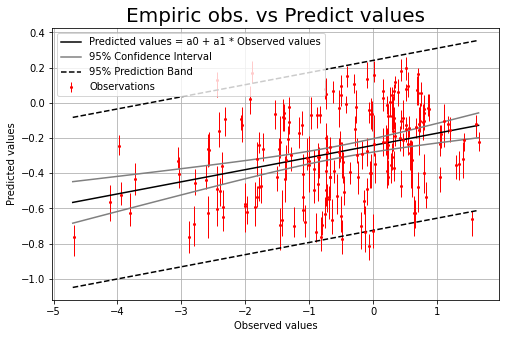

In [22]:
# Building linear a graph and calculation uncertainties

# retrieve parameter values
a0 = popt[0]
a1 = popt[1]

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
index_a0 = str(a0).find('+/-')
index_a1 = str(a1).find('+/-')
am_a0 = str(a0)[0:index_a0]
ci_a0 = str(a0)[index_a0+3:]
am_a1 = str(a1)[0:index_a1]
ci_a1 = str(a1)[index_a1+3:]

print('Uncertainty')
print(f'a0: {am_a0}+/-{round(float(ci_a0)*(n_all_y/n_stat_y)**0.5, 3)}')
print(f'a1: {am_a1}+/-{round(float(ci_a1)*(n_all_y/n_stat_y)**0.5, 3)}')

# plot data
plt.figure(figsize =(8, 5))
plt.errorbar(stat_y[predictor]['mean'], stat_y[0]['50%'], yerr=[list(l_sd_y_pred), list(t_sd_y_pred)], c = 'red', fmt='o', lw=1, ms=2, label='Observations')
plt.yscale('linear')

# calculate regression confidence interval
px = np.linspace(-4.7, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std * (n_all_y**0.5)/(n_stat_y**0.5), c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std * (n_all_y**0.5)/(n_stat_y**0.5), c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# Uncertainty parameters and confidence intervals

In [23]:
# Intermedia ratio for calculation CI
CIR = 2/((n_test + n_train)/n_test)**0.5

In [24]:
# Statistic for SHAP-values

number_iteration = len(aggr_Shap_values.groupby(['Feature']))
shap_list = aggr_Shap_values.groupby(['Feature'])


for i in range(number_iteration):
    itr_mean = round(np.mean(list(shap_list)[i][1].iloc[0:, 1]), 3)
    itr_Q50 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.50), 3)
    itr_Q16 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.16), 3)
    itr_Q84 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.84), 3)
    itr_l = (itr_Q50 - itr_Q16)*CIR
    l_CI = itr_Q50 - itr_l
    itr_t = (itr_Q84 - itr_Q50)*CIR
    t_CI = itr_Q50 + itr_t    
    print(f"SHAP-values for: {list(shap_list)[i][0]}: mean - {itr_mean}, median - {itr_Q50}, CI - [{round(l_CI, 3)}-{round(t_CI, 3)}]\n")        

SHAP-values for: r2020B04: mean - 0.105, median - 0.105, CI - [0.088-0.122]

SHAP-values for: r2020B08: mean - 0.089, median - 0.088, CI - [0.075-0.101]

SHAP-values for: r2020B09: mean - 0.058, median - 0.059, CI - [0.048-0.069]

SHAP-values for: r2020B10: mean - 0.09, median - 0.091, CI - [0.074-0.106]

SHAP-values for: r2020B11: mean - 0.053, median - 0.051, CI - [0.041-0.064]



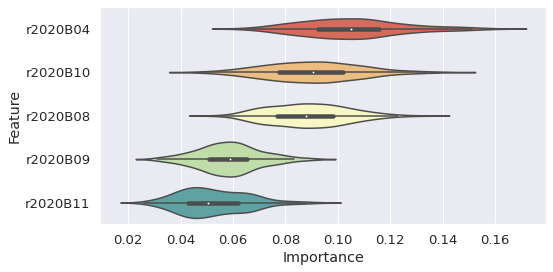

In [26]:
sns.set(font_scale=1.2)
sns.violinplot(x="Importance", y="Feature", data=aggr_Shap_values, inner="box", palette="Spectral", order=['r2020B04', 'r2020B10', 'r2020B08', 'r2020B09', 'r2020B11'])
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

In [27]:
# Aggregate stat
# optimal number of iterations
aggr_optimal_n_mean = np.mean(aggr_optimal_n)
aggr_optimal_n_Q025 = np.quantile(aggr_optimal_n, 0.025)
aggr_optimal_n_Q16 = np.quantile(aggr_optimal_n, 0.16)
aggr_optimal_n_Q50 = np.quantile(aggr_optimal_n, 0.50)
aggr_optimal_n_Q84 = np.quantile(aggr_optimal_n, 0.84)
aggr_optimal_n_Q975 = np.quantile(aggr_optimal_n, 0.975)

# bias
aggr_bias_mean = np.mean(aggr_bias)
aggr_bias_Q025 = np.quantile(aggr_bias, 0.025)
aggr_bias_Q16 = np.quantile(aggr_bias, 0.16)
aggr_bias_Q50 = np.quantile(aggr_bias, 0.50)
aggr_bias_Q84 = np.quantile(aggr_bias, 0.84)
aggr_bias_Q975 = np.quantile(aggr_bias, 0.975)

aggr_rel_bias_mean = np.mean(aggr_rel_bias)
aggr_rel_bias_Q025 = np.quantile(aggr_rel_bias, 0.025)
aggr_rel_bias_Q16 = np.quantile(aggr_rel_bias, 0.16)
aggr_rel_bias_Q50 = np.quantile(aggr_rel_bias, 0.50)
aggr_rel_bias_Q84 = np.quantile(aggr_rel_bias, 0.84)
aggr_rel_bias_Q975 = np.quantile(aggr_rel_bias, 0.975)

# RMSE
aggr_rmse_mean = np.mean(aggr_rmse)
aggr_rmse_Q025 = np.quantile(aggr_rmse, 0.025)
aggr_rmse_Q16 = np.quantile(aggr_rmse, 0.16)
aggr_rmse_Q50 = np.quantile(aggr_rmse, 0.50)
aggr_rmse_Q84 = np.quantile(aggr_rmse, 0.84)
aggr_rmse_Q975 = np.quantile(aggr_rmse, 0.975)

aggr_rel_rmse_mean = np.mean(aggr_rel_rmse)
aggr_rel_rmse_Q025 = np.quantile(aggr_rel_rmse, 0.025)
aggr_rel_rmse_Q16 = np.quantile(aggr_rel_rmse, 0.16)
aggr_rel_rmse_Q50 = np.quantile(aggr_rel_rmse, 0.50)
aggr_rel_rmse_Q84 = np.quantile(aggr_rel_rmse, 0.84)
aggr_rel_rmse_Q975 = np.quantile(aggr_rel_rmse, 0.975)

# MSE
aggr_mse_mean = np.mean(aggr_mse)
aggr_mse_Q025 = np.quantile(aggr_mse, 0.025)
aggr_mse_Q16 = np.quantile(aggr_mse, 0.16)
aggr_mse_Q50 = np.quantile(aggr_mse, 0.50)
aggr_mse_Q84 = np.quantile(aggr_mse, 0.84)
aggr_mse_Q975 = np.quantile(aggr_mse, 0.975)

# R-square
aggr_R_square_mean = np.mean(aggr_R_square)
aggr_R_square_Q025 = np.quantile(aggr_R_square, 0.025)
aggr_R_square_Q16 = np.quantile(aggr_R_square, 0.16)
aggr_R_square_Q50 = np.quantile(aggr_R_square, 0.50)
aggr_R_square_Q84 = np.quantile(aggr_R_square, 0.84)
aggr_R_square_Q975 = np.quantile(aggr_R_square, 0.975)

# exp_bias
exp_aggr_bias_mean = np.mean(exp_aggr_bias)
exp_aggr_bias_Q025 = np.quantile(exp_aggr_bias, 0.025)
exp_aggr_bias_Q16 = np.quantile(exp_aggr_bias, 0.16)
exp_aggr_bias_Q50 = np.quantile(exp_aggr_bias, 0.50)
exp_aggr_bias_Q84 = np.quantile(exp_aggr_bias, 0.84)
exp_aggr_bias_Q975 = np.quantile(exp_aggr_bias, 0.975)

exp_aggr_rel_bias_mean = np.mean(exp_aggr_rel_bias)
exp_aggr_rel_bias_Q025 = np.quantile(exp_aggr_rel_bias, 0.025)
exp_aggr_rel_bias_Q16 = np.quantile(exp_aggr_rel_bias, 0.16)
exp_aggr_rel_bias_Q50 = np.quantile(exp_aggr_rel_bias, 0.50)
exp_aggr_rel_bias_Q84 = np.quantile(exp_aggr_rel_bias, 0.84)
exp_aggr_rel_bias_Q975 = np.quantile(exp_aggr_rel_bias, 0.975)

# exp_RMSE
exp_aggr_rmse_mean = np.mean(exp_aggr_rmse)
exp_aggr_rmse_Q025 = np.quantile(exp_aggr_rmse, 0.025)
exp_aggr_rmse_Q16 = np.quantile(exp_aggr_rmse, 0.16)
exp_aggr_rmse_Q50 = np.quantile(exp_aggr_rmse, 0.50)
exp_aggr_rmse_Q84 = np.quantile(exp_aggr_rmse, 0.84)
exp_aggr_rmse_Q975 = np.quantile(exp_aggr_rmse, 0.975)

exp_aggr_rel_rmse_mean = np.mean(exp_aggr_rel_rmse)
exp_aggr_rel_rmse_Q025 = np.quantile(exp_aggr_rel_rmse, 0.025)
exp_aggr_rel_rmse_Q16 = np.quantile(exp_aggr_rel_rmse, 0.16)
exp_aggr_rel_rmse_Q50 = np.quantile(exp_aggr_rel_rmse, 0.50)
exp_aggr_rel_rmse_Q84 = np.quantile(exp_aggr_rel_rmse, 0.84)
exp_aggr_rel_rmse_Q975 = np.quantile(exp_aggr_rel_rmse, 0.975)

# exp_MSE
exp_aggr_mse_mean = np.mean(exp_aggr_mse)
exp_aggr_mse_Q025 = np.quantile(exp_aggr_mse, 0.025)
exp_aggr_mse_Q16 = np.quantile(exp_aggr_mse, 0.16)
exp_aggr_mse_Q50 = np.quantile(exp_aggr_mse, 0.50)
exp_aggr_mse_Q84 = np.quantile(exp_aggr_mse, 0.84)
exp_aggr_mse_Q975 = np.quantile(exp_aggr_mse, 0.975)

# exp_R-square
exp_aggr_R_square_mean = np.mean(exp_aggr_R_square)
exp_aggr_R_square_Q025 = np.quantile(exp_aggr_R_square, 0.025)
exp_aggr_R_square_Q16 = np.quantile(exp_aggr_R_square, 0.16)
exp_aggr_R_square_Q50 = np.quantile(exp_aggr_R_square, 0.50)
exp_aggr_R_square_Q84 = np.quantile(exp_aggr_R_square, 0.84)
exp_aggr_R_square_Q975 = np.quantile(exp_aggr_R_square, 0.975)

In [28]:
# Output calculated stat
print("Logarithmically transformed predictive values:")
print(f"Aggregate optimal number of iterations statistic: \n mean: {round(aggr_optimal_n_mean, 3)}, median: {round(aggr_optimal_n_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_optimal_n_Q025, 3)}-{round(aggr_optimal_n_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_optimal_n_Q50-((aggr_optimal_n_Q50-aggr_optimal_n_Q16)*CIR), 3)}-{round(aggr_optimal_n_Q50+((aggr_optimal_n_Q84-aggr_optimal_n_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias statistic: \n mean: {round(aggr_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_bias_Q025, 3)}-{round(aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_bias_Q50-((aggr_bias_Q50-aggr_bias_Q16)*CIR), 3)}-{round(aggr_bias_Q50+((aggr_bias_Q84-aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(aggr_rmse_mean, 3)}, median: {round(aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rmse_Q025, 3)}-{round(aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rmse_Q50-((aggr_rmse_Q50-aggr_rmse_Q16)*CIR), 3)}-{round(aggr_rmse_Q50+((aggr_rmse_Q84-aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(aggr_mse_mean, 3)}, median: {round(aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_mse_Q025, 3)}-{round(aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_mse_Q50-((aggr_mse_Q50-aggr_mse_Q16)*CIR), 3)}-{round(aggr_mse_Q50+((aggr_mse_Q84-aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(aggr_R_square_mean, 3)}, median: {round(aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_R_square_Q025, 3)}-{round(aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_R_square_Q50-((aggr_R_square_Q50-aggr_R_square_Q16)*CIR), 3)}-{round(aggr_R_square_Q50+((aggr_R_square_Q84-aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(aggr_rel_bias_mean, 3)}, median: {round(aggr_rel_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_bias_Q025, 3)}-{round(aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_bias_Q50-((aggr_rel_bias_Q50-aggr_rel_bias_Q16)*CIR), 3)}-{round(aggr_rel_bias_Q50+((aggr_rel_bias_Q84-aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(aggr_rel_rmse_mean, 3)}, median: {round(aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_rmse_Q025, 3)}-{round(aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_rmse_Q50-((aggr_rel_rmse_Q50-aggr_rel_rmse_Q16)*CIR), 3)}-{round(aggr_rel_rmse_Q50+((aggr_rel_rmse_Q84-aggr_rel_rmse_Q50)*CIR), 3)} \n***")

print("\nTransformed predictive values into the primary state:")
print(f"Aggregate bias statistic: \n mean: {round(exp_aggr_bias_mean, 3)}, median: {round(exp_aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_bias_Q025, 3)}-{round(exp_aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_bias_Q50-((exp_aggr_bias_Q50-exp_aggr_bias_Q16)*CIR), 3)}-{round(exp_aggr_bias_Q50+((exp_aggr_bias_Q84-exp_aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(exp_aggr_rmse_mean, 3)}, median: {round(exp_aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rmse_Q025, 3)}-{round(exp_aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rmse_Q50-((exp_aggr_rmse_Q50-exp_aggr_rmse_Q16)*CIR), 3)}-{round(exp_aggr_rmse_Q50+((exp_aggr_rmse_Q84-exp_aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(exp_aggr_mse_mean, 3)}, median: {round(exp_aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_mse_Q025, 3)}-{round(exp_aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_mse_Q50-((exp_aggr_mse_Q50-exp_aggr_mse_Q16)*CIR), 3)}-{round(exp_aggr_mse_Q50+((exp_aggr_mse_Q84-exp_aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(exp_aggr_R_square_mean, 3)}, median: {round(exp_aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_R_square_Q025, 3)}-{round(exp_aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_R_square_Q50-((exp_aggr_R_square_Q50-exp_aggr_R_square_Q16)*CIR), 3)}-{round(exp_aggr_R_square_Q50+((exp_aggr_R_square_Q84-exp_aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(exp_aggr_rel_bias_mean, 3)}, median: {round(exp_aggr_rel_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rel_bias_Q025, 3)}-{round(exp_aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rel_bias_Q50-((exp_aggr_rel_bias_Q50-exp_aggr_rel_bias_Q16)*CIR), 3)}-{round(exp_aggr_rel_bias_Q50+((exp_aggr_rel_bias_Q84-exp_aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(exp_aggr_rel_rmse_mean, 3)}, median: {round(exp_aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rel_rmse_Q025, 3)}-{round(exp_aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rel_rmse_Q50-((exp_aggr_rel_rmse_Q50-exp_aggr_rel_rmse_Q16)*CIR), 3)}-{round(exp_aggr_rel_rmse_Q50+((exp_aggr_rel_rmse_Q84-exp_aggr_rel_rmse_Q50)*CIR), 3)} \n***")

Logarithmically transformed predictive values:
Aggregate optimal number of iterations statistic: 
 mean: 109.15, median: 111.0,
 pred. interval (P(0.025)-P(0.975)): 83.975-111.0, 
 conf. interval (p-value=0.95): 110.101-111.0 
***
Aggregate bias statistic: 
 mean: 0.313, median: 0.313,
 pred. interval (P(0.025)-P(0.975)): -0.015-0.695, 
 conf. interval (p-value=0.95): 0.117-0.49 
***
Aggregate RMSE statistic: 
 mean: 1.217, median: 1.201, pred. interval (P(0.025)-P(0.975)): 0.959-1.514, 
 conf. interval (p-value=0.95): 1.084-1.354 
***
Aggregate MSE statistic: 
 mean: 1.506, median: 1.444, pred. interval (P(0.025)-P(0.975)): 0.92-2.291, 
 conf. interval (p-value=0.95): 1.176-1.837 
***
Aggregate R^2 statistic: 
 mean: 0.012, median: 0.028, pred. interval (P(0.025)-P(0.975)): -0.205-0.146, 
 conf. interval (p-value=0.95): -0.062-0.088 
***
Aggregate bias(%) statistic: 
 mean: -46.609, median: -51.999, pred. interval (P(0.025)-P(0.975)): -76.421-4.559, 
 conf. interval (p-value=0.95): -6

# Analysis of residuals distributions dependents on empirical values of predicted parameter

Text(0.5, 1.0, 'In typical state')

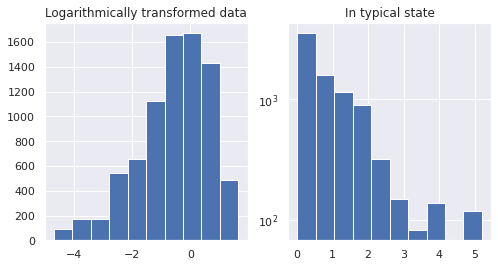

In [29]:
# Preprocessing
results_y['T_exp_empiric'] = np.exp(results_y[predictor])
results_y['T_exp_pred'] = np.exp(results_y[0])

results_y['ln_residuals'] = results_y[predictor] - results_y[0]
results_y['T_exp_residuals'] = results_y['T_exp_empiric'] - results_y['T_exp_pred']
results_y['ln_residuals_%'] =  results_y['ln_residuals'] / results_y[predictor] * 100
results_y['T_exp_residuals_%'] = results_y['T_exp_residuals'] / results_y['T_exp_empiric'] * 100

# plt.hist(results_y[predictor])
# plt.hist(results_y[predictor])
fig, axs = plt.subplots(1, 2)
axs[0].hist(results_y[predictor])
axs[0].set_title('Logarithmically transformed data')
axs[1].hist(results_y['T_exp_empiric'], log=True)
axs[1].set_title('In typical state')
# plt.show() 

In [30]:
# INPORTANT  - added your intervals
ln_intervals = pd.cut(results_y[predictor], [-4, -3, -2, -1, 0, 1, 2])
T_exp_intervals = pd.cut(results_y['T_exp_empiric'], [0, 0.2, 0.5, 1, 2, 5])

ln_grouped = results_y.groupby(ln_intervals)
T_exp_grouped = results_y.groupby(T_exp_intervals) 

max_obs_in_group = len(results_y)    
    
pre_ln = pd.DataFrame()
pre_T_exp = pd.DataFrame()
pre_rel_ln = pd.DataFrame()
pre_rel_T_exp = pd.DataFrame()

pre_ln = pre_ln.assign(row_number=range(max_obs_in_group))
pre_T_exp = pre_T_exp.assign(row_number=range(max_obs_in_group))
pre_rel_ln = pre_rel_ln.assign(row_number=range(max_obs_in_group))
pre_rel_T_exp = pre_rel_T_exp.assign(row_number=range(max_obs_in_group))

for i in range(len(list(ln_grouped))):
    pre_ln[list(ln_grouped)[i][0]] = pd.Series(list(ln_grouped)[i][1]['ln_residuals'])
    pre_rel_ln[list(ln_grouped)[i][0]] = pd.Series(list(ln_grouped)[i][1]['ln_residuals_%'])

for i in range(len(list(T_exp_grouped))):
    pre_T_exp[list(T_exp_grouped)[i][0]] = pd.Series(list(T_exp_grouped)[i][1]['T_exp_residuals'])
    pre_rel_T_exp[list(T_exp_grouped)[i][0]] = pd.Series(list(T_exp_grouped)[i][1]['T_exp_residuals_%'])

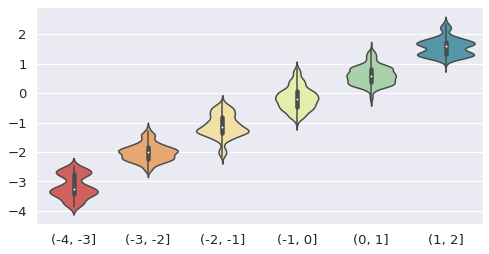

In [31]:
# Plots of residuals versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_ln[list(pre_ln.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

In [ ]:
# Plots of relative residuals (in %) versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_rel_ln[(pre_rel_ln.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

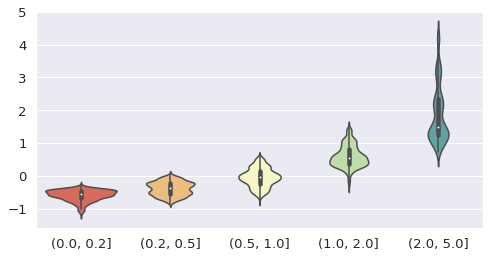

In [32]:
# Plots of residuals versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_T_exp[list(pre_T_exp.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

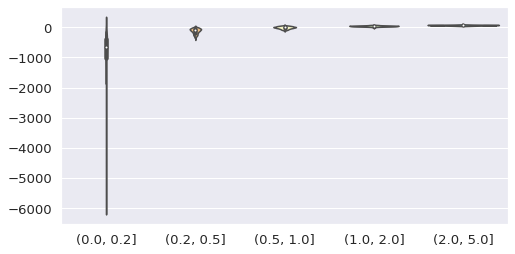

In [33]:
# Plots of relative residuals (in %) versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_rel_T_exp[(pre_rel_T_exp.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

# ***Creating final XGBoost model using all obs. for its training***

In [34]:
# Generate test and training samples
f_X_train = X
f_y_train = y

In [35]:
# Implementation of the scikit-learn API for XGBoost regression
f_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])

In [36]:
# Fitting the model 
f_xgb_model.fit(f_X_train, f_y_train, early_stopping_rounds=20, eval_set=[(f_X_train, f_y_train)])
# learning dynamics
f_y_pred = f_xgb_model.predict(f_X_train, ntree_limit=f_xgb_model.best_ntree_limit)

[0]	validation_0-rmse:1.62950
[1]	validation_0-rmse:1.62057
[2]	validation_0-rmse:1.61049
[3]	validation_0-rmse:1.60163
[4]	validation_0-rmse:1.59283
[5]	validation_0-rmse:1.58344
[6]	validation_0-rmse:1.57449
[7]	validation_0-rmse:1.56748


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.56043
[9]	validation_0-rmse:1.55131
[10]	validation_0-rmse:1.54315
[11]	validation_0-rmse:1.53505
[12]	validation_0-rmse:1.52712
[13]	validation_0-rmse:1.51868
[14]	validation_0-rmse:1.51069
[15]	validation_0-rmse:1.50267
[16]	validation_0-rmse:1.49616
[17]	validation_0-rmse:1.48892
[18]	validation_0-rmse:1.48053
[19]	validation_0-rmse:1.47427
[20]	validation_0-rmse:1.46942
[21]	validation_0-rmse:1.46376
[22]	validation_0-rmse:1.45752
[23]	validation_0-rmse:1.45038
[24]	validation_0-rmse:1.44426
[25]	validation_0-rmse:1.43608
[26]	validation_0-rmse:1.42988
[27]	validation_0-rmse:1.42276
[28]	validation_0-rmse:1.41589
[29]	validation_0-rmse:1.41225
[30]	validation_0-rmse:1.40758
[31]	validation_0-rmse:1.40143
[32]	validation_0-rmse:1.39429
[33]	validation_0-rmse:1.38920
[34]	validation_0-rmse:1.38386
[35]	validation_0-rmse:1.37755
[36]	validation_0-rmse:1.37201
[37]	validation_0-rmse:1.36740
[38]	validation_0-rmse:1.36267
[39]	validation_0-rmse:1.35827
[40]	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [37]:
# Iteration with the best result
f_optimal_n = f_xgb_model.best_ntree_limit-1
print("The best iteration: " + str(f_optimal_n))    

The best iteration: 111


In [38]:
# Preparing data for building a learning graph
f_results = f_xgb_model.evals_result()

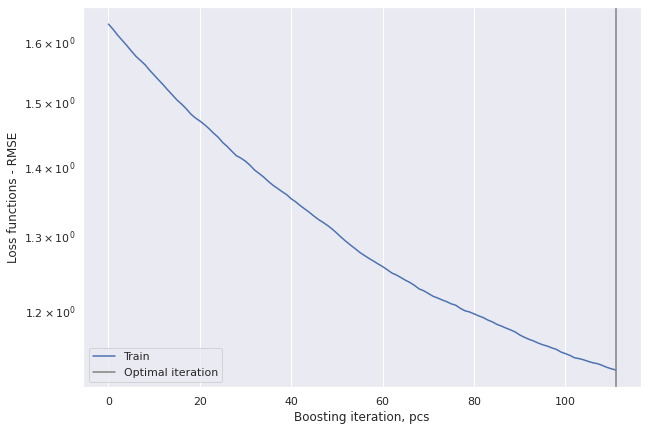

In [39]:
# Learning curves for the XGBoost model 
plt.figure(figsize=(10,7))
plt.yscale("log")
plt.plot(f_results['validation_0']['rmse'], label='Train')
plt.axvline(f_optimal_n, color="gray", label="Optimal iteration")
plt.xlabel("Boosting iteration, pcs")
plt.ylabel("Loss functions - RMSE")
plt.legend()

# Estimation of a final XGBoost model

In [40]:
# Convert data to 'array' type
f_conv_y_pred = pd.DataFrame(f_y_pred) # Double transformation
f_y_pred2 = f_conv_y_pred.values
f_y_train2 = f_y_train.values

# Intermediate results
f_n_sample = len(f_y_pred2)
f_main_sample = f_y_train.sum() / f_n_sample

# Calculation of bias
f_diff = f_y_pred2 - f_y_train2
f_bias = f_diff.sum()/f_n_sample
print('Bias: %.1f' % (f_bias))
print("Relative bias(%):", " %.2f" % (f_bias/f_main_sample*100))

# Calculation of RMSE
f_rmse = np.sqrt(mean_squared_error(f_y_train, f_y_pred))
print("RMSE: %.1f" % (f_rmse))
print("Relative RMSE(%):", " %.3f" % (f_rmse/f_main_sample*100))

# Calculation of MSE
f_mse = mean_squared_error(f_y_train, f_y_pred)
print("MSE: %.1f" % (f_mse))

# Calculation of Square R
f_R_square = r2_score(f_y_train, f_y_pred)
print("R square: %.1f%%" % (f_R_square * 100.0))

Bias: 0.3
Relative bias(%):  -47.75
RMSE: 1.1
Relative RMSE(%):  -198.911
MSE: 1.3
R square: 18.1%


In [41]:
# Convert input data
f_x_train_conv = np.array(f_y_train)
f_x_train_convert = np.array([None]*f_n_sample)
for i in range(f_n_sample):
    f_x_train_convert[i] = float(f_x_train_conv[i])

x_plot = f_x_train_convert
y_plot = f_y_pred
n = len(y_plot)

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

R^2: 0.379
Uncertainty
a0: -0.217+/-0.018
a1: 0.140+/-0.013


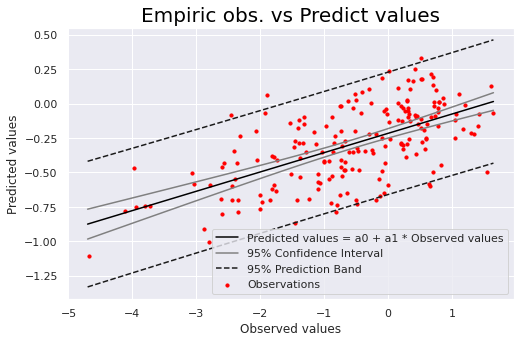

In [42]:
# Building linear a graph and calculation uncertainties

# retrieve parameter values
a0 = popt[0]
a1 = popt[1]

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a0: ' + str(a0))
print('a1: ' + str(a1))

# plot data
plt.figure(figsize =(8, 5))
plt.scatter(x_plot, y_plot, s = 10, c = 'red', label='Observations', marker = 'o')
plt.yscale('linear')

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

# calculate regression confidence interval
px = np.linspace(-4.7, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std, c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# ***Analisys output final model***

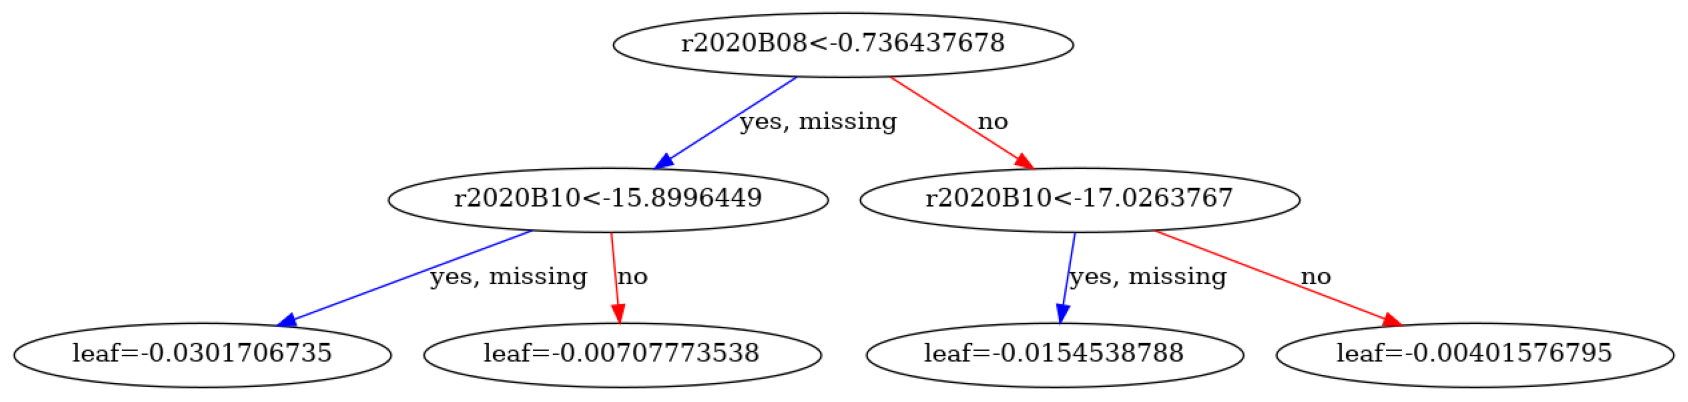

In [44]:
# Visualize the Decision tree (individual obs.)
xgb.plot_tree(f_xgb_model, num_trees=3) # "num_trees" is number of obs.
plt.rcParams['figure.figsize'] = [30, 45]
plt.show()

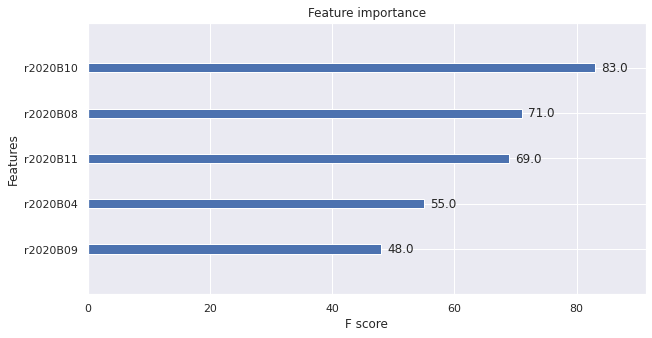

In [46]:
# Importance is calculated as: ”weight” is the number of times a feature appears in a trees
xgb.plot_importance(f_xgb_model, importance_type='weight')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

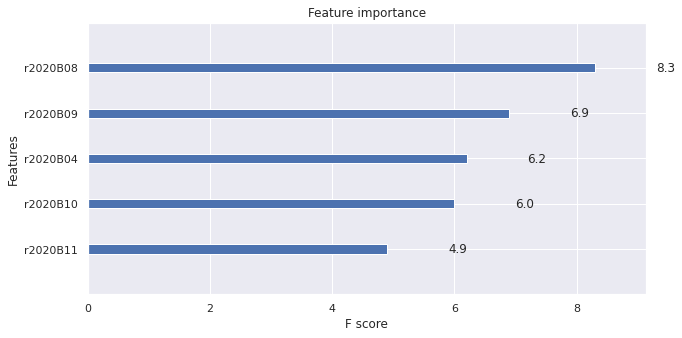

In [47]:
# Importance is calculated as: ”gain” is the average gain of splits which use the feature
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="gain")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key], 1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='gain', show_values=True)

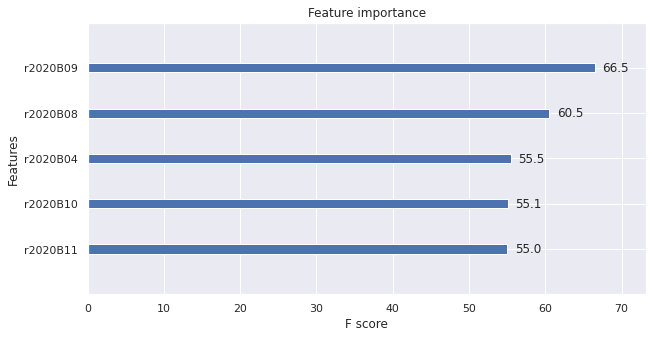

In [48]:
# Importance is calculated as: "cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="cover")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key],1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='cover', show_values=True)

# Est. of SHAP values for final models

In [49]:
# Сreate an уxplainer object
explainer = shap.TreeExplainer(f_xgb_model)
shap_values = explainer.shap_values(f_X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


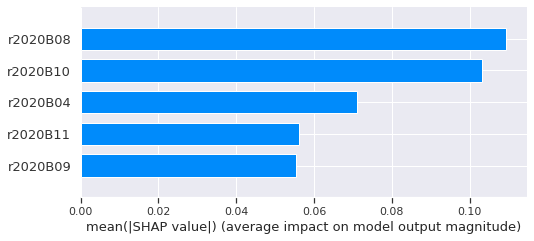

In [50]:
# Mean absolute value of the SHAP values for each feature 
shap.summary_plot(shap_values, f_X_train, plot_type="bar")

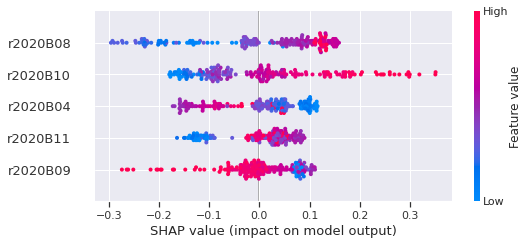

In [51]:
# Graph that summarises the effects of all the features
shap.summary_plot(shap_values, f_X_train)

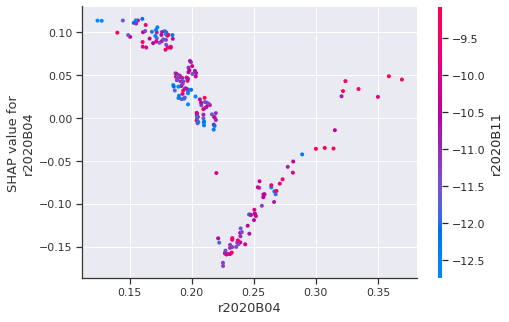

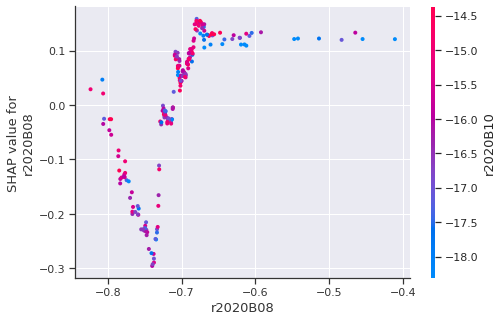

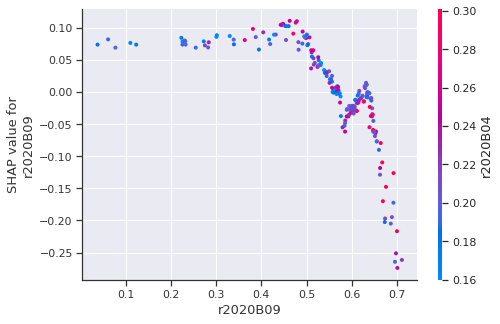

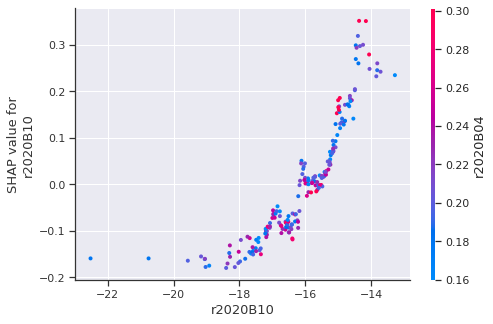

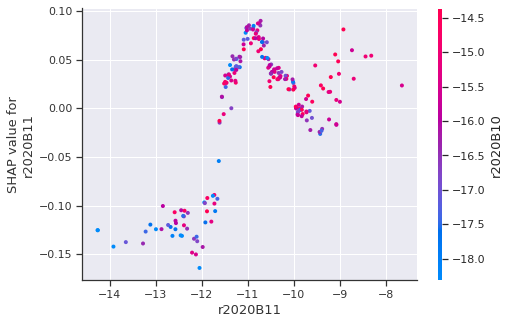

In [52]:
# Create a dependence scatter plot to show the effect of a single feature across the whole dataset
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, f_X_train, color=shap_values)

# *Save XGBoost model*

In [53]:
# Save to JSON
f_xgb_model.save_model("../05_output_data/XGBoost_models/09_LN_Tag_Cs_SENTINEL_2020_XGB_model.json")
# Save to text format
f_xgb_model.save_model("../05_output_data/XGBoost_models/09_LN_Tag_Cs_SENTINEL_2020_XGB_model.txt")